In [2]:
import numpy as np
import csv
import re
from ahrs.ahrs.filters import Mahony

%matplotlib notebook
%matplotlib notebook

import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.animation import FuncAnimation
from pyquaternion import Quaternion
from scipy.signal import resample


## Ground Truth Robot ARM UR10e

In [75]:
#Data gathering Robot ARM (Ground Truth)
f_GT_name = '/home/kuli/Desktop/WeAreVR/Measurements/robot_position_11.csv'
with open(f_GT_name, 'r') as file:
    data = file.read()
pattern = r"(-?\d+\.\d+)"
data = re.findall(pattern, data)
GT = np.reshape(data, (-1, 8)).astype(float)
time_columns = [0]
translate_columns = [1,2,3]
quaternion_columns = [4,5,6,7]
time_GT = GT[:, time_columns]
translate_GT = GT[:, translate_columns]
quaternion_GT_pre = GT[:, quaternion_columns]
total_time = float(time_GT[-1]) - float(time_GT[0])
robot_avg_freq = int(np.shape(GT)[0]) / total_time 

print(np.shape(GT))
print(robot_avg_freq)
print("Time:")
print(time_GT)
print("Transtale:")
print(translate_GT)
print("Quaternion:")
print(quaternion_GT_pre)
for q in quaternion_GT_pre:
    print(q)

(12974, 8)
500.44015488705026
Time:
[[1.68786914e+09]
 [1.68786914e+09]
 [1.68786914e+09]
 ...
 [1.68786916e+09]
 [1.68786916e+09]
 [1.68786916e+09]]
Transtale:
[[-0.175  0.866  0.199]
 [-0.175  0.866  0.199]
 [-0.175  0.866  0.199]
 ...
 [-0.175  0.866  0.199]
 [-0.175  0.866  0.199]
 [-0.175  0.866  0.199]]
Quaternion:
[[-0.    -0.    -0.001  1.   ]
 [-0.    -0.    -0.001  1.   ]
 [-0.    -0.    -0.001  1.   ]
 ...
 [ 0.    -0.    -0.001  1.   ]
 [ 0.    -0.    -0.001  1.   ]
 [ 0.    -0.    -0.001  1.   ]]
[-0.    -0.    -0.001  1.   ]
[-0.    -0.    -0.001  1.   ]
[-0.    -0.    -0.001  1.   ]
[-0.    -0.    -0.001  1.   ]
[-0.    -0.    -0.001  1.   ]
[-0.    -0.    -0.001  1.   ]
[-0.    -0.    -0.001  1.   ]
[-0.    -0.    -0.001  1.   ]
[-0.    -0.    -0.001  1.   ]
[-0.    -0.    -0.001  1.   ]
[-0.    -0.    -0.001  1.   ]
[-0.    -0.    -0.001  1.   ]
[-0.    -0.    -0.001  1.   ]
[-0.    -0.    -0.001  1.   ]
[-0.    -0.    -0.001  1.   ]
[-0.    -0.    -0.001  1.   ]
[-0. 

[ 0.    -0.    -0.001  1.   ]
[ 0.    -0.    -0.001  1.   ]
[ 0.    -0.    -0.001  1.   ]
[ 0.    -0.    -0.001  1.   ]
[ 0.    -0.    -0.001  1.   ]
[ 0.    -0.    -0.001  1.   ]
[ 0.    -0.    -0.001  1.   ]
[ 0.    -0.    -0.001  1.   ]
[ 0.    -0.    -0.001  1.   ]
[ 0.    -0.    -0.001  1.   ]
[ 0.    -0.    -0.001  1.   ]
[ 0.    -0.    -0.001  1.   ]
[ 0.    -0.    -0.001  1.   ]
[ 0.    -0.    -0.001  1.   ]
[ 0.    -0.    -0.001  1.   ]
[ 0.    -0.    -0.001  1.   ]
[ 0.    -0.    -0.001  1.   ]
[ 0.    -0.    -0.001  1.   ]
[ 0.    -0.    -0.001  1.   ]
[ 0.    -0.    -0.001  1.   ]
[ 0.    -0.    -0.001  1.   ]
[ 0.    -0.    -0.001  1.   ]
[ 0.    -0.    -0.001  1.   ]
[ 0.    -0.    -0.001  1.   ]
[ 0.    -0.    -0.001  1.   ]
[ 0.    -0.    -0.001  1.   ]
[ 0.    -0.    -0.001  1.   ]
[ 0.    -0.    -0.001  1.   ]
[ 0.    -0.    -0.001  1.   ]
[ 0.    -0.    -0.001  1.   ]
[ 0.    -0.    -0.001  1.   ]
[ 0.    -0.    -0.001  1.   ]
[ 0.    -0.    -0.001  1.   ]
[ 0.    -0

[-0.001  0.     0.975 -0.221]
[-0.001  0.     0.975 -0.221]
[-0.001  0.     0.975 -0.221]
[-0.001  0.     0.975 -0.221]
[-0.001  0.     0.975 -0.221]
[-0.001  0.     0.975 -0.221]
[-0.001  0.     0.975 -0.221]
[-0.001  0.     0.982 -0.189]
[-0.001  0.     0.982 -0.189]
[-0.001  0.     0.982 -0.189]
[-0.001  0.     0.982 -0.189]
[-0.001  0.     0.982 -0.189]
[-0.001  0.     0.982 -0.189]
[-0.001  0.     0.982 -0.189]
[-0.001  0.     0.982 -0.189]
[-0.001  0.     0.982 -0.189]
[-0.001  0.     0.982 -0.189]
[-0.001  0.     0.982 -0.189]
[-0.001  0.     0.982 -0.189]
[-0.001  0.     0.982 -0.189]
[-0.001  0.     0.982 -0.189]
[-0.001  0.     0.982 -0.189]
[-0.001  0.     0.982 -0.189]
[-0.001  0.     0.982 -0.189]
[-0.001  0.     0.982 -0.189]
[-0.001  0.     0.982 -0.189]
[-0.001  0.     0.982 -0.189]
[-0.001  0.     0.982 -0.189]
[-0.001  0.     0.982 -0.189]
[-0.001  0.     0.982 -0.189]
[-0.001  0.     0.982 -0.189]
[-0.001  0.     0.982 -0.189]
[-0.001  0.     0.982 -0.189]
[-0.001  0

[-0.    -0.003 -0.116  0.993]
[-0.    -0.003 -0.116  0.993]
[-0.    -0.003 -0.116  0.993]
[-0.    -0.003 -0.116  0.993]
[-0.    -0.003 -0.116  0.993]
[-0.    -0.003 -0.116  0.993]
[-0.    -0.003 -0.116  0.993]
[-0.    -0.003 -0.116  0.993]
[-0.    -0.003 -0.116  0.993]
[-0.    -0.003 -0.116  0.993]
[-0.    -0.003 -0.116  0.993]
[-0.    -0.003 -0.116  0.993]
[-0.    -0.003 -0.116  0.993]
[-0.    -0.003 -0.116  0.993]
[-0.    -0.003 -0.116  0.993]
[-0.    -0.003 -0.116  0.993]
[-0.    -0.003 -0.116  0.993]
[-0.    -0.003 -0.116  0.993]
[-0.    -0.003 -0.116  0.993]
[-0.    -0.003 -0.116  0.993]
[-0.    -0.003 -0.116  0.993]
[-0.    -0.003 -0.116  0.993]
[-0.    -0.003 -0.116  0.993]
[-0.    -0.003 -0.116  0.993]
[-0.    -0.003 -0.116  0.993]
[-0.    -0.003 -0.148  0.989]
[-0.    -0.003 -0.148  0.989]
[-0.    -0.003 -0.148  0.989]
[-0.    -0.003 -0.148  0.989]
[-0.    -0.003 -0.148  0.989]
[-0.    -0.003 -0.148  0.989]
[-0.    -0.003 -0.148  0.989]
[-0.    -0.003 -0.148  0.989]
[-0.    -0

[-0.004 -0.     0.976  0.216]
[-0.004 -0.     0.976  0.216]
[-0.004 -0.     0.976  0.216]
[-0.004 -0.     0.976  0.216]
[-0.004 -0.     0.976  0.216]
[-0.004 -0.     0.976  0.216]
[-0.004 -0.     0.976  0.216]
[-0.004 -0.     0.969  0.247]
[-0.004 -0.     0.969  0.247]
[-0.004 -0.     0.969  0.247]
[-0.004 -0.     0.969  0.247]
[-0.004 -0.     0.969  0.247]
[-0.004 -0.     0.969  0.247]
[-0.004 -0.     0.969  0.247]
[-0.004 -0.     0.969  0.247]
[-0.004 -0.     0.969  0.247]
[-0.004 -0.     0.969  0.247]
[-0.004 -0.     0.969  0.247]
[-0.004 -0.     0.969  0.247]
[-0.004 -0.     0.969  0.247]
[-0.004 -0.     0.969  0.247]
[-0.004 -0.     0.969  0.247]
[-0.004 -0.     0.969  0.247]
[-0.004 -0.     0.969  0.247]
[-0.004 -0.     0.969  0.247]
[-0.004 -0.     0.969  0.247]
[-0.004 -0.     0.969  0.247]
[-0.004 -0.     0.969  0.247]
[-0.004 -0.     0.969  0.247]
[-0.004 -0.     0.969  0.247]
[-0.004 -0.     0.969  0.247]
[-0.004 -0.     0.969  0.247]
[-0.004 -0.     0.969  0.247]
[-0.004 -0

[-0.001 -0.005  0.034  0.999]
[-0.001 -0.005  0.034  0.999]
[-0.001 -0.005  0.034  0.999]
[-0.001 -0.005  0.034  0.999]
[-0.001 -0.005  0.034  0.999]
[-0.001 -0.005  0.034  0.999]
[-0.001 -0.005  0.034  0.999]
[-0.001 -0.005  0.034  0.999]
[-0.001 -0.005  0.034  0.999]
[-0.001 -0.005  0.034  0.999]
[-0.001 -0.005  0.034  0.999]
[-0.001 -0.005  0.034  0.999]
[-0.001 -0.005  0.034  0.999]
[-0.001 -0.005  0.034  0.999]
[-0.001 -0.005  0.034  0.999]
[-0.001 -0.005  0.034  0.999]
[-0.001 -0.005  0.034  0.999]
[-0.001 -0.005  0.034  0.999]
[-0.001 -0.005  0.038  0.999]
[-0.001 -0.005  0.038  0.999]
[-0.001 -0.005  0.038  0.999]
[-0.001 -0.005  0.038  0.999]
[-0.001 -0.005  0.038  0.999]
[-0.001 -0.005  0.038  0.999]
[-0.001 -0.005  0.038  0.999]
[-0.001 -0.005  0.038  0.999]
[-0.001 -0.005  0.038  0.999]
[-0.001 -0.005  0.038  0.999]
[-0.001 -0.005  0.038  0.999]
[-0.001 -0.005  0.038  0.999]
[-0.001 -0.005  0.038  0.999]
[-0.001 -0.005  0.038  0.999]
[-0.001 -0.005  0.038  0.999]
[-0.001 -0

[-0.004  0.001  0.999  0.046]
[-0.004  0.001  0.999  0.046]
[-0.004  0.001  0.999  0.046]
[-0.004  0.001  0.999  0.046]
[-0.004  0.001  0.999  0.046]
[-0.004  0.001  0.999  0.046]
[-0.004  0.001  0.999  0.046]
[-0.004  0.001  0.999  0.046]
[-0.004  0.001  0.999  0.046]
[-0.004  0.001  0.999  0.046]
[-0.004  0.001  0.999  0.046]
[-0.004  0.001  0.999  0.046]
[-0.004  0.001  0.999  0.046]
[-0.004  0.001  0.999  0.046]
[-0.004  0.001  0.999  0.046]
[-0.004  0.001  0.999  0.046]
[-0.004  0.001  0.999  0.046]
[-0.004  0.001  0.999  0.046]
[-0.004  0.001  0.999  0.046]
[-0.004  0.001  0.999  0.046]
[-0.004  0.001  0.999  0.046]
[-0.004  0.001  0.999  0.046]
[-0.004  0.001  1.     0.012]
[-0.004  0.001  1.     0.012]
[-0.004  0.001  1.     0.012]
[-0.004  0.001  1.     0.012]
[-0.004  0.001  1.     0.012]
[-0.004  0.001  1.     0.012]
[-0.004  0.001  1.     0.012]
[-0.004  0.001  1.     0.012]
[-0.004  0.001  1.     0.012]
[-0.004  0.001  1.     0.012]
[-0.004  0.001  1.     0.012]
[-0.004  0

[-0.001 -0.003  0.049  0.999]
[-0.001 -0.003  0.049  0.999]
[-0.001 -0.003  0.049  0.999]
[-0.001 -0.003  0.049  0.999]
[-0.001 -0.003  0.049  0.999]
[-0.001 -0.003  0.049  0.999]
[-0.001 -0.003  0.049  0.999]
[-0.001 -0.003  0.049  0.999]
[-0.001 -0.003  0.049  0.999]
[-0.001 -0.003  0.049  0.999]
[-0.001 -0.003  0.049  0.999]
[-0.001 -0.003  0.049  0.999]
[-0.001 -0.003  0.049  0.999]
[-0.001 -0.003  0.049  0.999]
[-0.001 -0.003  0.049  0.999]
[-0.001 -0.003  0.049  0.999]
[-0.001 -0.003  0.049  0.999]
[-0.001 -0.003  0.049  0.999]
[-0.001 -0.003  0.049  0.999]
[-0.001 -0.003  0.049  0.999]
[-0.001 -0.003  0.049  0.999]
[-0.001 -0.003  0.081  0.997]
[-0.001 -0.003  0.081  0.997]
[-0.001 -0.003  0.081  0.997]
[-0.001 -0.003  0.081  0.997]
[-0.001 -0.003  0.081  0.997]
[-0.001 -0.003  0.081  0.997]
[-0.001 -0.003  0.081  0.997]
[-0.001 -0.003  0.081  0.997]
[-0.001 -0.003  0.081  0.997]
[-0.001 -0.003  0.081  0.997]
[-0.001 -0.003  0.081  0.997]
[-0.001 -0.003  0.081  0.997]
[-0.001 -0

[-0.001  0.001  0.967 -0.254]
[-0.001  0.001  0.967 -0.254]
[-0.001  0.001  0.967 -0.254]
[-0.001  0.001  0.967 -0.254]
[-0.001  0.001  0.967 -0.254]
[-0.001  0.001  0.967 -0.254]
[-0.001  0.001  0.967 -0.254]
[-0.001  0.001  0.967 -0.254]
[-0.001  0.001  0.967 -0.254]
[-0.001  0.001  0.967 -0.254]
[-0.001  0.001  0.967 -0.254]
[-0.001  0.001  0.967 -0.254]
[-0.001  0.001  0.958 -0.286]
[-0.001  0.001  0.958 -0.286]
[-0.001  0.001  0.958 -0.286]
[-0.001  0.001  0.958 -0.286]
[-0.001  0.001  0.958 -0.286]
[-0.001  0.001  0.958 -0.286]
[-0.001  0.001  0.958 -0.286]
[-0.001  0.001  0.958 -0.286]
[-0.001  0.001  0.958 -0.286]
[-0.001  0.001  0.958 -0.286]
[-0.001  0.001  0.958 -0.286]
[-0.001  0.001  0.958 -0.286]
[-0.001  0.001  0.958 -0.286]
[-0.001  0.001  0.958 -0.286]
[-0.001  0.001  0.958 -0.286]
[-0.001  0.001  0.958 -0.286]
[-0.001  0.001  0.958 -0.286]
[-0.001  0.001  0.958 -0.286]
[-0.001  0.001  0.958 -0.286]
[-0.001  0.001  0.958 -0.286]
[-0.001  0.001  0.958 -0.286]
[-0.001  0

[ 0.    -0.    -0.011  1.   ]
[ 0.    -0.    -0.011  1.   ]
[ 0.    -0.    -0.011  1.   ]
[ 0.    -0.    -0.011  1.   ]
[ 0.    -0.    -0.011  1.   ]
[ 0.    -0.    -0.011  1.   ]
[ 0.    -0.    -0.011  1.   ]
[ 0.    -0.    -0.011  1.   ]
[ 0.    -0.    -0.011  1.   ]
[ 0.    -0.    -0.011  1.   ]
[ 0.    -0.    -0.011  1.   ]
[ 0.    -0.    -0.011  1.   ]
[ 0.    -0.    -0.011  1.   ]
[ 0.    -0.    -0.011  1.   ]
[ 0.    -0.    -0.011  1.   ]
[ 0.    -0.    -0.011  1.   ]
[ 0.    -0.    -0.011  1.   ]
[ 0.    -0.    -0.011  1.   ]
[ 0.    -0.    -0.006  1.   ]
[ 0.    -0.    -0.006  1.   ]
[ 0.    -0.    -0.006  1.   ]
[ 0.    -0.    -0.006  1.   ]
[ 0.    -0.    -0.006  1.   ]
[ 0.    -0.    -0.006  1.   ]
[ 0.    -0.    -0.006  1.   ]
[ 0.    -0.    -0.006  1.   ]
[ 0.    -0.    -0.006  1.   ]
[ 0.    -0.    -0.006  1.   ]
[ 0.    -0.    -0.006  1.   ]
[ 0.    -0.    -0.006  1.   ]
[ 0.    -0.    -0.006  1.   ]
[ 0.    -0.    -0.006  1.   ]
[ 0.    -0.    -0.006  1.   ]
[ 0.    -0

[-0.    -0.    -0.001  1.   ]
[-0.    -0.    -0.001  1.   ]
[-0.    -0.    -0.001  1.   ]
[-0.    -0.    -0.001  1.   ]
[-0.    -0.    -0.001  1.   ]
[-0.    -0.    -0.001  1.   ]
[-0.    -0.    -0.001  1.   ]
[-0.    -0.    -0.001  1.   ]
[-0.    -0.    -0.001  1.   ]
[-0.    -0.    -0.001  1.   ]
[-0.    -0.    -0.001  1.   ]
[-0.    -0.    -0.001  1.   ]
[ 0.    -0.    -0.001  1.   ]
[ 0.    -0.    -0.001  1.   ]
[ 0.    -0.    -0.001  1.   ]
[ 0.    -0.    -0.001  1.   ]
[ 0.    -0.    -0.001  1.   ]
[ 0.    -0.    -0.001  1.   ]
[ 0.    -0.    -0.001  1.   ]
[ 0.    -0.    -0.001  1.   ]
[ 0.    -0.    -0.001  1.   ]
[ 0.    -0.    -0.001  1.   ]
[ 0.    -0.    -0.001  1.   ]
[ 0.    -0.    -0.001  1.   ]
[ 0.    -0.    -0.001  1.   ]
[ 0.    -0.    -0.001  1.   ]
[ 0.    -0.    -0.001  1.   ]
[ 0.    -0.    -0.001  1.   ]
[ 0.    -0.    -0.001  1.   ]
[ 0.    -0.    -0.001  1.   ]
[ 0.    -0.    -0.001  1.   ]
[ 0.    -0.    -0.001  1.   ]
[ 0.    -0.    -0.001  1.   ]
[ 0.    -0

<IPython.core.display.Javascript object>


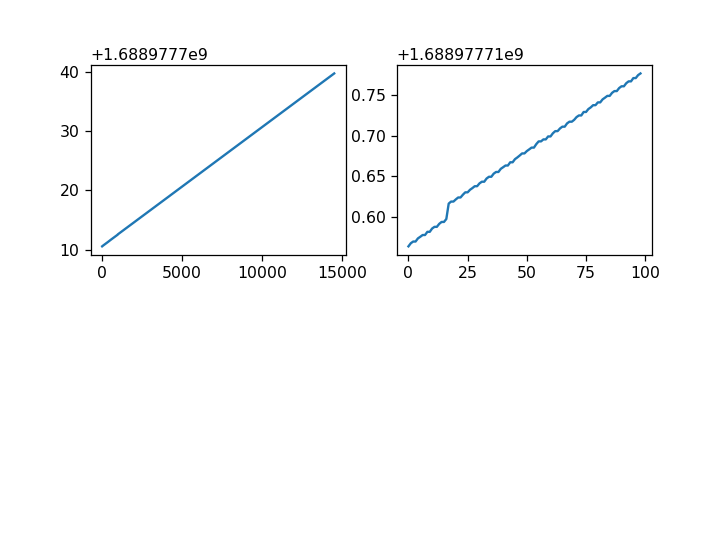

(14524, 10)
498.6729517383248
Time:
[[1.68897771e+09]
 [1.68897771e+09]
 [1.68897771e+09]
 ...
 [1.68897774e+09]
 [1.68897774e+09]
 [1.68897774e+09]]
Transtale:
[[ 0.18196902 -0.86555051 -0.57894417]
 [ 0.18196902 -0.86555051 -0.57894417]
 [ 0.18205931 -0.86552066 -0.57898856]
 ...
 [ 0.18200523 -0.8655398  -0.57898748]
 [ 0.18197212 -0.86552761 -0.57901367]
 [ 0.18197212 -0.86552761 -0.57901367]]
Quaternion:
[[-6.37086569e-05  2.84640892e-05  2.91604556e-03  9.99995746e-01]
 [-6.37086569e-05  2.84640892e-05  2.91604556e-03  9.99995746e-01]
 [-1.74882549e-05  1.44418278e-05  2.96682692e-03  9.99995599e-01]
 ...
 [-4.79605116e-05  2.64143248e-05  2.94203252e-03  9.99995671e-01]
 [-1.98996458e-05  2.87333646e-05  2.93458126e-03  9.99995693e-01]
 [-1.98996458e-05  2.87333646e-05  2.93458126e-03  9.99995693e-01]]


In [88]:
#Data gathering Robot ARM (Ground Truth)
f_GT_name = '/home/kuli/Desktop/WeAreVR/Measurements/robot_position_dev.csv'
with open(f_GT_name, 'r') as file:
    data = file.read()
pattern = r"(-?\d+(?:\.\d+)?(?:[eE][-+]?\d+)?)"
data = re.findall(pattern, data)
GT = np.reshape(data, (-1, 10)).astype(float)
time_columns = [0,1]
translate_columns = [3,4,5]
quaternion_columns = [6,7,8,9]
time_GT = GT[:, time_columns]
translate_GT = GT[:, translate_columns]
quaternion_GT_pre = GT[:, quaternion_columns]
# combine 2 rows to get time in seconds
combined_time = []
for row in time_GT:
    combined_time.append(row[0] + row[1] / 1e+09)
time_GT = np.reshape(combined_time, (-1, 1)).astype(float)
total_time = float(time_GT[-1]) - float(time_GT[0])
robot_avg_freq = int(np.shape(GT)[0]) / total_time 

fig = plt.figure()
ax = plt.subplot(221)
ax.plot(time_GT)
ax = plt.subplot(222)
ax.plot(time_GT[1:100])

print(np.shape(GT))
print(robot_avg_freq)
print("Time:")
print(time_GT)
print("Transtale:")
print(translate_GT)
print("Quaternion:")
print(quaternion_GT_pre)
#for q in quaternion_GT_pre:
#    print(q)

In [84]:
#Unifie the axis quaternions_GT (z > y) to (y > -x) quaternions_IMU
rot_WM = Quaternion([0.51, -0.51, 0.51, 0.51])
#Unifie the axis quaternions_GT (z > y) to (x > +-y) quaternions_IMU_NM
rot_NM =Quaternion([0.707, 0.0, 0.707, 0.0])

quaternion_GT_to_NM = np.copy(quaternion_GT_pre)
for index, item in enumerate(quaternion_GT_to_NM):
    #q = rot_WM * Quaternion(item) * rot_WM.inverse
    q = rot_NM * Quaternion(item) * rot_NM.inverse
    quaternion_GT_to_NM[index] = [np.format_float_positional(q[0]), np.format_float_positional(q[1]), np.format_float_positional(q[2]), np.format_float_positional(q[3])]
print(np.shape(quaternion_GT_to_NM))
for q in quaternion_GT_to_NM:
    print(q)

(14524, 4)
[-6.37086569e-05  9.99995746e-01  2.91604556e-03 -2.84640892e-05]
[-6.37086569e-05  9.99995746e-01  2.91604556e-03 -2.84640892e-05]
[-1.74882549e-05  9.99995599e-01  2.96682692e-03 -1.44418278e-05]
[-6.18340968e-05  9.99995770e-01  2.90770063e-03 -2.41852631e-05]
[-6.18340968e-05  9.99995770e-01  2.90770063e-03 -2.41852631e-05]
[-4.77320066e-05  9.99995852e-01  2.87986475e-03 -1.83088604e-05]
[-5.37682071e-05  9.99995728e-01  2.92224476e-03 -4.04466084e-05]
[-2.78600912e-05  9.99995700e-01  2.93225680e-03 -2.43931504e-05]
[-2.78600912e-05  9.99995700e-01  2.93225680e-03 -2.43931504e-05]
[-1.08218833e-04  9.99995652e-01  2.94686207e-03 -2.60469816e-05]
[-1.08218833e-04  9.99995652e-01  2.94686207e-03 -2.60469816e-05]
[-4.59698984e-05  9.99995747e-01  2.91616399e-03 -2.26122581e-05]
[-4.56718631e-05  9.99995722e-01  2.92444898e-03 -2.23727213e-05]
[-4.56718631e-05  9.99995722e-01  2.92444898e-03 -2.23727213e-05]
[-2.99663198e-05  9.99995716e-01  2.92641629e-03 -4.67906512e-05]

[-7.05502948e-05  9.08716628e-01  4.17413382e-01 -3.92692278e-04]
[-1.02394581e-04  9.08277114e-01  4.18368876e-01 -3.98009387e-04]
[-1.02394581e-04  9.08277114e-01  4.18368876e-01 -3.98009387e-04]
[-1.10611570e-04  9.07398970e-01  4.20270082e-01 -3.94345108e-04]
[-1.10611570e-04  9.07398970e-01  4.20270082e-01 -3.94345108e-04]
[-8.52159673e-05  9.06527151e-01  4.22147347e-01 -3.66124686e-04]
[-9.73603927e-05  9.05625549e-01  4.24078074e-01 -3.76657653e-04]
[-8.55308211e-05  9.05171738e-01  4.25045836e-01 -3.93159623e-04]
[-9.99349645e-05  9.04737610e-01  4.25969122e-01 -3.93021207e-04]
[-9.99349645e-05  9.04737610e-01  4.25969122e-01 -3.93021207e-04]
[-9.07096040e-05  9.04301497e-01  4.26894162e-01 -4.10963700e-04]
[-1.31203420e-04  9.03828052e-01  4.27895670e-01 -3.62709405e-04]
[-1.31203420e-04  9.03828052e-01  4.27895670e-01 -3.62709405e-04]
[-1.32103421e-04  9.02479214e-01  4.30733208e-01 -3.91510681e-04]
[-1.32103421e-04  9.02479214e-01  4.30733208e-01 -3.91510681e-04]
[-1.321034

[-1.36673388e-03 -3.29979558e-02  9.99454476e-01 -1.28334477e-04]
[-1.41037319e-03 -3.40792971e-02  9.99418125e-01 -1.55480145e-04]
[-1.37911370e-03 -3.51391270e-02  9.99381463e-01 -1.75324471e-04]
[-1.37911370e-03 -3.51391270e-02  9.99381463e-01 -1.75324471e-04]
[-1.39344187e-03 -3.72068101e-02  9.99306590e-01 -2.24223142e-04]
[-1.39344187e-03 -3.72068101e-02  9.99306590e-01 -2.24223142e-04]
[-1.38256247e-03 -3.92643926e-02  9.99227882e-01 -1.89309219e-04]
[-1.38256247e-03 -3.92643926e-02  9.99227882e-01 -1.89309219e-04]
[-1.41212007e-03 -4.13623334e-02  9.99143193e-01 -2.09412429e-04]
[-1.41212007e-03 -4.13623334e-02  9.99143193e-01 -2.09412429e-04]
[-1.41737451e-03 -4.34408217e-02  9.99054981e-01 -1.76269778e-04]
[-1.41737451e-03 -4.34408217e-02  9.99054981e-01 -1.76269778e-04]
[-1.42398227e-03 -4.55670487e-02  9.98960250e-01 -1.88893172e-04]
[-1.38227194e-03 -4.66249905e-02  9.98911489e-01 -1.89496143e-04]
[-1.38227194e-03 -4.66249905e-02  9.98911489e-01 -1.89496143e-04]
[-1.406839

[ 0.00119676  0.94906258 -0.31507792 -0.00216495]
[ 0.00120182  0.94938755 -0.31409758 -0.00213017]
[ 0.00120182  0.94938755 -0.31409758 -0.00213017]
[ 0.00119519  0.9500523  -0.31208089 -0.00217152]
[ 0.0011598   0.95038216 -0.311075   -0.0021813 ]
[ 0.0011598   0.95038216 -0.311075   -0.0021813 ]
[ 0.00119814  0.95101623 -0.30913105 -0.00216558]
[ 0.00118723  0.95135355 -0.30809142 -0.00216558]
[ 0.00113839  0.95165243 -0.30716714 -0.00216878]
[ 0.00113839  0.95165243 -0.30716714 -0.00216878]
[ 0.00116207  0.95230811 -0.30512816 -0.00217266]
[ 0.00116207  0.95230811 -0.30512816 -0.00217266]
[ 0.00118827  0.95295669 -0.30309629 -0.00218488]
[ 0.00118827  0.95295669 -0.30309629 -0.00218488]
[ 0.00117367  0.95359847 -0.30107126 -0.00216277]
[ 0.00117367  0.95359847 -0.30107126 -0.00216277]
[ 0.00114657  0.9542328  -0.29905462 -0.00218901]
[ 0.00114657  0.9542328  -0.29905462 -0.00218901]
[ 0.00115588  0.95484952 -0.29707943 -0.00220833]
[ 0.00115588  0.95484952 -0.29707943 -0.00220833]


[-0.00255861  0.55837447  0.82958118 -0.00254387]
[-0.002578    0.55745974  0.83019614 -0.0025235 ]
[-0.002578    0.55745974  0.83019614 -0.0025235 ]
[-0.00256556  0.555731    0.83135432 -0.00254468]
[-0.00256556  0.555731    0.83135432 -0.00254468]
[-0.00257539  0.55397761  0.83252384 -0.00249597]
[-0.00258917  0.55310028  0.83310687 -0.00251307]
[-0.00257308  0.55132441  0.83428328 -0.00248547]
[-0.00258442  0.55045542  0.83485682 -0.00249853]
[-0.00258442  0.55045542  0.83485682 -0.00249853]
[-0.00261761  0.54956168  0.83544528 -0.00250841]
[-0.00261761  0.54956168  0.83544528 -0.00250841]
[-0.00258627  0.5478167   0.83659067 -0.00249608]
[-0.00254372  0.54692818  0.83717181 -0.00254076]
[-0.00258284  0.54520427  0.83829571 -0.00243482]
[-0.00258284  0.54520427  0.83829571 -0.00243482]
[-0.00258284  0.54520427  0.83829571 -0.00243482]
[-0.00259896  0.54345417  0.83943102 -0.00252337]
[-0.00259896  0.54345417  0.83943102 -0.00252337]
[-0.00263907  0.54170283  0.84056234 -0.00245679]


[ 0.00425621  0.57130212 -0.82072664 -0.00188226]
[ 0.00421698  0.57216294 -0.82012688 -0.00192176]
[ 0.00425135  0.57304364 -0.81951164 -0.00189535]
[ 0.00425135  0.57304364 -0.81951164 -0.00189535]
[ 0.00422737  0.57473671 -0.81832527 -0.00189749]
[ 0.00425472  0.57561455 -0.81770791 -0.00188507]
[ 0.00425472  0.57561455 -0.81770791 -0.00188507]
[ 0.00422578  0.57733201 -0.81649634 -0.00190127]
[ 0.00422847  0.57817937 -0.8158965  -0.00190984]
[ 0.00422847  0.57817937 -0.8158965  -0.00190984]
[ 0.00422423  0.57988639 -0.81468418 -0.00190085]
[ 0.0042305   0.58157357 -0.8134805  -0.0019372 ]
[ 0.0042305   0.58157357 -0.8134805  -0.0019372 ]
[ 0.0042305   0.58157357 -0.8134805  -0.0019372 ]
[ 0.00419104  0.58323146 -0.81229293 -0.00192246]
[ 0.00421129  0.58409177 -0.81167431 -0.0019687 ]
[ 0.00421129  0.58409177 -0.81167431 -0.0019687 ]
[ 0.00422835  0.58583656 -0.81041579 -0.00197217]
[ 0.00422127  0.58667028 -0.80981261 -0.00192535]
[ 0.00419103  0.58749097 -0.80921751 -0.00195447]


[ 0.0012374   0.99906424 -0.04291108 -0.00526728]
[ 0.0012374   0.99906424 -0.04291108 -0.00526728]
[ 0.00123943  0.99908712 -0.04237217 -0.00528993]
[ 0.00127206  0.99909758 -0.04212429 -0.00528669]
[ 0.00127206  0.99909758 -0.04212429 -0.00528669]
[ 0.00131464  0.99911845 -0.04162728 -0.0052692 ]
[ 0.00131464  0.99911845 -0.04162728 -0.0052692 ]
[ 0.00131207  0.99914023 -0.04109614 -0.00530844]
[ 0.00131207  0.99914023 -0.04109614 -0.00530844]
[ 0.00127955  0.99916125 -0.04058839 -0.00526785]
[ 0.00125875  0.99917885 -0.04015343 -0.00526688]
[ 0.00125875  0.99917885 -0.04015343 -0.00526688]
[ 0.00130697  0.99918893 -0.03989697 -0.00529181]
[ 0.00130697  0.99918893 -0.03989697 -0.00529181]
[ 0.00127783  0.99920779 -0.03942315 -0.00528919]
[ 0.00127783  0.99920779 -0.03942315 -0.00528919]
[ 0.00129543  0.99922503 -0.03898428 -0.00528092]
[ 0.00129543  0.99922503 -0.03898428 -0.00528092]
[ 0.00127759  0.99924026 -0.03859077 -0.00529448]
[ 0.00127759  0.99924026 -0.03859077 -0.00529448]


[ 0.00410311  0.65518708 -0.75545189 -0.00234383]
[ 0.00410311  0.65518708 -0.75545189 -0.00234383]
[ 0.00410969  0.65363367 -0.75679619 -0.00237677]
[ 0.00410969  0.65363367 -0.75679619 -0.00237677]
[ 0.0041068   0.65199642 -0.75820744 -0.00229708]
[ 0.00411029  0.65120639 -0.75888598 -0.00232846]
[ 0.00411029  0.65120639 -0.75888598 -0.00232846]
[ 0.00411095  0.64964431 -0.76022364 -0.00232191]
[ 0.00413924  0.64805291 -0.76158058 -0.00230414]
[ 0.00413924  0.64805291 -0.76158058 -0.00230414]
[ 0.00409699  0.64642562 -0.76296246 -0.00232632]
[ 0.00409699  0.64642562 -0.76296246 -0.00232632]
[ 0.00409699  0.64642562 -0.76296246 -0.00232632]
[ 0.00412011  0.64484056 -0.7643025  -0.00231789]
[ 0.00414988  0.64402575 -0.76498916 -0.00228104]
[ 0.00413211  0.64320831 -0.76567671 -0.00227549]
[ 0.00415778  0.64164358 -0.76698831 -0.00227343]
[ 0.00415778  0.64164358 -0.76698831 -0.00227343]
[ 0.00415778  0.64164358 -0.76698831 -0.00227343]
[ 0.00415551  0.63998909 -0.76836936 -0.00228283]


[-0.00250812  0.55618786  0.83104884 -0.00256851]
[-0.00250812  0.55618786  0.83104884 -0.00256851]
[-0.00249545  0.55885361  0.82925857 -0.00257585]
[-0.00249545  0.55885361  0.82925857 -0.00257585]
[-0.00249545  0.55885361  0.82925857 -0.00257585]
[-0.00250112  0.5605577   0.82810759 -0.00257543]
[-0.00248172  0.56142513  0.82751978 -0.0025848 ]
[-0.00248137  0.56230579  0.82692168 -0.00256229]
[-0.00248137  0.56230579  0.82692168 -0.00256229]
[-0.00252016  0.56400279  0.8257649  -0.00261409]
[-0.00249679  0.56572484  0.82458623 -0.00259233]
[-0.00249679  0.56572484  0.82458623 -0.00259233]
[-0.00248451  0.56742591  0.82341655 -0.00261756]
[-0.00248451  0.56742591  0.82341655 -0.00261756]
[-0.00248275  0.56828838  0.82282163 -0.00259397]
[-0.00248275  0.56828838  0.82282163 -0.00259397]
[-0.0024692   0.57004831  0.82160335 -0.00260043]
[-0.00248368  0.57087336  0.82103022 -0.00261044]
[-0.00249632  0.57258064  0.8198405  -0.00259592]
[-0.00249632  0.57258064  0.8198405  -0.00259592]


[ 0.0012203   0.94274986 -0.33349171 -0.00212021]
[ 0.00124989  0.94204832 -0.33546827 -0.00210443]
[ 0.00125018  0.9416975  -0.33645171 -0.00212304]
[ 0.00125018  0.9416975  -0.33645171 -0.00212304]
[ 0.00123007  0.94099904 -0.33840035 -0.00212289]
[ 0.00123007  0.94099904 -0.33840035 -0.00212289]
[ 0.00127248  0.9402959  -0.34034922 -0.00210001]
[ 0.00127248  0.9402959  -0.34034922 -0.00210001]
[ 0.00122044  0.93921081 -0.34333235 -0.00211125]
[ 0.00122044  0.93921081 -0.34333235 -0.00211125]
[ 0.00122044  0.93921081 -0.34333235 -0.00211125]
[ 0.0012814   0.93849449 -0.34528561 -0.00207504]
[ 0.00125379  0.93813898 -0.34625028 -0.00210598]
[ 0.00125379  0.93813898 -0.34625028 -0.00210598]
[ 0.00127079  0.93740398 -0.34823522 -0.00209462]
[ 0.00130198  0.93705097 -0.34918391 -0.00209092]
[ 0.00123692  0.93632351 -0.3511302  -0.00208182]
[ 0.00126325  0.93594071 -0.35214933 -0.00205872]
[ 0.00126325  0.93594071 -0.35214933 -0.00205872]
[ 0.00126325  0.93594071 -0.35214933 -0.00205872]


[-1.38729714e-03 -2.82647300e-02  9.99599496e-01 -1.64604881e-04]
[-1.38729714e-03 -2.82647300e-02  9.99599496e-01 -1.64604881e-04]
[-1.39192926e-03 -2.72164139e-02  9.99628577e-01 -1.91483168e-04]
[-1.39564950e-03 -2.61708385e-02  9.99656491e-01 -1.97145458e-04]
[-1.38899808e-03 -2.51108483e-02  9.99683692e-01 -1.80666628e-04]
[-1.38899808e-03 -2.51108483e-02  9.99683692e-01 -1.80666628e-04]
[-1.36549816e-03 -2.29912346e-02  9.99734712e-01 -2.12465362e-04]
[-1.38562391e-03 -2.09386656e-02  9.99779790e-01 -1.56387583e-04]
[-1.38016221e-03 -1.98878964e-02  9.99801246e-01 -1.88008561e-04]
[-1.38016221e-03 -1.98878964e-02  9.99801246e-01 -1.88008561e-04]
[-1.37436746e-03 -1.77769201e-02  9.99841009e-01 -2.19347503e-04]
[-1.37436746e-03 -1.77769201e-02  9.99841009e-01 -2.19347503e-04]
[-1.37436746e-03 -1.77769201e-02  9.99841009e-01 -2.19347503e-04]
[-1.35712744e-03 -1.56671417e-02  9.99876324e-01 -1.90554696e-04]
[-1.37514220e-03 -1.46173156e-02  9.99892196e-01 -1.97048156e-04]
[-1.385551

[-1.24384985e-04  9.23246227e-01  3.84208624e-01 -3.49355097e-04]
[-1.24384985e-04  9.23246227e-01  3.84208624e-01 -3.49355097e-04]
[-7.25428976e-05  9.24044065e-01  3.82285811e-01 -3.46653682e-04]
[-7.25428976e-05  9.24044065e-01  3.82285811e-01 -3.46653682e-04]
[-9.13440600e-05  9.24855107e-01  3.80319458e-01 -3.62965969e-04]
[-9.13440600e-05  9.24855107e-01  3.80319458e-01 -3.62965969e-04]
[-6.06162771e-05  9.25647552e-01  3.78386696e-01 -3.37858638e-04]
[-6.22576702e-05  9.26448640e-01  3.76421024e-01 -3.54544798e-04]
[-9.88722586e-05  9.26810553e-01  3.75529045e-01 -3.54952822e-04]
[-9.88722586e-05  9.26810553e-01  3.75529045e-01 -3.54952822e-04]
[-9.88722586e-05  9.26810553e-01  3.75529045e-01 -3.54952822e-04]
[-3.21978008e-05  9.27593274e-01  3.73591473e-01 -3.57746919e-04]
[-3.21978008e-05  9.27593274e-01  3.73591473e-01 -3.57746919e-04]
[-1.00556765e-04  9.28387191e-01  3.71614184e-01 -3.35055782e-04]
[-1.00556765e-04  9.28387191e-01  3.71614184e-01 -3.35055782e-04]
[-5.136557

[-4.59727455e-05  9.99995723e-01  2.92427065e-03 -3.28651750e-05]
[-4.59727455e-05  9.99995723e-01  2.92427065e-03 -3.28651750e-05]
[-4.59727455e-05  9.99995723e-01  2.92427065e-03 -3.28651750e-05]
[-2.00458848e-05  9.99995604e-01  2.96503919e-03 -3.27843253e-05]
[-2.79132015e-05  9.99995893e-01  2.86579814e-03 -3.29755610e-05]
[-4.79650135e-05  9.99995645e-01  2.95079486e-03 -3.69054908e-05]
[-4.79650135e-05  9.99995645e-01  2.95079486e-03 -3.69054908e-05]
[-2.99563785e-05  9.99995717e-01  2.92641539e-03 -1.62736363e-05]
[-2.80669311e-05  9.99995677e-01  2.94000577e-03 -3.84577195e-05]
[-2.80669311e-05  9.99995677e-01  2.94000577e-03 -3.84577195e-05]
[-4.39930626e-05  9.99995716e-01  2.92635707e-03 -4.05067466e-05]
[-4.39930626e-05  9.99995716e-01  2.92635707e-03 -4.05067466e-05]
[-2.99917077e-05  9.99995747e-01  2.91622377e-03 -4.10675689e-05]
[-1.92852625e-05  9.99995695e-01  2.93422301e-03  3.45005549e-06]
[-1.92852625e-05  9.99995695e-01  2.93422301e-03  3.45005549e-06]
[-3.796045

# IMU FSM-9

In [66]:
#Data gathering
f_name = '/home/kuli/Desktop/WeAreVR/Measurements/imu_position_11.csv'

with open(f_name , 'r') as f:
    # Use the csv library to read the file and parse it into a list of lists
    csv_reader = csv.reader(f, delimiter=';')
    data = []
    row = next(csv_reader)  # Read the first row
    
    # Skip the sensor data list
    for i in range(0,11):
        row = next(csv_reader)
    
    while row:  # Continue reading until a blank row is encountered
        data.append(row)  # Append the row to the data list
        try:
            row = next(csv_reader)  # Read the next row
        except StopIteration:  # Stop reading if there are no more rows
            break

data = np.array(data).astype(float)
print(np.shape(data))
IMU_data = data

(12419, 10)


(12419, 10)
30.93939995765686
401.3975712843957


<IPython.core.display.Javascript object>


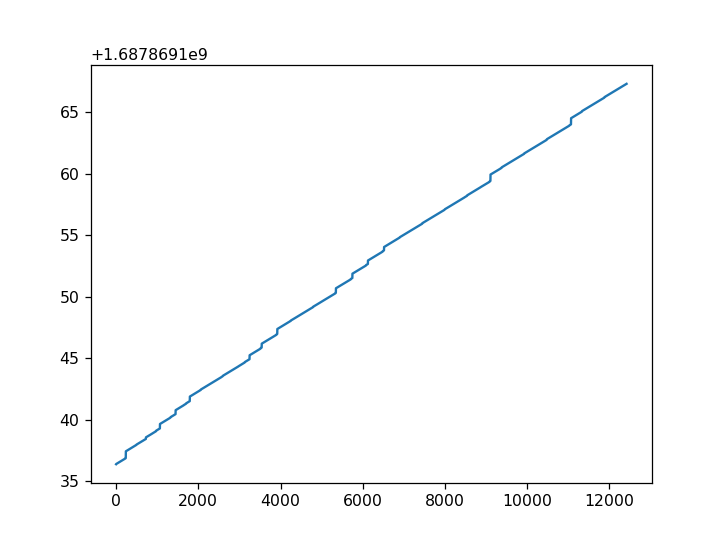

Acc:
[[-0.3047  0.2998 -9.6523]
 [-0.293   0.3545 -9.6816]
 [-0.375   0.3545 -9.7188]
 ...
 [-0.3057  0.3047 -9.5713]
 [-0.3564  0.2852 -9.6328]
 [-0.3008  0.293  -9.5811]]
Gyro:
[[ 0. -0. -0.]
 [ 0.  0.  0.]
 [-0.  0.  0.]
 ...
 [-0. -0.  0.]
 [ 0. -0.  0.]
 [ 0. -0. -0.]]
Mag:
[[ 0.04  0.09  0.5 ]
 [-0.35  1.06 -0.27]
 [-0.35  1.06 -0.27]
 ...
 [-0.34  1.04 -0.26]
 [-0.35  1.04 -0.27]
 [-0.34  1.05 -0.27]]


In [71]:
#convert to float
data = np.array(data).astype(float)

#re-sampling:
#data = resample(data, num = np.shape(quaternion_GT_to_NM)[0])
print(np.shape(data))

#frequency count
IMU_total_time = float(data[-1][0]) - float(data[0][0])
IMU_avg_freq = int(np.shape(data)[0]) / IMU_total_time 
print(IMU_total_time)
print(IMU_avg_freq)
acc_columns = [1,2,3]
gyro_columns = [4,5,6]
mag_columns = [7,8,9]
ypr_columns = [10,11,12]
acc_data = data[:, acc_columns]
gyro_data = data[:, gyro_columns]
mag_data = data[:, mag_columns]
#ypr_data = data[:, ypr_columns]
fig, ax = plt.subplots()
plt.plot(data[:,0])

print("Acc:")
print(acc_data)
print("Gyro:")
print(gyro_data) 
print("Mag:")
print(mag_data) 
#print("Yaw Pitch Rol:")
#print(ypr_data)

In [17]:
#Computing quaternion Mahony
quaternions_IMU = Mahony(gyr=gyro_data, acc=acc_data, mag = mag_data, frequency = IMU_avg_freq).Q   # Using IMU with sample rate 8ms (default)
quaternions_IMU_NM = Mahony(gyr=gyro_data, acc=acc_data, frequency = IMU_avg_freq).Q   # Using IMU with sample rate 8ms (default)
print(np.shape(quaternions_IMU_NM))
for q in quaternions_IMU_NM:
    print(q)

(12419, 4)
[ 1.55224319e-02  9.99755146e-01  2.44823992e-04 -1.57684084e-02]
[ 1.55224319e-02  9.99755146e-01  2.44823992e-04 -1.57684084e-02]
[ 1.55224319e-02  9.99755146e-01  2.44823992e-04 -1.57684084e-02]
[ 1.55224319e-02  9.99755146e-01  2.44823992e-04 -1.57684084e-02]
[ 1.55224319e-02  9.99755146e-01  2.44823992e-04 -1.57684084e-02]
[ 1.55224319e-02  9.99755146e-01  2.44823992e-04 -1.57684084e-02]
[ 1.55224319e-02  9.99755146e-01  2.44823992e-04 -1.57684084e-02]
[ 1.55224319e-02  9.99755146e-01  2.44823992e-04 -1.57684084e-02]
[ 1.55224319e-02  9.99755146e-01  2.44823992e-04 -1.57684084e-02]
[ 1.55224319e-02  9.99755146e-01  2.44823992e-04 -1.57684084e-02]
[ 1.55224319e-02  9.99755146e-01  2.44823992e-04 -1.57684084e-02]
[ 1.55224319e-02  9.99755146e-01  2.44823992e-04 -1.57684084e-02]
[ 1.55224319e-02  9.99755146e-01  2.44823992e-04 -1.57684084e-02]
[ 1.55224319e-02  9.99755146e-01  2.44823992e-04 -1.57684084e-02]
[ 1.55224319e-02  9.99755146e-01  2.44823992e-04 -1.57684084e-02]

[-0.00177026  0.55891679 -0.82898861 -0.01966663]
[-0.00181475  0.55758352 -0.82988607 -0.01965771]
[-0.00186387  0.55625976 -0.83077507 -0.01960584]
[-0.00191196  0.55492369 -0.83166883 -0.01957041]
[-0.00195251  0.55356596 -0.83257448 -0.0195101 ]
[-0.00202015  0.55219611 -0.83348423 -0.01947863]
[-0.00202542  0.55081277 -0.83439794 -0.01952595]
[-0.00206805  0.54945017 -0.83529631 -0.01950135]
[-0.00210363  0.54809603 -0.83618524 -0.01950793]
[-0.0021805   0.54674172 -0.83707283 -0.01943736]
[-0.0022248   0.54536351 -0.83797088 -0.01945515]
[-0.0022472   0.54398338 -0.83886679 -0.01948185]
[-0.00229783  0.54262355 -0.8397471  -0.01947333]
[-0.00231623  0.54126173 -0.84062491 -0.01949695]
[-0.00239414  0.5399108  -0.84149477 -0.01942036]
[-0.00244627  0.53854654 -0.8423682  -0.01942819]
[-0.00250875  0.53717187 -0.84324703 -0.0193528 ]
[-0.00257227  0.53578454 -0.84412937 -0.01933676]
[-0.00258421  0.53438382 -0.84501597 -0.01937174]
[-0.00261846  0.53300375 -0.84588755 -0.01934935]


[-0.01927823 -0.98148187 -0.19028901  0.01057268]
[-0.01925232 -0.98179383 -0.18867385  0.01060192]
[-0.01921037 -0.98210118 -0.18707082  0.01061753]
[-0.01926182 -0.98240415 -0.18546589  0.01065243]
[-0.01921209 -0.9827015  -0.18388651  0.01069589]
[-0.01918511 -0.98299611 -0.18230643  0.01072137]
[-0.01914912 -0.98329048 -0.18071388  0.01075312]
[-0.01907099 -0.98358549 -0.17910887  0.01076558]
[-0.01909025 -0.98387815 -0.17748979  0.01080413]
[-0.01904661 -0.984167   -0.17588371  0.01083811]
[-0.01901951 -0.98445542 -0.1742643   0.01085039]
[-0.01899092 -0.98474087 -0.17264452  0.01089226]
[-0.01897339 -0.98502346 -0.17102411  0.01093347]
[-0.01896564 -0.98530333 -0.1694033   0.01096218]
[-0.01893366 -0.98557909 -0.16779436  0.01097382]
[-0.01897482 -0.98585105 -0.16618387  0.01098076]
[-0.01892841 -0.98611541 -0.16461136  0.01100969]
[-0.01888469 -0.98637727 -0.16303832  0.01103402]
[-0.01882256 -0.98663871 -0.16145312  0.01107508]
[-0.01876907 -0.98690184 -0.1598423   0.01108645]


[0.02204093 0.36098555 0.93228918 0.0063655 ]
[0.02209106 0.3625072  0.93169737 0.00636642]
[0.02206418 0.36401566 0.9311103  0.00627442]
[0.02207633 0.36554768 0.93050955 0.00628523]
[0.02207713 0.36706612 0.92991194 0.00623284]
[0.02207394 0.36859552 0.92930709 0.0061972 ]
[0.02210033 0.37012406 0.92869878 0.00619149]
[0.02206933 0.37163973 0.92809446 0.00612516]
[0.02208742 0.37316663 0.9274811  0.00613288]
[0.02209609 0.3746916  0.92686621 0.00608301]
[0.02210564 0.37620499 0.92625271 0.00608721]
[0.0221277  0.37770532 0.92564151 0.0060712 ]
[0.02209882 0.37919327 0.92503396 0.00602357]
[0.02212276 0.38069173 0.92441777 0.00601543]
[0.0220797  0.3821885  0.92380161 0.00591774]
[0.02211209 0.38370843 0.92317039 0.00594292]
[0.02209905 0.38521492 0.92254349 0.00588259]
[0.02209964 0.3867326  0.92190835 0.00587374]
[0.02213092 0.38824881 0.92127015 0.00586517]
[0.02209123 0.38975246 0.92063639 0.00579899]
[0.02212315 0.39126686 0.91999298 0.00580691]
[0.02211444 0.39276826 0.91935353 

[ 0.010714    0.77914149  0.62673253 -0.00548474]
[ 0.01070155  0.77843104  0.62761552 -0.00541769]
[ 0.01065407  0.77770378  0.62851761 -0.0053796 ]
[ 0.01068118  0.7769751   0.62941817 -0.00532664]
[ 0.01072081  0.7762292   0.63033728 -0.00531144]
[ 0.01070261  0.77547446  0.63126587 -0.00531174]
[ 0.01064693  0.77471912  0.63219374 -0.00529148]
[ 0.01065712  0.77397012  0.63311048 -0.0052722 ]
[ 0.01063899  0.77322009  0.63402667 -0.00526143]
[ 0.0106312   0.7724692   0.63494174 -0.00522525]
[ 0.01064908  0.77171731  0.63585554 -0.00516917]
[ 0.01063081  0.77095657  0.63677851 -0.00510667]
[ 0.0105541   0.77017866  0.63772053 -0.00509469]
[ 0.01057385  0.76941553  0.63864106 -0.00505275]
[ 0.01053616  0.76865132  0.6395614  -0.00503571]
[ 0.01049108  0.76788586  0.64048111 -0.0050189 ]
[ 0.01050852  0.76712728  0.64138955 -0.00497458]
[ 0.01051406  0.76635956  0.64230682 -0.00494233]
[ 0.01054209  0.76559055  0.64322298 -0.00491747]
[ 0.01053947  0.76481257  0.64414806 -0.00489171]


[-0.00778313 -0.97641368  0.21565856  0.0068648 ]
[-0.0077956  -0.97676462  0.21406371  0.00684285]
[-0.00782399 -0.97711003  0.21248061  0.00683841]
[-0.00786091 -0.97745278  0.21089696  0.00683651]
[-0.00776874 -0.97779424  0.20931247  0.0068084 ]
[-0.00787234 -0.97812583  0.20775199  0.00685484]
[-0.0078798  -0.97845869  0.20617874  0.00684249]
[-0.00793641 -0.97879092  0.20459296  0.00686052]
[-0.00795446 -0.97912616  0.20298219  0.00685003]
[-0.00797024 -0.97945854  0.20137063  0.00687796]
[-0.00795396 -0.97978879  0.1997586   0.00686734]
[-0.00798025 -0.98011355  0.19815834  0.00685744]
[-0.00799703 -0.98043335  0.19656976  0.00684287]
[-0.00798154 -0.98075342  0.19496849  0.00680579]
[-0.00804748 -0.98106749  0.19337894  0.00681165]
[-0.00804008 -0.98138224  0.19177661  0.0067818 ]
[-0.00799521 -0.98169219  0.19018583  0.00677353]
[-0.00804686 -0.98199386  0.18861931  0.00678708]
[-0.00807359 -0.98229793  0.18702772  0.00679893]
[-0.00809952 -0.98260186  0.18542332  0.0067959 ]


[-0.01140559  0.25302981 -0.96738234 -0.00415178]
[-0.01139586  0.25462163 -0.96696492 -0.00409886]
[-0.01136249  0.25618797 -0.96655148 -0.00410541]
[-0.0113336   0.25774175 -0.96613867 -0.00409965]
[-0.01132648  0.2592945  -0.96572308 -0.00412461]
[-0.01129759  0.26084639 -0.96530523 -0.00416527]
[-0.01126699  0.26242232 -0.96487842 -0.00414885]
[-0.01125355  0.26398459 -0.96445205 -0.00421163]
[-0.01124006  0.26555904 -0.96401992 -0.0042015 ]
[-0.01121761  0.26713231 -0.96358527 -0.00423263]
[-0.0111863   0.2687051  -0.96314819 -0.00424345]
[-0.01115199  0.27027745 -0.96270859 -0.00423138]
[-0.01113414  0.27184785 -0.96226613 -0.00432133]
[-0.01114044  0.27344348 -0.96181418 -0.00424628]
[-0.01112303  0.27500132 -0.96137006 -0.00426275]
[-0.01109468  0.27655881 -0.96092357 -0.00424691]
[-0.0110767   0.2781031  -0.96047785 -0.00427478]
[-0.01104814  0.27964634 -0.96002974 -0.00433233]
[-0.01103761  0.28121403 -0.95957203 -0.00428406]
[-0.01100536  0.28276769 -0.95911544 -0.00434681]


[ 0.02092722  0.78509053  0.61898901 -0.00689254]
[ 0.02096276  0.78487374  0.61926259 -0.00690013]
[ 0.02098012  0.78465707  0.61953626 -0.00692343]
[ 0.02099767  0.78444019  0.61981009 -0.00693739]
[ 0.02101297  0.78422324  0.6200839  -0.00695144]
[ 0.02102818  0.78401395  0.62034784 -0.00696396]
[ 0.02106556  0.78380443  0.62061122 -0.00696914]
[ 0.02106167  0.78360323  0.62086525 -0.00698072]
[ 0.02106999  0.78340185  0.62111895 -0.00698915]
[ 0.02108695  0.78320018  0.6213725  -0.00700312]
[ 0.02112322  0.78299824  0.62162576 -0.00699891]
[ 0.02114993  0.78279624  0.62187919 -0.00700013]
[ 0.02116395  0.78259405  0.62213296 -0.00701481]
[ 0.02119197  0.78239175  0.62238632 -0.0070223 ]
[ 0.02121503  0.78218934  0.62263977 -0.00703475]
[ 0.02123606  0.78199478  0.62288334 -0.00703861]
[ 0.02123708  0.78180825  0.62311725 -0.00705236]
[ 0.02126411  0.78162116  0.62335091 -0.00705991]
[ 0.02128388  0.7814342   0.6235844  -0.00707698]
[ 0.02130398  0.78125512  0.62380797 -0.00708392]


[ 0.02571365  0.77933951  0.62601038 -0.0089294 ]
[ 0.02571365  0.77933951  0.62601038 -0.0089294 ]
[ 0.02571365  0.77933951  0.62601038 -0.0089294 ]
[ 0.02571365  0.77933951  0.62601038 -0.0089294 ]
[ 0.02571365  0.77933951  0.62601038 -0.0089294 ]
[ 0.02571365  0.77933951  0.62601038 -0.0089294 ]
[ 0.02571365  0.77933951  0.62601038 -0.0089294 ]
[ 0.02571365  0.77933951  0.62601038 -0.0089294 ]
[ 0.02571365  0.77933951  0.62601038 -0.0089294 ]
[ 0.02571365  0.77933951  0.62601038 -0.0089294 ]
[ 0.02571365  0.77933951  0.62601038 -0.0089294 ]
[ 0.02571365  0.77933951  0.62601038 -0.0089294 ]
[ 0.02571365  0.77933951  0.62601038 -0.0089294 ]
[ 0.02571365  0.77933951  0.62601038 -0.0089294 ]
[ 0.02571365  0.77933951  0.62601038 -0.0089294 ]
[ 0.02571365  0.77933951  0.62601038 -0.0089294 ]
[ 0.02571365  0.77933951  0.62601038 -0.0089294 ]
[ 0.02571365  0.77933951  0.62601038 -0.0089294 ]
[ 0.02571365  0.77933951  0.62601038 -0.0089294 ]
[ 0.02571365  0.77933951  0.62601038 -0.0089294 ]


[ 0.02583695  0.77933764  0.62600665 -0.00899834]
[ 0.02583695  0.77933764  0.62600665 -0.00899834]
[ 0.02583695  0.77933764  0.62600665 -0.00899834]
[ 0.02583695  0.77933764  0.62600665 -0.00899834]
[ 0.02583695  0.77933764  0.62600665 -0.00899834]
[ 0.02583695  0.77933764  0.62600665 -0.00899834]
[ 0.02583695  0.77933764  0.62600665 -0.00899834]
[ 0.02583695  0.77933764  0.62600665 -0.00899834]
[ 0.02583695  0.77933764  0.62600665 -0.00899834]
[ 0.02583695  0.77933764  0.62600665 -0.00899834]
[ 0.02583695  0.77933764  0.62600665 -0.00899834]
[ 0.02583695  0.77933764  0.62600665 -0.00899834]
[ 0.02583695  0.77933764  0.62600665 -0.00899834]
[ 0.02583695  0.77933764  0.62600665 -0.00899834]
[ 0.02583695  0.77933764  0.62600665 -0.00899834]
[ 0.02583695  0.77933764  0.62600665 -0.00899834]
[ 0.02583695  0.77933764  0.62600665 -0.00899834]
[ 0.02583695  0.77933764  0.62600665 -0.00899834]
[ 0.02583695  0.77933764  0.62600665 -0.00899834]
[ 0.02583695  0.77933764  0.62600665 -0.00899834]


In [27]:
#num_samples = np.shape(gyro_data)[0]
orientation = Mahony()
quaternions = np.tile(quaternions_IMU[0], (num_samples, 1)) # Allocate for quaternions
for t in range(1, num_samples):
    quaternions[t] = orientation.updateMARG(quaternions[t-1], gyr=gyro_data[t], acc=acc_data[t], mag=mag_data[t], dt = 1./125. )
print(quaternions)

# Visualise

In [12]:
def get_arrow(num, orientation):
    pitch = np.radians(orientation[num, 1])
    yaw = np.radians(orientation[num, 2])
    u = np.sin(yaw)*np.cos(pitch)
    v = np.cos(yaw)*np.cos(pitch)
    w = np.sin(pitch)
    return 0,0,0,u,v,w

def get_arrow_q(num, quaternions, InitialPerspectiveVector):
    u, v, w = Quaternion(quaternions[num]).rotate(InitialPerspectiveVector)
    return 0,0,0,u,v,w

def get_arrow_unwinded(num, quaternions, Vector):
    u_u, v_u, w_u = Quaternion(quaternions[num]).inverse.rotate(Vector)
    return 0,0,0,u_u,v_u,w_u


In [ ]:
#Vector from sensor
%matplotlib notebook
%matplotlib notebook

WantToClear = 1

orientation = ypr_data

fig, ax = plt.subplots(subplot_kw=dict(projection="3d"))
ax.set_xlim(-1, 1)
ax.set_ylim(-1, 1)
ax.set_zlim(-1, 1)

ax.quiver(-1, 0, 0, 3, 0, 0, color='#aaaaaa',linestyle='dashed')
ax.quiver(0, -1, 0, 0, 3, 0, color='#aaaaaa',linestyle='dashed')
ax.quiver(0, 0, -1, 0, 0, 3, color='#aaaaaa',linestyle='dashed')
    
def update1(num, Q, X):
    if (WantToClear):
        ax.clear()  
        ax.quiver(-1, 0, 0, 3, 0, 0, color='#aaaaaa',linestyle='dashed')
        ax.quiver(0, -1, 0, 0, 3, 0, color='#aaaaaa',linestyle='dashed')
        ax.quiver(0, 0, -1, 0, 0, 3, color='#aaaaaa',linestyle='dashed')
        ax.set_xlim(-1, 1)
        ax.set_ylim(-1, 1)
        ax.set_zlim(-1, 1)
    Qui = ax.quiver(*get_arrow(num, orientation), length=1, normalize=True)

Qui = ax.quiver(*get_arrow(0, orientation), length=1, normalize=True)  
ani = FuncAnimation(fig, update1, fargs=(Qui, Qui), frames=range(0, np.shape(orientation)[0]), interval=1, blit=True, repeat = False)
plt.show()

In [ ]:
#Quaternion from IMU (Mahony)
%matplotlib notebook
%matplotlib notebook

quaternions = quaternions_IMU_NM
WantToClear = 1
InitialPerspectiveVector = [1.0, 0.0, 0.0]
x0, y0, z0, u0, v0, w0 = get_arrow_q(0, quaternions, InitialPerspectiveVector)
#
fig, ax = plt.subplots(subplot_kw=dict(projection="3d"))
ax.set_xlim(-1, 1)
ax.set_ylim(-1, 1)
ax.set_zlim(-1, 1)
ax.quiver(-1, 0, 0, 3, 0, 0, color='#aaaaaa',linestyle='dashed')
ax.quiver(0, -1, 0, 0,3, 0, color='#aaaaaa',linestyle='dashed')
ax.quiver(0, 0, -1, 0, 0, 3, color='#aaaaaa',linestyle='dashed')

def update2(num, Q, X):
    if (WantToClear):
        ax.clear()  
        ax.quiver(-1, 0, 0, 3, 0, 0, color='#aaaaaa',linestyle='dashed')
        ax.quiver(0, -1, 0, 0,3, 0, color='#aaaaaa',linestyle='dashed')
        ax.quiver(0, 0, -1, 0, 0, 3, color='#aaaaaa',linestyle='dashed')
        ax.set_xlim(-1, 1)
        ax.set_ylim(-1, 1)
        ax.set_zlim(-1, 1) 
        x, y, z, u, v, w = get_arrow_q(num, quaternions, InitialPerspectiveVector)
    Qui = ax.quiver([x,x0], [y,y0], [z,z0], [u,u0], [v,v0], [w,w0], length=1, normalize=True, color = ['blue', 'green'])

Qui = ax.quiver([x0,x0], [y0,y0], [z0,z0], [u0,u0], [v0,v0], [w0,w0], length=1, normalize=True, color = ['green', 'green'])  
ani = FuncAnimation(fig, update2, fargs=(Qui, Qui), frames=range(0, np.shape(quaternions)[0]), interval=0.1, blit=True, repeat = False)
plt.show()

In [ ]:
#Comparing Ground-Truth and IMU (Mahony)
%matplotlib notebook
%matplotlib notebook

WantToClear = 1

#orientation = ypr_data
GT_q = quaternion_GT
IMU_q = quaternions_IMU_NM

InitialPerspectiveVector = [1,0,0]
x0, y0, z0, u0, v0, w0 = get_arrow_q(0, GT_q, InitialPerspectiveVector)

#
fig, ax = plt.subplots(subplot_kw = dict(projection="3d"))
ax.set_xlim(-1, 1)
ax.set_ylim(-1, 1)
ax.set_zlim(-1, 1)
ax.quiver(-1, 0, 0, 3, 0, 0, color = '#aaaaaa',linestyle = 'dashed')
ax.quiver(0, -1, 0, 0, 3, 0, color = '#aaaaaa',linestyle = 'dashed')
ax.quiver(0, 0, -1, 0, 0, 3, color = '#aaaaaa',linestyle = 'dashed')
    
    
def update3(num, Q, X):
    if (WantToClear):
        ax.clear()
        ax.quiver(-1, 0, 0, 3, 0, 0, color = '#aaaaaa',linestyle = 'dashed')
        ax.quiver(0, -1, 0, 0, 3, 0, color = '#aaaaaa',linestyle = 'dashed')
        ax.quiver(0, 0, -1, 0, 0, 3, color = '#aaaaaa',linestyle = 'dashed')
        ax.set_xlim(-1, 1)
        ax.set_ylim(-1, 1)
        ax.set_zlim(-1, 1) 
        #x, y, z, u, v, w = get_arrow(num, orientation)
        x, y, z, u, v, w = get_arrow_q(num, GT_q, InitialPerspectiveVector)
        x_q, y_q, z_q, u_q, v_q, w_q = get_arrow_q(num, IMU_q, InitialPerspectiveVector)
    Qui = ax.quiver([x,x_q,x0], [y,y_q,y0], [z, z_q,z0], [u, u_q,u0], [v,v_q,v0], [w,w_q,w0], length=1, normalize=True, color = ['blue','red','green'])

Qui = ax.quiver([x0,x0], [y0,y0], [z0,z0], [u0,u0], [v0,v0], [w0,w0], length=1, normalize=True, color = ['green','green'])  
ani = FuncAnimation(fig, update3, fargs=(Qui, Qui), frames=range(0, np.shape(quaternions)[0]), interval=2, blit=True, repeat = False)
plt.show()


<IPython.core.display.Javascript object>


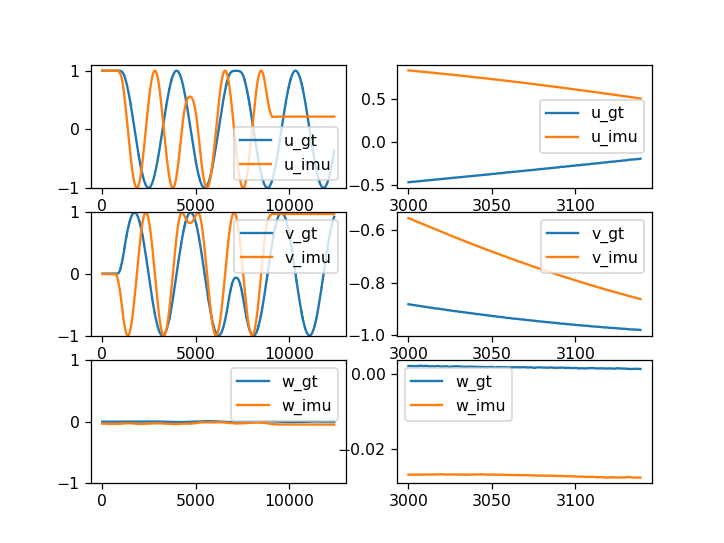

In [85]:
#Comparing Ground-Truth and IMU (Mahony) - plot
%matplotlib notebook
%matplotlib notebook

GT_q =  quaternion_GT_to_NM #quaternion_GT_pre 
IMU_q = quaternions_IMU_NM

InitialPerspectiveVector = [1.0, 0.0, 0.0] 
x0, y0, z0, u0, v0, w0 = get_arrow_q(0, GT_q, InitialPerspectiveVector)

full_frames = np.minimum(np.shape(GT_q)[0],np.shape(IMU_q)[0])
zoom_frames = (3000, 3140)

data = np.zeros((full_frames, 6))

for i in range(0, full_frames):
    x, y, z, u, v, w = get_arrow_q(i, GT_q, InitialPerspectiveVector)
    x_imu, y_imu, z_imu, u_imu, v_imu, w_imu = get_arrow_q(i, IMU_q, InitialPerspectiveVector)
    
    ##test
    #x, y, z, u, v, w = get_arrow_q(i, quaternions_IMU_pre, InitialPerspectiveVector_IMU)
    #x, y, z, u, v, w =  get_arrow_q(i, quaternions_IMU_pre_NM, InitialPerspectiveVector_IMU)
    
    #x_imu, y_imu, z_imu, u_imu, v_imu, w_imu = get_arrow_q(i, quaternions_IMU_pre_NM, InitialPerspectiveVector_IMU)
    #x_imu, y_imu, z_imu, u_imu, v_imu, w_imu = get_arrow_q(i, quaternions_IMU_pre, InitialPerspectiveVector_IMU)
    #x_imu, y_imu, z_imu, u_imu, v_imu, w_imu = get_arrow(i, ypr_data)
    ## end test
    
    data[i] = (u, v, w, u_imu, v_imu, w_imu)

fig = plt.figure()
ax = plt.subplot(321)
ax.set_ylim(-1, 1.1)
ax.plot(range(0, full_frames), data[:,[0,3]])
ax.legend(['u_gt', 'u_imu'])
ax = plt.subplot(323)
ax.set_ylim(-1, 1)
ax.plot(range(0, full_frames), data[:,[1,4]])
ax.legend(['v_gt', 'v_imu'])
ax = plt.subplot(325)
ax.set_ylim(-1, 1)
ax.plot(range(0, full_frames), data[:,[2,5]])
ax.legend(['w_gt', 'w_imu'])

ax = plt.subplot(322)
ax.plot(range(zoom_frames[0], zoom_frames[1]), data[zoom_frames[0]: zoom_frames[1],[0,3]])
ax.legend(['u_gt', 'u_imu'])
ax = plt.subplot(324)
ax.plot(range(zoom_frames[0], zoom_frames[1]), data[zoom_frames[0]: zoom_frames[1],[1,4]])
ax.legend(['v_gt', 'v_imu'])
ax = plt.subplot(326)
ax.plot(range(zoom_frames[0], zoom_frames[1]), data[zoom_frames[0]: zoom_frames[1],[2,5]])
ax.legend(['w_gt', 'w_imu'])

fig.show()

# Unwinding: TODO

In [ ]:
#Unwinding the Ground-Truth by the reverse of quaternion from IMU (Mahony)
%matplotlib notebook
%matplotlib notebook

WantToClear = 1

orientation = ypr_data

x0, y0, z0, u0, v0, w0 = get_arrow(0, orientation)
InitialPerspectiveVector = [1,0,0]

#
fig, ax = plt.subplots(subplot_kw=dict(projection="3d"))
ax.set_xlim(-1, 1)
ax.set_ylim(-1, 1)
ax.set_zlim(-1, 1)
ax.quiver(-1, 0, 0, 3, 0, 0, color='#aaaaaa',linestyle='dashed')
ax.quiver(0, -1, 0, 0,3, 0, color='#aaaaaa',linestyle='dashed')
ax.quiver(0, 0, -1, 0, 0, 3, color='#aaaaaa',linestyle='dashed')

    
def update4(num, Q, X):
    if (WantToClear):
        ax.clear()  
        ax.quiver(-1, 0, 0, 3, 0, 0, color='#aaaaaa',linestyle='dashed')
        ax.quiver(0, -1, 0, 0, 3, 0, color='#aaaaaa',linestyle='dashed')
        ax.quiver(0, 0, -1, 0, 0, 3, color='#aaaaaa',linestyle='dashed')
        ax.set_xlim(-1, 1)
        ax.set_ylim(-1, 1)
        ax.set_zlim(-1, 1) 
        x, y, z, u, v, w = get_arrow(num, orientation)
        x_u, y_u, z_u, u_u, v_u, w_u = get_arrow_unwinded(num, quaternions, [u, v, w])
    Qui = ax.quiver([x,x_u,x0], [y,y_u,y0], [z, z_u,z0], [u, u_u,u0], [v,v_u,v0], [w,w_u,w0], length=1, normalize=True, color = ['red','blue', 'green'])

Qui = ax.quiver([x0,x0], [y0,y0], [z0,z0], [u0,u0], [v0,v0], [w0,w0], length=1, normalize=True, color = ['red','green'])  
ani = FuncAnimation(fig, update4, fargs=(Qui, Qui), frames=range(0, np.shape(quaternions)[0]), interval=2, blit=True, repeat = False)
plt.show()



In [ ]:
#Unwinding the Ground-Truth by the reverse of quaternion from IMU (Mahony) - plot
InitialPerspectiveVector = [1,0,0]

full_frames = np.shape(quaternions)[0] 
zoom_frames = (500, 640)

data = np.zeros((full_frames, 6))
for i in range(0, full_frames):
    x, y, z, u, v, w = get_arrow(i, orientation)
    x_u, y_u, z_u, u_u, v_u, w_u = get_arrow_unwinded(i, quaternions, [u, v, w])
    data[i] = (u, v, w, u_u, v_u, w_u)

fig = plt.figure()
ax = plt.subplot(321)
ax.set_ylim(-1, 1.2)
ax.plot(range(0, full_frames), data[:,[0,3]])
ax.legend(['u_df', 'u_u'])
ax = plt.subplot(323)
ax.set_ylim(-1, 1)
ax.plot(range(0, full_frames), data[:,[1,4]])
ax.legend(['v_df', 'v_u'])
ax = plt.subplot(325)
ax.set_ylim(-1, 1)
ax.plot(range(0, full_frames), data[:,[2,5]])
ax.legend(['w_df', 'w_u'])

ax = plt.subplot(322)
ax.plot(range(zoom_frames[0], zoom_frames[1]), data[zoom_frames[0]: zoom_frames[1],[0,3]])
ax.legend(['u_df', 'u_u'])
ax = plt.subplot(324)
ax.plot(range(zoom_frames[0], zoom_frames[1]), data[zoom_frames[0]: zoom_frames[1],[1,4]])
ax.legend(['v_df', 'v_u'])
ax = plt.subplot(326)
ax.plot(range(zoom_frames[0], zoom_frames[1]), data[zoom_frames[0]: zoom_frames[1],[2,5]])
ax.legend(['w_df', 'w_u'])

fig.show()

## Delta time between frames

In [128]:

q = Quaternion([0.0, 0.707, 0.707, 0.0])
q1 = Quaternion(axis=[0.0, 1.0, 0.0], degrees=180)
print(q1)
#print(q2* q1 * Y)
print(q1 * q * q1.inverse)

0.000 +0.000i +1.000j +0.000k
0.000 -0.707i +0.707j -0.000k


(1130,)


<IPython.core.display.Javascript object>


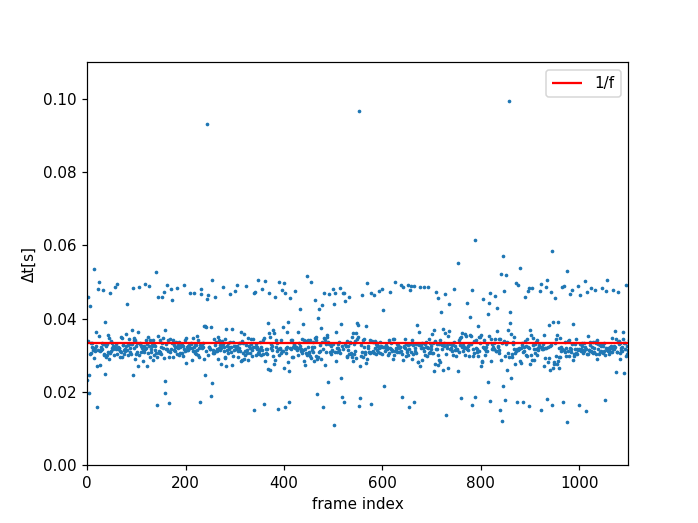

In [8]:
#Cam
f_name = '/home/kuli/Desktop/WeAreVR/Measurements/cam.txt'
data = []
with open(f_name, 'r') as f:
    for line in f:
        try:
            number = float(line.strip())
            data.append(number)
        except ValueError:
            number = 0
print(np.shape(data))
CAM_data = data[10:]
fig = plt.figure()
ax = plt.subplot(111)
ax.set_xlabel("frame index")
ax.set_ylabel("Δt[s]")
ax.set_xlim(0, 1100)
ax.set_ylim(0.0, 0.11)

ax.hlines(0.0333667, 0, 1100, "red", label = "1/f")
#ax.hlines(0.047, 0, 1100, "gray")
#ax.hlines(0.025, 0, 1100, "gray") #wrong, not HERE treshold 

ax.scatter(range(np.shape(CAM_data)[0]),CAM_data, s = 2)
ax.legend()

<IPython.core.display.Javascript object>


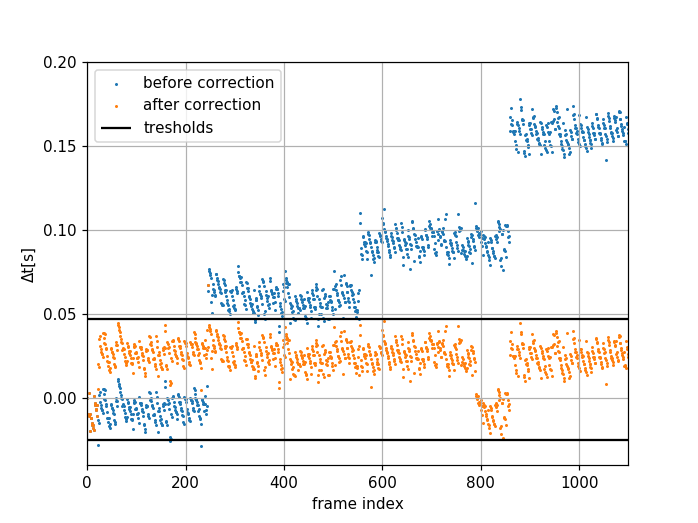

In [43]:
CAM_data = np.array(data[10:]) - 0.0333667
fig = plt.figure()
ax = plt.subplot(111)
ax.set_xlabel("frame index")
ax.set_ylabel("Δt[s]")
ax.set_xlim(0, 1100)
ax.set_ylim(-0.04, 0.20)

full_frames = np.shape(CAM_data)[0] 

accumulator1 = [0]
accumulator2 = [0]
for i in range(0, full_frames):
    accumulator1.append(accumulator1[i] + CAM_data[i]) 
    accumulator2.append(accumulator2[i] + CAM_data[i])
    if accumulator2[i+1] > 0.047: 
        accumulator2[i+1] = accumulator2[i+1] - 0.0333667
    elif accumulator2[i+1] < -0.025:
        accumulator2[i+1] = accumulator2[i+1] + 0.0333667

    
#ax.scatter(range(np.shape(CAM_data)[0]),CAM_data, s = 2)
ax.scatter(range(np.shape(accumulator1)[0]),accumulator1, s = 1, label = "before correction")
ax.scatter(range(np.shape(accumulator2)[0]),accumulator2, s = 1, label = "after correction")
ax.hlines( 0.047, 0, 1100, "black", label = "tresholds")
ax.hlines(-0.025, 0, 1100, "black") #wrong, not HERE treshold 

ax.grid(True)
ax.legend()

In [207]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
import multiprocessing
from multiprocessing import Process
from numpy import asarray
from numpy import savetxt
import time

def plot_quiver(ax, flow, spacing, margin=0, **kwargs):
    """Plots less dense quiver field.

    Args:
        ax: Matplotlib axis
        flow: motion vectors
        spacing: space (px) between each arrow in grid
        margin: width (px) of enclosing region without arrows
        kwargs: quiver kwargs (default: angles="xy", scale_units="xy")
    """
    h, w, *_ = flow.shape

    nx = int((w - 2 * margin) / spacing)
    ny = int((h - 2 * margin) / spacing)

    x = np.linspace(margin, w - margin - 1, nx, dtype=np.int64)
    y = np.linspace(margin, h - margin - 1, ny, dtype=np.int64)

    flow = flow[np.ix_(y, x)]
    u = flow[:, :, 0]
    v = flow[:, :, 1]

    kwargs = {**dict(angles="xy", scale_units="xy"), **kwargs}
    ax.quiver(x, y, u, v, **kwargs)

    ax.set_ylim(sorted(ax.get_ylim(), reverse=True))
    ax.set_aspect("equal")
    
def calcDiff(i, old_gray, frame_gray, flows, diffs):
    scale_percent = 10
    width = int(old_gray.shape[1] * scale_percent / 100)
    height = int(old_gray.shape[0] * scale_percent / 100)
    dim = (width, height)
    #frame_gray = cv2.resize(frame_gray, dim, interpolation = cv2.INTER_CUBIC)
    #old_gray = cv2.resize(old_gray, dim, interpolation = cv2.INTER_CUBIC)
 
    start = time.time()
    flow = cv2.calcOpticalFlowFarneback(np.array(old_gray), 
                                       np.array(frame_gray), 
                                       None, 0.5, 3, 25, 3, 5, 1.2, 0) #0.5, 3, 15, 3, 5, 1.2, 0

    end = time.time()
    #print(end - start)
    #flows[i] = flow
    flow = flow.reshape(-1, 2)
    flow2 = np.linalg.norm(flow, axis = 1)
            
    diffs.append( (np.average(flow2),      np.std(flow2),           np.mean(flow2),
                  np.percentile(flow2,0),  np.percentile(flow2,25), np.median(flow2),
                  np.percentile(flow2,75), np.percentile(flow2,100)) )
    if(i == 0):
        print(np.size(flow))
        print(np.size(flow2))
        print(flow)
        print(flow2)
        print(diffs)
    #diffs[i] = np.average(np.abs(flow))
    
def calcDiffBatch(startIdx, batchSize, flows, diffs):
    for i in range(startIdx, startIdx + batchSize):
        cap.set(cv2.CAP_PROP_FRAME_COUNT, i) #other prop I assume
        ret,frame = cap.read()
        if ret == False or i == videoFramesNum:
            break
        if i == startIdx: 
            old_gray = cv2.cvtColor(old_frame, cv2.COLOR_BGR2GRAY)
            continue
        frame_gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
        flow = cv2.calcOpticalFlowFarneback(np.array(old_gray), 
                                           np.array(frame_gray), 
                                           None, 0.5, 3, 25, 3, 5, 1.2, 0) #0.5, 3, 15, 3, 5, 1.2, 0
        old_gray = frame_gray
        #flows[i] = flow
        diffs[i] = np.average(np.abs(flow))
        
        print("proc" + i + "ended")

In [213]:
fname = '5rot.mkv'  #'5rot.mkv'

cap = cv2.VideoCapture('./vid/' + fname)
ret, old_frame = cap.read()
if ret == False:
    print("no such file")
old_gray = cv2.cvtColor(old_frame, cv2.COLOR_BGR2GRAY)
frame_gray = old_gray
manager = multiprocessing.Manager()
flows = manager.dict() 
diffs = [] #multiprocessing.Queue() #manager.dict() 
i = 0
# procs = []
# proc = Process(target=calcDiff, args=(i, old_gray, frame_gray, flows, diffs))  # instantiating without any argument
# procs.append(proc)
# proc.start()
# p = Process(target=calcDiff)

while(1):
    ret,frame = cap.read()
    if ret == False:
        break
    frame_gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
    calcDiff(i, old_gray, frame_gray, flows, diffs)
#     proc = Process(target=calcDiff, args=(i, old_gray, frame_gray, flows, diffs))
#     procs.append(proc)
#     proc.start()
    old_gray = frame_gray.copy()
    i = i + 1
    
# for proc in procs:
# proc.join(1)

cap.release()
# fig, ax = plt.subplots()
# plot_quiver(ax, flows[100], spacing=10, scale=1, color="#ff44ff")

2048000
1024000
[[-8.4260077e-42 -3.9337250e-41]
 [-2.5118233e-39 -1.1060526e-38]
 [-7.0140386e-38 -2.7132506e-37]
 ...
 [ 1.4297327e-14 -1.5246654e-14]
 [-1.3738161e-16 -1.5918470e-14]
 [ 6.8128710e-14 -1.7785444e-14]]
[0.0000000e+00 0.0000000e+00 0.0000000e+00 ... 2.0901531e-14 1.5919063e-14
 7.0411952e-14]
[(0.15848412, 0.28159237, 0.15848412, 0.0, 0.003049875143915415, 0.06168944, 0.198192797601223, 4.927731037139893)]


In [5]:
fname = 'Movie_008.mp4'

cap = cv2.VideoCapture('./vid/' + fname)
ret, old_frame = cap.read()
if ret == False:
    print("no such file")
manager = multiprocessing.Manager()
flows = manager.dict() 
diffs = manager.dict() 

procs = []
videoFramesNum = int(cap.get(cv2.CAP_PROP_FRAME_COUNT))
batchNumLimit = 15
batchSize = int(videoFramesNum / batchNumLimit) + 1
print(batchSize)
for i in range(batchNumLimit):
    startIdx = i * batchSize
    proc = Process(target=calcDiffBatch, args=(startIdx, batchSize, flows, diffs))
    procs.append(proc)
    proc.start()
    #take frames here,
for proc in procs:
    proc.join(60)

cap.release()
#fig, ax = plt.subplots()
#plot_quiver(ax, flows[100], spacing=10, scale=1, color="#ff44ff")


23


KeyboardInterrupt: 

In [209]:
print(diffs.qsize())
result = np.empty(diffs.qsize())
idx = 0
for idx in range(0, diffs.qsize()):
    result[idx] = diffs.get()

AttributeError: 'list' object has no attribute 'qsize'

In [217]:
print(np.size(diffs))
result = diffs

16880


In [215]:
#fname = '5rot.mkv'
data = asarray(result)
savetxt('./vdata/' + fname + '.csv', data, delimiter=',')

(1883, 8)
[[0.15848412 0.28159237 0.15848412 ... 0.06168944 0.1981928  4.92773104]
 [0.15012093 0.24710386 0.15012093 ... 0.05985829 0.18789086 3.12381697]
 [0.14620128 0.24570315 0.14620128 ... 0.06028491 0.18433437 3.3215344 ]
 ...
 [0.14049965 0.23598602 0.14049965 ... 0.05254666 0.17644124 2.82086492]
 [0.15581435 0.27145702 0.15581435 ... 0.05549043 0.18567523 3.14554048]
 [0.14562237 0.26214576 0.14562237 ... 0.05473863 0.17923408 4.83500481]]
[[1.58484116e-01 2.81592369e-01 1.58484116e-01 0.00000000e+00
  3.04987514e-03 6.16894402e-02 1.98192798e-01 4.92773104e+00]]
15064


<IPython.core.display.Javascript object>


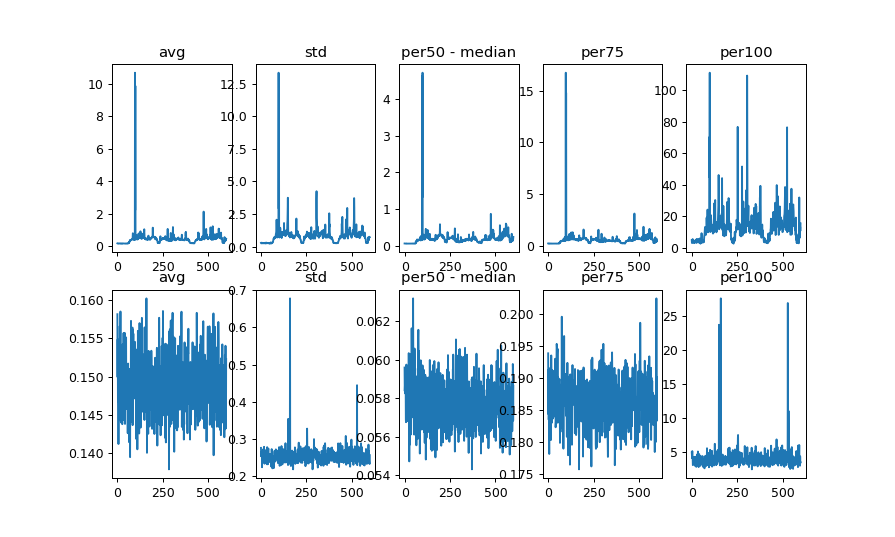

0.5726620189952395
1.0712698822318598
0.1491155292655821
0.004372794797899645


<IPython.core.display.Javascript object>


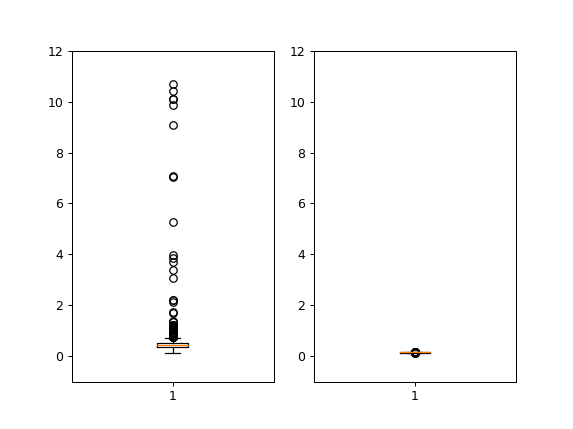

0.45560179923971494
0.14902555344005425
0.4171936959028244
0.14887194335460663


In [172]:
# load data from csv file
from numpy import loadtxt

fname = '5rot.mkv'
data = []
data = loadtxt('./vdata/'+ fname +'.csv', delimiter=',').reshape(-1,8)
data = data[data[:, 0] >= 0.05]

print(np.shape(data))

print(data)
print(data[0:1])
#
fname = 'static_5rot.mkv'
data2 = []
data2 = loadtxt('./vdata/'+ fname +'.csv', delimiter=',').reshape(-1,8)
data2 = data2[data2[:, 0] >= 0.05]

print(np.size(data))

# np.average(np.abs(flow)), np.std(np.abs(flow)), np.mean(np.abs(flow)),
#                   np.percentile(np.abs(flow),0), np.percentile(np.abs(flow),25), np.median(np.abs(flow)),
#                   np.percentile(np.abs(flow),75), np.percentile(np.abs(flow),100))
nSamples = 600
fig, ax = plt.subplots(2, 5, figsize=(10, 6))
ax = plt.subplot(251)
ax.plot(data[:nSamples, 0])
ax.set_title('avg')

ax = plt.subplot(252)
ax.plot(data[:nSamples, 1])
ax.set_title('std')

# ax = plt.subplot(263)
# ax.plot(data[:, 2])
# ax.set_title('mean')

# ax = plt.subplot(284)
# ax.plot(data[:,3])
# ax.set_title('per0')

# ax = plt.subplot(285)

# ax.plot(data[:,4])
# ax.set_title('per25')

ax = plt.subplot(253)
ax.plot(data[:nSamples,5])
ax.set_title('per50 - median')

ax = plt.subplot(254)
ax.plot(data[:nSamples,6])
ax.set_title('per75')

ax = plt.subplot(255)
ax.plot(data[:nSamples,7])
ax.set_title('per100')

#======
ax = plt.subplot(256)
ax.plot(data2[:nSamples,0])
ax.set_title('avg')

ax = plt.subplot(2,5,7)
ax.plot(data2[:nSamples,1])
ax.set_title('std')

# ax = plt.subplot(2,6,9)
# ax.plot(data2[:,2])
# ax.set_title('mean')

# ax = plt.subplot(2,8,12)
# ax.plot(data2[:,3])
# ax.set_title('per0')

# ax = plt.subplot(2,8,13)
# ax.plot(data2[:,4])
# ax.set_title('per25')

ax = plt.subplot(2,5,8)
ax.plot(data2[:nSamples,5])
ax.set_title('per50 - median')

ax = plt.subplot(2,5,9)
ax.plot(data2[:nSamples,6])
ax.set_title('per75')

ax = plt.subplot(2,5,10)
ax.plot(data2[:nSamples,7])
ax.set_title('per100')

print(np.average(data[:,0]))
print(np.std(data[:,0]))
print(np.average(data2[:,0]))
print(np.std(data2[:,0]))


# ax.plot(data2)
# ax.set_ylim(0.0, 10000000)
fig, ax = plt.subplots(1,2)
ax = plt.subplot(1,2,1)
ax.boxplot(data[:1000, 0])
ax.set_ylim(-1, 12)

ax = plt.subplot(1,2,2)
ax.boxplot(data2[:, 0])
ax.set_ylim(-1, 12)


print(np.mean(data[:600,0]))
print(np.mean(data2[:600,0]))

print(np.median(data[:600,0]))
print(np.median(data2[:600,0]))

#box plot

<IPython.core.display.Javascript object>


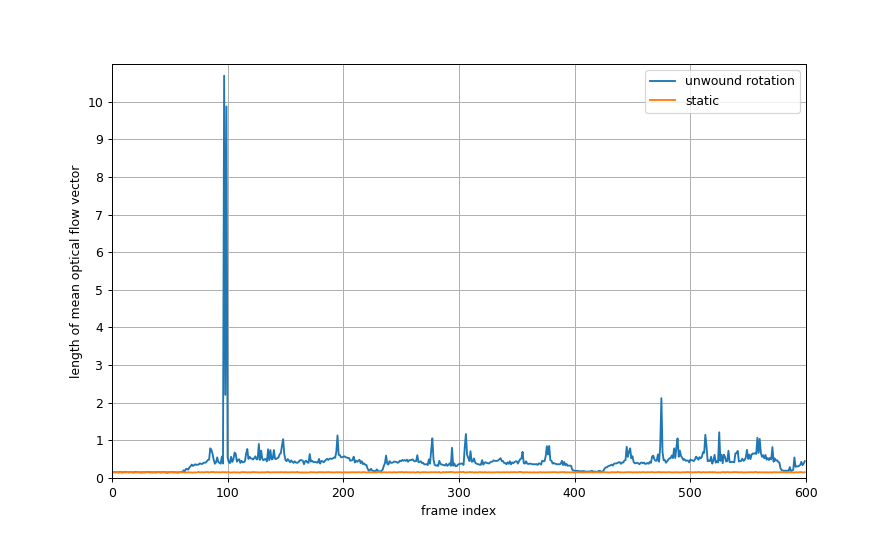

0.15360893309116364


In [200]:
nSamples = 600
fig, ax = plt.subplots(1, 1, figsize=(10, 6))
ax.plot(data[:nSamples, 0], label = "unwound rotation")
ax.plot(data2[:nSamples, 0], label = "static")
print(data2[100,0])
ax.set_xlabel("frame index")
ax.set_ylabel("length of mean optical flow vector")
ax.set_xlim(0, 600)
ax.set_ylim(0, 11)
ax.set_yticks(range(int(min(data[:nSamples, 0])), int(max(data[:nSamples, 0])) + 1))
ax.grid(True)
ax.legend()


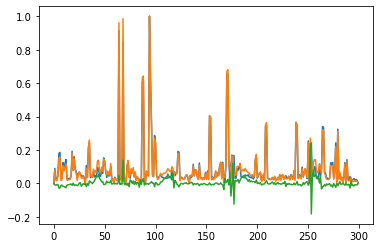

In [101]:
# load data from csv file
import numpy as np
from numpy import loadtxt

def NormalizeData(data):
    return (data - np.min(data)) / (np.max(data) - np.min(data))


#fname = 'Movie_005.mp4' 
data = loadtxt('./vdata/test.mkv.csv', delimiter=',')
data2 = loadtxt('./vdata/test_10percentquality.mkv.csv', delimiter=',')
data = NormalizeData(data)
data2 = NormalizeData(data2)

# print the array
plt.plot(data[0:300])
plt.plot(data2[0:300])

plt.plot((data2-data)[0:300])


In [10]:
#IMU Frames ananlisys
import numpy as np   
import matplotlib.pyplot as plt

column1 = []
column2 = []
column3 = []
column4 = []
input_file = "frametest4.txt"
with open(input_file, 'r') as file:
  numbers = file.readlines()

# Filter out empty lines and strip whitespace from the numbers
numbers = [number.strip() for number in numbers if number.strip()]

# Create separate arrays for each individual number in column1 and column2
column_data = np.array([float(number) for number in numbers])
column1 = column_data[::2]
column2 = column_data[1::2]

    # Print the separated numbers in columns
    #for col1, col2 in zip(column1, column2):
    #    print(f"{col1}\t{col2}")
input_file = "frametest3.txt"
with open(input_file, 'r') as file:
  numbers = file.readlines()

# Filter out empty lines and strip whitespace from the numbers
numbers = [number.strip() for number in numbers if number.strip()]

# Create separate arrays for each individual number in column1 and column2
column_data = np.array([float(number) for number in numbers])
column3 = column_data[::2]
column4 = column_data[1::2]

    # Print the separated numbers in columns
    #for col1, col2 in zip(column1, column2):
    #    print(f"{col1}\t{col2}")


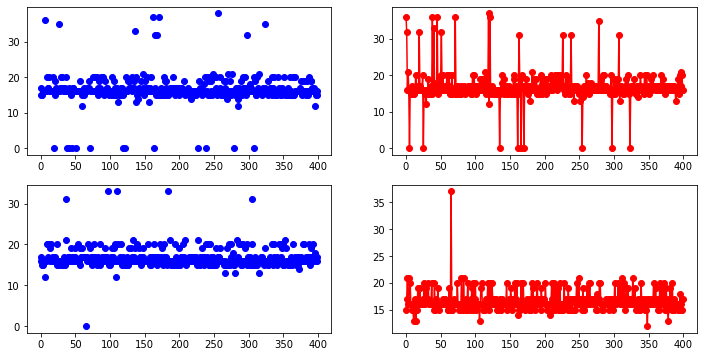

In [11]:
fig, ax = plt.subplots(2, 2, figsize=(12, 6))
ax1, ax2, ax3, ax4 = ax.flatten()
# Plot Column 1
ax1.plot(column1[0:400], marker='o', linestyle='None', color='b')
# Plot Column 2
ax2.plot(column2[0:400], marker='o', color='r')
# Plot Column 3
ax3.plot(column3[0:400], marker='o', linestyle='None', color='b')# switch to ax.scatter()
# Plot Column 4
ax4.plot(column4[0:400], marker='o', color='r')


3359


<IPython.core.display.Javascript object>


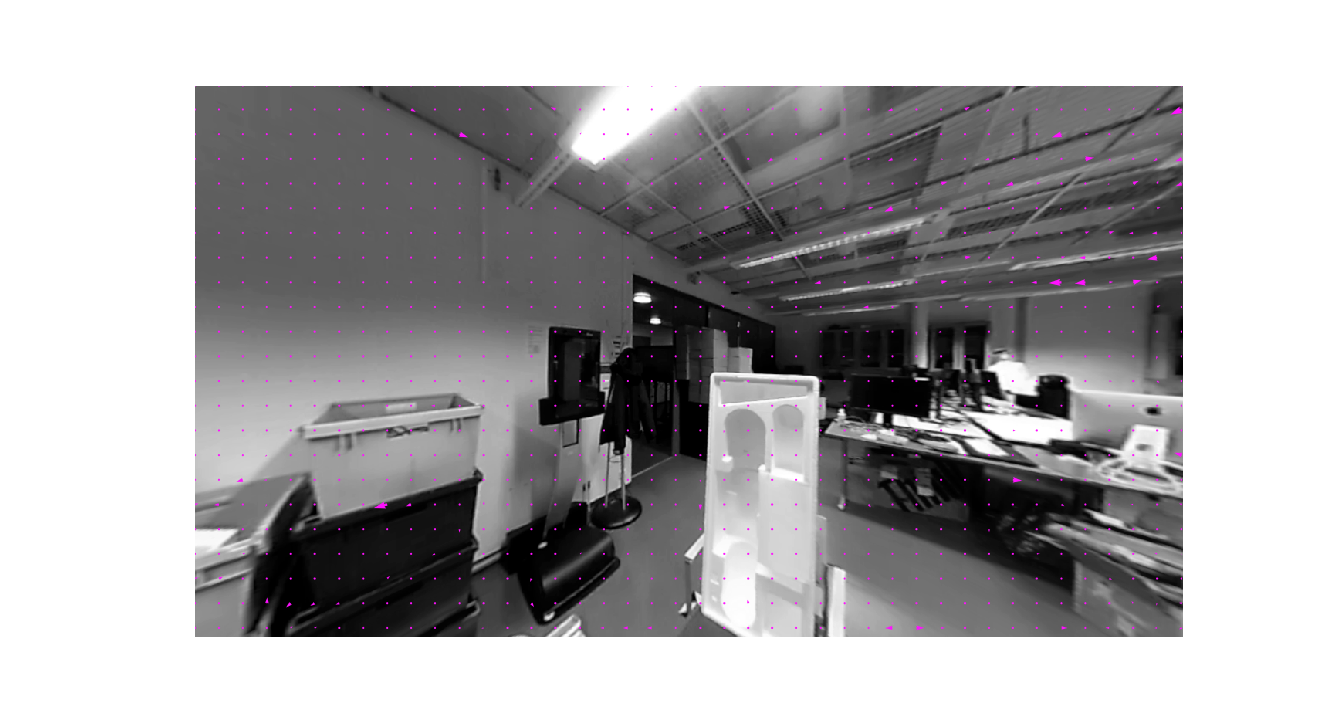

2112
0.1486847
1.0461974


In [199]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

def plot_quiver(ax, flow, spacing, margin=0, **kwargs):
    """Plots less dense quiver field.

    Args:
        ax: Matplotlib axis
        flow: motion vectors
        spacing: space (px) between each arrow in grid
        margin: width (px) of enclosing region without arrows
        kwargs: quiver kwargs (default: angles="xy", scale_units="xy")
    """
    h, w, *_ = flow.shape

    nx = int((w - 2 * margin) / spacing)
    ny = int((h - 2 * margin) / spacing)

    x = np.linspace(margin, w - margin - 1, nx, dtype=np.int64)
    y = np.linspace(margin, h - margin - 1, ny, dtype=np.int64)

    flow = flow[np.ix_(y, x)]
    u = flow[:, :, 0]
    v = flow[:, :, 1]

    kwargs = {**dict(angles="xy", scale_units="xy"), **kwargs}
    ax.quiver(x, y, u, v, **kwargs)

    ax.set_ylim(sorted(ax.get_ylim(), reverse=True))
    ax.set_aspect("equal")

def flowFromFrame(cap, frame, frameDiff):
    cap.set(cv2.CAP_PROP_POS_FRAMES, frame)
    ret, old_frame = cap.read()
    if ret == False:
        print("no such file/frame")
    cap.set(cv2.CAP_PROP_POS_FRAMES, frame + frameDiff)
    ret, frame = cap.read()

    old_gray = cv2.cvtColor(old_frame, cv2.COLOR_BGR2GRAY)
    frame_gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)

    scale_percent = 10
    width = int(old_gray.shape[1] * scale_percent / 100)
    height = int(old_gray.shape[0] * scale_percent / 100)
    dim = (width, height)
    #frame_gray = cv2.resize(frame_gray, dim, interpolation = cv2.INTER_CUBIC)
    #old_gray = cv2.resize(old_gray, dim, interpolation = cv2.INTER_CUBIC)

    flow = cv2.calcOpticalFlowFarneback(np.array(old_gray), 
                                       np.array(frame_gray), 
                                       None, 0.5, 3, 25, 3, 5, 1.2, 0) #0.5, 3, 15, 3, 5, 1.2, 0
    return flow
    
    
fname = 'static_5rot.mkv'

frameIdx = 500; 
diff = 1;
cap = cv2.VideoCapture('./vid/' + fname)
length = int(cap.get(cv2.CAP_PROP_FRAME_COUNT))
print(length)

cap.set(cv2.CAP_PROP_POS_FRAMES, frameIdx)
ret, frame = cap.read()
if ret == False:
    print("no such file/frame")
frame_gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)

flow_trans = flowFromFrame(cap, frameIdx, diff)
cap.release()

flow1 = np.average(np.linalg.norm(flow_trans.reshape(-1, 2), axis = 1))

fig = plt.figure(figsize=(15, 8))
ax = fig.add_subplot(111)
plot_quiver(ax, flow_trans, spacing = 30, scale=0.1, color="#ff11ff")
ax.imshow(cv2.cvtColor(frame_gray, cv2.COLOR_BGR2RGB))
ax.axis('off')
# ax.set_ylim(715, 0)

#------------
fname = '5rot.mkv'

frameIdx = 500; 
diff = 1;
cap = cv2.VideoCapture('./vid/' + fname)
length = int(cap.get(cv2.CAP_PROP_FRAME_COUNT))
print(length)

cap.set(cv2.CAP_PROP_POS_FRAMES, frameIdx)
ret, frame = cap.read()
if ret == False:
    print("no such file/frame")
old_gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
flow_rot = flowFromFrame(cap, frameIdx, diff)
cap.release()

flow2 = np.average(np.linalg.norm(flow_rot.reshape(-1, 2), axis = 1))

# fig = plt.figure(figsize=(15, 8))
# ax = fig.add_subplot(111)
# plot_quiver(ax, flow_rot, spacing = 30, scale=0.1, color="#ff11ff")
# ax.imshow(cv2.cvtColor(old_gray, cv2.COLOR_BGR2RGB))
# ax.axis('off')
ax.set_ylim(715, 0)


print(flow1)
print(flow2)

317
6171871


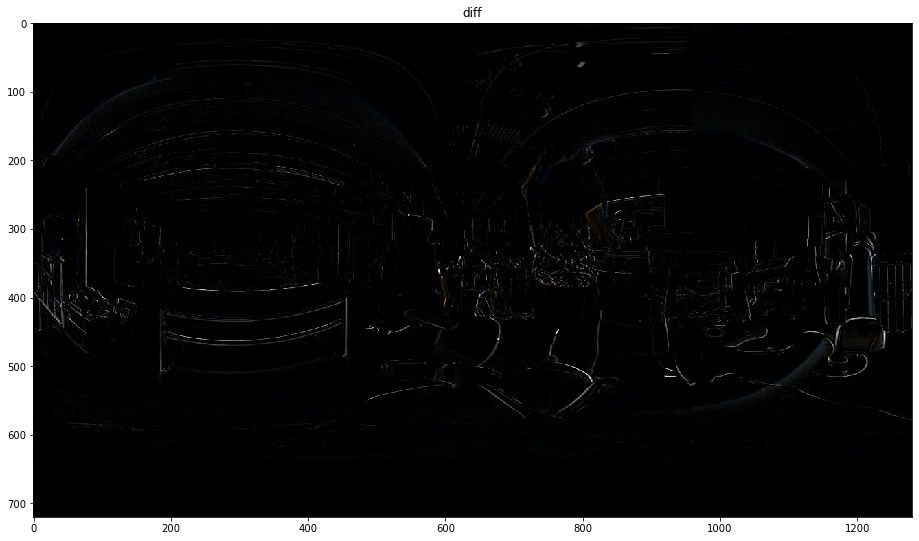

In [19]:

def diffFromFrame(cap, frame, frameDiff):
    cap.set(cv2.CAP_PROP_POS_FRAMES, frame)
    ret, old_frame = cap.read()
    if ret == False:
        print("no such file/frame")
    cap.set(cv2.CAP_PROP_POS_FRAMES, frame + frameDiff)
    ret, frame = cap.read()

#     old_gray = cv2.cvtColor(old_frame, cv2.COLOR_BGR2GRAY)
#     frame_gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
    diff = cv2.subtract(old_frame, frame)
    return diff;    
    
fname = 'trans.mkv'

frameIdx = 60; 
diffIdx = 2;
cap = cv2.VideoCapture('./vid/' + fname)
length = int(cap.get(cv2.CAP_PROP_FRAME_COUNT))
print(length)

diff_frame = diffFromFrame(cap, frameIdx, diffIdx)
cap.release()

fig = plt.figure(figsize=(20, 20))
ax = fig.add_subplot(211)
ax.imshow(cv2.cvtColor(diff_frame, cv2.COLOR_BGR2RGB))
ax.set_title('diff')
print(np.sum(diff_frame))

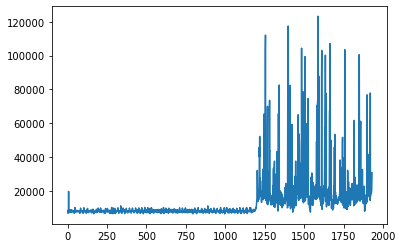

In [24]:
from numpy import loadtxt
data = []
fname = 'stableCam.txt' 
data = loadtxt(fname, delimiter=',')
# print the array
plt.plot(data)

In [120]:
import cv2
from matplotlib import pyplot as plt

# Connect to webcam
#cap.release()
#cv2.destroyAllWindows()
source = 2
cap = cv2.VideoCapture(source)
if cap is None or not cap.isOpened():
       print('Warning: unable to open video source: ', source)

fig = plt.figure(figsize=(30, 30))
# Loop through every frame until we close our webcam
while cap.isOpened(): 
    ret, frame = cap.read()
    
    # Show image 
    fig.imshow(frame)
    fig.show()
    # Checks whether q has been hit and stops the loop
    if cv2.waitKey(1) & 0xFF == ord('q'): 
        break

# Releases the webcam
cap.release()
# Closes the frame
cv2.destroyAllWindows()

KeyboardInterrupt: 

In [111]:
# Releases the webcam
cap.release()
# Closes the frame
cv2.destroyAllWindows()

# IMU

In [109]:
import numpy as np
import csv
import re
from ahrs.ahrs.filters import Mahony

from matplotlib.ticker import AutoMinorLocator, MultipleLocator

%matplotlib notebook
%matplotlib notebook

import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.animation import FuncAnimation
from pyquaternion import Quaternion
from scipy.signal import resample

In [111]:
#Data gathering
f_name = '/home/kuli/Desktop/WeAreVR/Jupyter/imuTestData/calibration/acc_stat3_2.csv' 

with open(f_name , 'r') as f:
    print("File open")
    # Use the csv library to read the file and parse it into a list of lists
    csv_reader = csv.reader(f, delimiter=';')
    data = []
    row = next(csv_reader)  # Read the first row
    
    # Skip the sensor data list
    for i in range(0,13):
        row = next(csv_reader)
    
    while row:  # Continue reading until a blank row is encountered
        data.append(row)  # Append the row to the data list
        try:
            row = next(csv_reader)  # Read the next row
        except StopIteration:  # Stop reading if there are no more rows
            break

print(data[0])
#data = np.array(data).astype(float)
print(np.shape(data)) # 1: (29923, 10)
IMU_data = data

File open
['1694422905785', ' 0.986816', ' 0.068848', ' -0.004883', ' 0.000000', ' -0.002131', ' 0.000000', ' -1293', ' 405', ' 32']
(28796, 10)


(28796, 10)
57624.0
0.49972233791475773


<IPython.core.display.Javascript object>


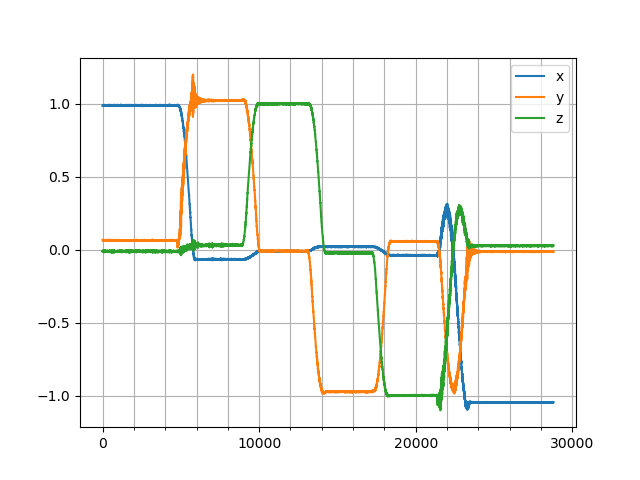

In [112]:
#convert to float
data = np.array(data).astype(float)

#re-sampling:
#data = resample(data, num = np.shape(quaternion_GT_to_NM)[0])
print(np.shape(data))

#frequency count
IMU_total_time = float(data[-1][0]) - float(data[0][0])
IMU_avg_freq = int(np.shape(data)[0]) / IMU_total_time 
print(IMU_total_time)
print(IMU_avg_freq)
acc_columns = [1,2,3]
gyro_columns = [4,5,6]
mag_columns = [7,8,9]
ypr_columns = [10,11,12]
acc_data = data[:, acc_columns]
gyro_data = data[:, gyro_columns]
mag_data = data[:, mag_columns]
#ypr_data = data[:, ypr_columns]
#plt.plot(data[:,0])

fig, ax = plt.subplots()
ax = plt.subplot(111)
ax.plot(acc_data[:,:])
ax.legend(['x', 'y', 'z'])
ax.grid(True)
ax.xaxis.set_major_locator(MultipleLocator(10000))
ax.xaxis.set_minor_locator(AutoMinorLocator())

ax.xaxis.grid(True, which='minor')
fig.show()

In [114]:
#M
new_acc = np.concatenate((acc_data[2000:4000], acc_data[6500:8500], acc_data[11000:13000], acc_data[15000:17000], acc_data[19000:21000], acc_data[26000:28000], acc_data[49000:54000]))
# Define your input matrix (nx3)
input_matrix = new_acc 
n = input_matrix.shape[0]

# Initialize an empty output matrix (nx12)
output_matrix = np.zeros((3*n, 12))

# Fill the output matrix with values from the input matrix
for i in range(n):
    for j in range(3):
        output_matrix[3*i+j, 4*j:4*j+3] = input_matrix[i]
        output_matrix[3*i+j, 4*j+3] = 1
print(output_matrix)
M = output_matrix
print(np.shape(M))

[[ 0.989746  0.067871 -0.005371 ...  0.        0.        0.      ]
 [ 0.        0.        0.       ...  0.        0.        0.      ]
 [ 0.        0.        0.       ...  0.067871 -0.005371  1.      ]
 ...
 [-1.04248  -0.012695  0.027832 ...  0.        0.        0.      ]
 [ 0.        0.        0.       ...  0.        0.        0.      ]
 [ 0.        0.        0.       ... -0.012695  0.027832  1.      ]]
(36000, 12)


In [115]:
#s 
array_xp = np.zeros((6000), dtype=float)
array_xp[0::3] = 1.0
array_xm = np.zeros((6000), dtype=float)
array_xm[1::3] = 1.0
array_yp = np.zeros((6000), dtype=float)
array_yp[2::3] = 1.0
array_ym = np.zeros((6000), dtype=float)
array_ym[1::3] = -1.0
array_zp = np.zeros((6000), dtype=float)
array_zp[2::3] = -1.0
array_zm = np.zeros((6000), dtype=float)
array_zm[0::3] = -1.0

s = np.concatenate((array_xp, array_xm, array_yp, array_ym, array_zp, array_zm)).reshape(36000, 1)
print(s)
print(np.shape(s))

[[ 1.]
 [ 0.]
 [ 0.]
 ...
 [-1.]
 [ 0.]
 [ 0.]]
(36000, 1)


In [116]:
out = np.matmul(np.matmul(np.linalg.inv(np.matmul(M.T, M)), M.T), s)
np.set_printoptions(suppress=True)
print(out)

[[ 0.9813075 ]
 [ 0.04244318]
 [-0.01216444]
 [ 0.02206801]
 [-0.03717048]
 [ 0.99962564]
 [ 0.03350584]
 [-0.02715399]
 [ 0.01926684]
 [-0.02555855]
 [ 1.00015883]
 [-0.00464662]]


### GYRO

In [122]:
#Data gathering
f_name = '/home/kuli/Desktop/WeAreVR/Jupyter/imuTestData/calibration/gyro_2.csv'

with open(f_name , 'r') as f:
    print("File open")
    # Use the csv library to read the file and parse it into a list of lists
    csv_reader = csv.reader(f, delimiter=';')
    data = []
    row = next(csv_reader)  # Read the first row
    
    # Skip the sensor data list
    for i in range(0,13):
        row = next(csv_reader)
    
    while row:  # Continue reading until a blank row is encountered
        data.append(row)  # Append the row to the data list
        try:
            row = next(csv_reader)  # Read the next row
        except StopIteration:  # Stop reading if there are no more rows
            break

print(data[0])
#data = np.array(data).astype(float)
print(np.shape(data))
IMU_data = data

File open
['1694423211885', ' -0.034668', ' 0.059082', ' -0.995605', ' 0.001065', ' -0.001065', ' 0.000000', ' -178', ' 540', ' 951']
(58533, 10)


(58533, 10)
117074.0
0.4999658335753455
gyro_data:
[[ 0.001065 -0.001065  0.      ]
 [ 0.001065 -0.002131  0.001065]
 [ 0.001065 -0.002131  0.001065]
 ...
 [ 0.001065 -0.023436 -0.001065]
 [ 0.001065 -0.028762  0.001065]
 [ 0.001065 -0.028762  0.001065]]


<IPython.core.display.Javascript object>


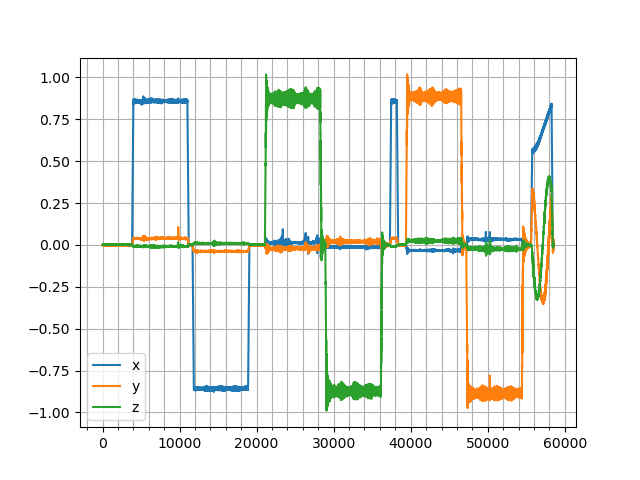

In [123]:


#convert to float
data = np.array(data).astype(float)

#re-sampling:
#data = resample(data, num = np.shape(quaternion_GT_to_NM)[0])
print(np.shape(data))

#frequency count
IMU_total_time = float(data[-1][0]) - float(data[0][0])
IMU_avg_freq = int(np.shape(data)[0]) / IMU_total_time 
print(IMU_total_time)
print(IMU_avg_freq)
acc_columns = [1,2,3]
gyro_columns = [4,5,6]
mag_columns = [7,8,9]
ypr_columns = [10,11,12]
acc_data = data[:, acc_columns]
gyro_data = data[:, gyro_columns]
mag_data = data[:, mag_columns]
#ypr_data = data[:, ypr_columns]
#plt.plot(data[:,0])

print("gyro_data:")
print(gyro_data)
fig, ax = plt.subplots()
ax = plt.subplot(111)

ax.plot(gyro_data[:,:])

ax.legend(['x', 'y', 'z'])
ax.grid(True)
ax.xaxis.set_major_locator(MultipleLocator(10000))
ax.xaxis.set_minor_locator(AutoMinorLocator())

ax.xaxis.grid(True, which='minor')
fig.show()



In [124]:
#M
new_gyro = np.concatenate((gyro_data[0:4000], gyro_data[6000:11000], gyro_data[14000:19000], gyro_data[23000:28000], gyro_data[31000:36000], gyro_data[42000:47000], gyro_data[49000:54000]))
# Define your input matrix (nx3)
input_matrix = new_gyro 
n = input_matrix.shape[0]

# Initialize an empty output matrix (nx12)
output_matrix = np.zeros((3*n, 12))

# Fill the output matrix with values from the input matrix
for i in range(n):
    for j in range(3):
        output_matrix[3*i+j, 4*j:4*j+3] = input_matrix[i]
        output_matrix[3*i+j, 4*j+3] = 1
print(output_matrix)
M = output_matrix
print(np.shape(M))

[[ 0.001065 -0.001065  0.       ...  0.        0.        0.      ]
 [ 0.        0.        0.       ...  0.        0.        0.      ]
 [ 0.        0.        0.       ... -0.001065  0.        1.      ]
 ...
 [ 0.031958 -0.898018 -0.025566 ...  0.        0.        0.      ]
 [ 0.        0.        0.       ...  0.        0.        0.      ]
 [ 0.        0.        0.       ... -0.898018 -0.025566  1.      ]]
(102000, 12)


In [125]:
#s 
array0 = np.zeros((12000), dtype=float)
array_xp = np.zeros((15000), dtype=float)
array_xp[0::3] = 0.872665
array_xm = np.zeros((15000), dtype=float)
array_xm[0::3] = -0.872665
array_yp = np.zeros((15000), dtype=float)
array_yp[2::3] = 0.872665
array_ym = np.zeros((15000), dtype=float)
array_ym[2::3] = -0.872665
array_zp = np.zeros((15000), dtype=float)
array_zp[1::3] = 0.872665
array_zm = np.zeros((15000), dtype=float)
array_zm[1::3] = -0.872665

s = np.concatenate((array0, array_xp, array_xm, array_yp, array_ym, array_zp, array_zm)).reshape(102000, 1)
print(s)
print(np.shape(s))

[[ 0.      ]
 [ 0.      ]
 [ 0.      ]
 ...
 [ 0.      ]
 [-0.872665]
 [ 0.      ]]
(102000, 1)


In [126]:
out = np.matmul(np.matmul(np.linalg.inv(np.matmul(M.T, M)), M.T), s)
np.set_printoptions(suppress=True)
print(out)

[[ 1.01058705]
 [ 0.0379745 ]
 [-0.01416165]
 [-0.00308075]
 [-0.04473507]
 [ 0.98536418]
 [ 0.02325682]
 [ 0.00979748]
 [ 0.01174236]
 [-0.02686885]
 [ 0.99883812]
 [-0.00001606]]


In [87]:
gyro_q = np.array([0.003196, -0.005326, 0.0]).reshape(3,1)
a = np.array([[1.01284611, 0.0202367, 0.00203724], [-0.02300336, 0.98376085, -0.01937286], [-0.00339458, 0.01617729, 0.99807192]])
b = np.array([-0.00249166, 0.00553142, -0.00051446]).reshape(3,1)
gyro_out = np.matmul(a, gyro_q) + b
print(gyro_out)

[[ 0.00063762]
 [ 0.00021839]
 [-0.00061147]]


## Results

In [567]:
import csv
import numpy as np
from pyquaternion import Quaternion

# Create an empty list to store quaternions
quaternions = []

# Open the CSV file for reading
with open('/home/kuli/Desktop/WeAreVR/Jupyter/imuTestData/qRobot3.csv', 'r') as csvfile:
    # Create a CSV reader
    csvreader = csv.reader(csvfile)
    
    # Skip the header row if it exists
    next(csvreader, None)
    
    # Read quaternions from the file
    for row in csvreader:
        if len(row) == 4:
            # Convert the values to floats and store as a list
            quaternion = [float(value) for value in row][0:]
            x = Quaternion(quaternion[3],quaternion[1],quaternion[2],-quaternion[0])
            #corr = Quaternion(1.0, 0.0, 0.0, 0.0) 
#             corr = Quaternion(0.71, 0.0, 0.0, -0.71) 
            corr = Quaternion(0.71, -0.71, 0.0, 0.0) 
            
            quaternions.append(corr * x)

# Convert the list of quaternions to a NumPy array
quatRobot = np.array(quaternions)
print(quatRobot)

# Create an empty list to store quaternions
quaternions = []

# Open the CSV file for reading
with open('/home/kuli/Desktop/WeAreVR/Jupyter/imuTestData/qIMU3.csv', 'r') as csvfile:
    # Create a CSV reader
    csvreader = csv.reader(csvfile)
    
    # Skip the header row if it exists
    next(csvreader, None)
    
    # Read quaternions from the file
    for row in csvreader:
        if len(row) == 4:
            # Convert the values to floats and store as a list
            quaternion = [float(value) for value in row][0:]
            x = Quaternion(quaternion[3],quaternion[1],-quaternion[0],-quaternion[2]) #quaternion(w,x,y,z)
            #corr2 = Quaternion(0.71, 0.0, 0.0, 0.71) 
            corr2 = Quaternion(1.0, 0.0, 0.0, 0.0) 
            
            quaternions.append(corr2 * x)

# Convert the list of quaternions to a NumPy array
quatIMU = np.array(quaternions)
print(quatIMU)

[Quaternion(0.7239372999999999, -0.6957502999999999, 7.100000000000335e-06, 0.0072349)
 Quaternion(0.7238946999999999, -0.6957928999999999, 0.0005182999999999993, 0.007533099999999999)
 Quaternion(0.7238024, -0.695871, 0.0011218, 0.0081508) ...
 Quaternion(0.6990447000000001, -0.7207707, 0.0038339999999999997, 0.0027548)
 Quaternion(0.6990447000000001, -0.7207707, 0.0038553, 0.0026909000000000004)
 Quaternion(0.6990447000000001, -0.7207707, 0.0038623999999999998, 0.0026696)]
[Quaternion(0.69879, -0.71533, -0.00051, 8e-05)
 Quaternion(0.69879, -0.71533, -0.00049, 7e-05)
 Quaternion(0.69876, -0.71535, -0.00052, 0.0001) ...
 Quaternion(0.69878, -0.71534, -0.00052, 0.00012)
 Quaternion(0.69879, -0.71533, -0.00051, 0.00012)
 Quaternion(0.69879, -0.71532, -0.00052, 0.00012)]


0.724 -0.696i +0.000j +0.007k


<IPython.core.display.Javascript object>


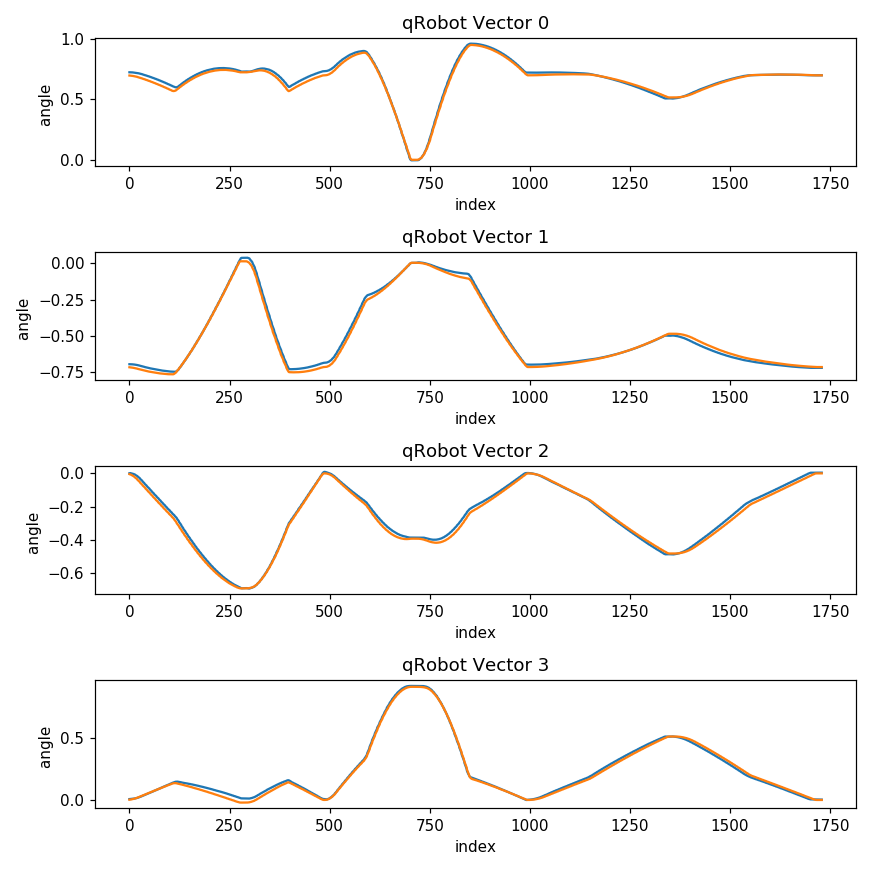

In [568]:
#Comparing Ground-Truth and IMU orientation vectors - plot

import matplotlib.pyplot as plt
from scipy.spatial.transform import Rotation

%matplotlib notebook
%matplotlib notebook
offset1 = 0 #8
qRobot =  quatRobot[offset1:1730+offset1]

offset2 = 67 #8
qIMU = quatIMU[offset2:1730+offset2]
print(qRobot[:][0])


fig, axes = plt.subplots(4, 1, figsize=(8, 8))
for i in range(4):
    ax = axes[i]
    ax.plot([q[i] for q in qRobot]) #2: 1000:
    #ax.set_title(f"qRobot Vector {i}")
    ax.set_xlabel("index")
    ax.set_ylabel("angle ")
for i in range(4):
    ax = axes[i]
    ax.plot([q[i] for q in qIMU]) #2: 1000:
    ax.set_title(f"qRobot Vector {i}")
    
plt.tight_layout()
fig.show()

In [527]:
tool0_quaternions = []
imu_quaternions = []

with open('/home/kuli/Desktop/WeAreVR/Jupyter/imuTestData/IMUtool0.csv', 'r') as csvfile:
    csvreader = csv.reader(csvfile)
    
    for row in csvreader:
        if len(row) == 5:  # Assuming each row has 5 values including the identifier
            identifier = row[0].strip()
            quaternion_values = [float(val) for val in row[1:]]
            quaternion = Quaternion(quaternion_values[3], quaternion_values[1], quaternion_values[2], quaternion_values[0])
            
            # Define the correction quaternions
            corr = Quaternion(1.0, 0.0, 0.0, 0.0)
            corr2 = Quaternion(0.0, 0.0,1.0, 0.0)  # Define corr2 if needed
            corr2 = corr2 * Quaternion( 0.71,0.0,0.71,  0.0)
            corr = corr * Quaternion( 0.71,0.0,0.71,  0.0)
             
            if identifier == 'tool0':
                print(f"Identifier: {identifier}, Quaternion: {corr * quaternion}")  # Check identifier and quaternion
                tool0_quaternions.append(corr * quaternion)  # Apply the correction to tool0 quaternion
            elif identifier == 'IMU':
                print(f"Identifier: {identifier}, Quaternion: {corr2 * quaternion}")  # Check identifier and quaternion
                imu_quaternions.append(corr2 * quaternion)  # Apply the correction to IMU quaternion

# Print or use the separated quaternions for 'tool0' and 'IMU'
print("Tool0 Quaternions:")
for tool0_quaternion in tool0_quaternions:
    print(tool0_quaternion)

print("\nIMU Quaternions:")
for imu_quaternion in imu_quaternions:
    print(imu_quaternion)

Identifier: tool0, Quaternion: +0.000 +0.000i +1.004j +0.000k
Identifier: IMU, Quaternion: +0.022 -0.004i +1.004j -0.012k
Identifier: tool0, Quaternion: +0.000 +0.000i +1.004j +0.000k
Identifier: IMU, Quaternion: +0.021 -0.004i +1.004j -0.012k
Identifier: tool0, Quaternion: +0.000 +0.000i +1.004j +0.000k
Identifier: IMU, Quaternion: +0.021 -0.004i +1.004j -0.012k
Identifier: tool0, Quaternion: +0.000 +0.000i +1.004j +0.000k
Identifier: IMU, Quaternion: +0.021 -0.004i +1.004j -0.012k
Identifier: tool0, Quaternion: +0.000 +0.000i +1.004j +0.000k
Identifier: IMU, Quaternion: +0.021 -0.004i +1.004j -0.012k
Identifier: tool0, Quaternion: +0.000 +0.000i +1.004j +0.000k
Identifier: IMU, Quaternion: +0.021 -0.004i +1.004j -0.012k
Identifier: tool0, Quaternion: +0.000 +0.000i +1.004j +0.000k
Identifier: IMU, Quaternion: +0.021 -0.004i +1.004j -0.012k
Identifier: tool0, Quaternion: +0.000 +0.000i +1.004j +0.000k
Identifier: IMU, Quaternion: +0.021 -0.004i +1.004j -0.012k
Identifier: tool0, Quate

Identifier: IMU, Quaternion: +0.013 -0.001i +1.004j +0.007k
Identifier: tool0, Quaternion: +0.000 +0.000i +1.004j +0.025k
Identifier: IMU, Quaternion: +0.013 -0.001i +1.004j +0.009k
Identifier: tool0, Quaternion: +0.000 +0.000i +1.004j +0.029k
Identifier: IMU, Quaternion: +0.013 -0.000i +1.004j +0.015k
Identifier: tool0, Quaternion: +0.000 +0.000i +1.004j +0.032k
Identifier: IMU, Quaternion: +0.013 -0.000i +1.004j +0.016k
Identifier: tool0, Quaternion: +0.000 +0.000i +1.003j +0.037k
Identifier: IMU, Quaternion: +0.013 -0.000i +1.004j +0.023k
Identifier: tool0, Quaternion: +0.000 +0.000i +1.003j +0.041k
Identifier: IMU, Quaternion: +0.012 +0.000i +1.004j +0.026k
Identifier: tool0, Quaternion: +0.000 +0.000i +1.003j +0.047k
Identifier: IMU, Quaternion: +0.012 +0.000i +1.004j +0.027k
Identifier: tool0, Quaternion: +0.000 +0.000i +1.003j +0.049k
Identifier: IMU, Quaternion: +0.012 -0.000i +1.003j +0.036k
Identifier: tool0, Quaternion: +0.000 +0.000i +1.003j +0.054k
Identifier: IMU, Quatern

Identifier: tool0, Quaternion: +0.000 -0.000i +0.233j -0.977k
Identifier: IMU, Quaternion: +0.000 +0.009i -0.206j +0.983k
Identifier: tool0, Quaternion: +0.000 -0.000i +0.239j -0.975k
Identifier: IMU, Quaternion: +0.000 +0.009i -0.209j +0.982k
Identifier: tool0, Quaternion: +0.000 -0.000i +0.243j -0.974k
Identifier: IMU, Quaternion: +0.000 +0.009i -0.215j +0.981k
Identifier: tool0, Quaternion: +0.000 -0.000i +0.247j -0.973k
Identifier: IMU, Quaternion: -0.000 +0.009i -0.219j +0.980k
Identifier: tool0, Quaternion: +0.000 -0.000i +0.252j -0.972k
Identifier: IMU, Quaternion: -0.000 +0.009i -0.221j +0.979k
Identifier: tool0, Quaternion: +0.000 -0.000i +0.256j -0.971k
Identifier: IMU, Quaternion: -0.000 +0.009i -0.226j +0.978k
Identifier: tool0, Quaternion: +0.000 -0.000i +0.258j -0.970k
Identifier: IMU, Quaternion: -0.000 +0.009i -0.231j +0.977k
Identifier: tool0, Quaternion: +0.000 -0.000i +0.263j -0.969k
Identifier: IMU, Quaternion: -0.000 +0.009i -0.235j +0.976k
Identifier: tool0, Quate

Identifier: IMU, Quaternion: +0.088 +0.047i -0.995j -0.089k
Identifier: tool0, Quaternion: -0.102 -0.052i +0.989j +0.132k
Identifier: IMU, Quaternion: +0.090 +0.049i -0.995j -0.092k
Identifier: tool0, Quaternion: -0.105 -0.054i +0.988j +0.135k
Identifier: IMU, Quaternion: +0.094 +0.050i -0.994j -0.097k
Identifier: tool0, Quaternion: -0.108 -0.055i +0.987j +0.140k
Identifier: IMU, Quaternion: +0.096 +0.051i -0.993j -0.099k
Identifier: tool0, Quaternion: -0.111 -0.057i +0.986j +0.143k
Identifier: IMU, Quaternion: +0.099 +0.053i -0.992j -0.104k
Identifier: tool0, Quaternion: -0.112 -0.058i +0.986j +0.145k
Identifier: IMU, Quaternion: +0.102 +0.054i -0.992j -0.107k
Identifier: tool0, Quaternion: -0.115 -0.059i +0.985j +0.148k
Identifier: IMU, Quaternion: +0.103 +0.054i -0.991j -0.109k
Identifier: tool0, Quaternion: -0.118 -0.061i +0.983j +0.153k
Identifier: IMU, Quaternion: +0.107 +0.056i -0.990j -0.114k
Identifier: tool0, Quaternion: -0.121 -0.062i +0.982j +0.157k
Identifier: IMU, Quatern

Identifier: IMU, Quaternion: +0.399 +0.473i -0.631j -0.478k
Identifier: tool0, Quaternion: -0.380 -0.509i +0.599j +0.497k
Identifier: IMU, Quaternion: +0.398 +0.474i -0.630j -0.477k
Identifier: tool0, Quaternion: -0.379 -0.510i +0.598j +0.497k
Identifier: IMU, Quaternion: +0.398 +0.475i -0.629j -0.477k
Identifier: tool0, Quaternion: -0.379 -0.511i +0.598j +0.496k
Identifier: IMU, Quaternion: +0.398 +0.476i -0.629j -0.477k
Identifier: tool0, Quaternion: -0.379 -0.512i +0.597j +0.496k
Identifier: IMU, Quaternion: +0.398 +0.477i -0.629j -0.476k
Identifier: tool0, Quaternion: -0.379 -0.513i +0.597j +0.496k
Identifier: IMU, Quaternion: +0.398 +0.478i -0.628j -0.476k
Identifier: tool0, Quaternion: -0.378 -0.513i +0.597j +0.496k
Identifier: IMU, Quaternion: +0.398 +0.479i -0.628j -0.476k
Identifier: tool0, Quaternion: -0.378 -0.514i +0.596j +0.495k
Identifier: IMU, Quaternion: +0.398 +0.480i -0.627j -0.476k
Identifier: tool0, Quaternion: -0.378 -0.515i +0.596j +0.495k
Identifier: IMU, Quatern

Identifier: tool0, Quaternion: -0.411 -0.375i +0.643j +0.534k
Identifier: IMU, Quaternion: +0.424 +0.337i -0.681j -0.501k
Identifier: tool0, Quaternion: -0.411 -0.374i +0.644j +0.534k
Identifier: IMU, Quaternion: +0.424 +0.336i -0.682j -0.501k
Identifier: tool0, Quaternion: -0.411 -0.373i +0.644j +0.534k
Identifier: IMU, Quaternion: +0.424 +0.334i -0.682j -0.501k
Identifier: tool0, Quaternion: -0.412 -0.371i +0.644j +0.535k
Identifier: IMU, Quaternion: +0.424 +0.333i -0.682j -0.502k
Identifier: tool0, Quaternion: -0.412 -0.370i +0.645j +0.535k
Identifier: IMU, Quaternion: +0.424 +0.332i -0.683j -0.502k
Identifier: tool0, Quaternion: -0.412 -0.369i +0.645j +0.535k
Identifier: IMU, Quaternion: +0.424 +0.330i -0.683j -0.502k
Identifier: tool0, Quaternion: -0.412 -0.367i +0.645j +0.535k
Identifier: IMU, Quaternion: +0.424 +0.329i -0.684j -0.502k
Identifier: tool0, Quaternion: -0.413 -0.366i +0.646j +0.536k
Identifier: IMU, Quaternion: +0.425 +0.326i -0.684j -0.503k
Identifier: tool0, Quate

Identifier: IMU, Quaternion: +0.500 -0.559i -0.313j -0.590k
Identifier: tool0, Quaternion: +0.558 -0.512i -0.253j -0.609k
Identifier: IMU, Quaternion: +0.501 -0.563i -0.302j -0.591k
Identifier: tool0, Quaternion: +0.559 -0.514i -0.246j -0.609k
Identifier: IMU, Quaternion: +0.501 -0.564i -0.300j -0.591k
Identifier: tool0, Quaternion: +0.559 -0.516i -0.240j -0.610k
Identifier: IMU, Quaternion: +0.501 -0.565i -0.293j -0.593k
Identifier: tool0, Quaternion: +0.559 -0.517i -0.235j -0.611k
Identifier: IMU, Quaternion: +0.501 -0.566i -0.288j -0.594k
Identifier: tool0, Quaternion: +0.560 -0.518i -0.229j -0.611k
Identifier: IMU, Quaternion: +0.502 -0.567i -0.286j -0.594k
Identifier: tool0, Quaternion: +0.560 -0.519i -0.226j -0.612k
Identifier: IMU, Quaternion: +0.502 -0.569i -0.277j -0.596k
Identifier: tool0, Quaternion: +0.560 -0.521i -0.219j -0.613k
Identifier: IMU, Quaternion: +0.502 -0.570i -0.273j -0.597k
Identifier: tool0, Quaternion: +0.560 -0.522i -0.214j -0.613k
Identifier: IMU, Quatern

Identifier: IMU, Quaternion: +0.482 -0.624i +0.107j -0.613k
Identifier: tool0, Quaternion: +0.538 -0.573i +0.146j -0.608k
Identifier: IMU, Quaternion: +0.482 -0.624i +0.104j -0.613k
Identifier: tool0, Quaternion: +0.538 -0.573i +0.143j -0.608k
Identifier: IMU, Quaternion: +0.483 -0.623i +0.097j -0.614k
Identifier: tool0, Quaternion: +0.539 -0.573i +0.138j -0.609k
Identifier: IMU, Quaternion: +0.484 -0.623i +0.092j -0.614k
Identifier: tool0, Quaternion: +0.539 -0.573i +0.136j -0.609k
Identifier: IMU, Quaternion: +0.484 -0.623i +0.090j -0.614k
Identifier: tool0, Quaternion: +0.541 -0.572i +0.125j -0.610k
Identifier: IMU, Quaternion: +0.485 -0.623i +0.083j -0.615k
Identifier: tool0, Quaternion: +0.541 -0.572i +0.123j -0.611k
Identifier: IMU, Quaternion: +0.486 -0.623i +0.077j -0.615k
Identifier: tool0, Quaternion: +0.542 -0.572i +0.119j -0.611k
Identifier: IMU, Quaternion: +0.486 -0.623i +0.075j -0.615k
Identifier: tool0, Quaternion: +0.543 -0.571i +0.111j -0.612k
Identifier: IMU, Quatern

Identifier: tool0, Quaternion: -0.414 +0.044i +0.908j +0.099k
Identifier: IMU, Quaternion: +0.394 -0.077i -0.920j -0.037k
Identifier: tool0, Quaternion: -0.413 +0.043i +0.909j +0.097k
Identifier: IMU, Quaternion: +0.392 -0.074i -0.921j -0.033k
Identifier: tool0, Quaternion: -0.412 +0.041i +0.910j +0.095k
Identifier: IMU, Quaternion: +0.391 -0.072i -0.921j -0.031k
Identifier: tool0, Quaternion: -0.410 +0.039i +0.911j +0.093k
Identifier: IMU, Quaternion: +0.391 -0.070i -0.922j -0.030k
Identifier: tool0, Quaternion: -0.409 +0.036i +0.912j +0.090k
Identifier: IMU, Quaternion: +0.388 -0.067i -0.923j -0.026k
Identifier: tool0, Quaternion: -0.408 +0.034i +0.913j +0.088k
Identifier: IMU, Quaternion: +0.388 -0.065i -0.924j -0.024k
Identifier: tool0, Quaternion: -0.406 +0.032i +0.914j +0.085k
Identifier: IMU, Quaternion: +0.386 -0.062i -0.925j -0.021k
Identifier: tool0, Quaternion: -0.405 +0.030i +0.915j +0.083k
Identifier: IMU, Quaternion: +0.385 -0.060i -0.925j -0.019k
Identifier: tool0, Quate

Identifier: IMU, Quaternion: +0.776 -0.087i -0.629j +0.055k
Identifier: tool0, Quaternion: -0.791 +0.031i +0.617j -0.018k
Identifier: IMU, Quaternion: +0.776 -0.087i -0.629j +0.055k
Identifier: tool0, Quaternion: -0.791 +0.031i +0.617j -0.018k
Identifier: IMU, Quaternion: +0.776 -0.087i -0.629j +0.055k
Identifier: tool0, Quaternion: -0.791 +0.031i +0.617j -0.018k
Identifier: IMU, Quaternion: +0.776 -0.087i -0.629j +0.055k
Identifier: tool0, Quaternion: -0.791 +0.031i +0.617j -0.018k
Identifier: IMU, Quaternion: +0.776 -0.087i -0.629j +0.055k
Identifier: tool0, Quaternion: -0.791 +0.031i +0.617j -0.018k
Identifier: IMU, Quaternion: +0.776 -0.087i -0.629j +0.055k
Identifier: tool0, Quaternion: -0.791 +0.031i +0.617j -0.018k
Identifier: IMU, Quaternion: +0.776 -0.087i -0.629j +0.055k
Identifier: tool0, Quaternion: -0.791 +0.031i +0.617j -0.018k
Identifier: IMU, Quaternion: +0.776 -0.087i -0.629j +0.055k
Identifier: tool0, Quaternion: -0.791 +0.031i +0.617j -0.018k
Identifier: IMU, Quatern

Identifier: IMU, Quaternion: +0.183 -0.007i -0.933j +0.322k
Identifier: tool0, Quaternion: -0.196 -0.003i +0.951j -0.256k
Identifier: IMU, Quaternion: +0.182 -0.007i -0.933j +0.323k
Identifier: tool0, Quaternion: -0.193 -0.003i +0.950j -0.260k
Identifier: IMU, Quaternion: +0.178 -0.006i -0.932j +0.328k
Identifier: tool0, Quaternion: -0.191 -0.003i +0.950j -0.262k
Identifier: IMU, Quaternion: +0.176 -0.006i -0.932j +0.330k
Identifier: tool0, Quaternion: -0.189 -0.004i +0.950j -0.266k
Identifier: IMU, Quaternion: +0.175 -0.006i -0.931j +0.332k
Identifier: tool0, Quaternion: -0.186 -0.004i +0.949j -0.269k
Identifier: IMU, Quaternion: +0.172 -0.005i -0.930j +0.337k
Identifier: tool0, Quaternion: -0.184 -0.004i +0.949j -0.272k
Identifier: IMU, Quaternion: +0.171 -0.005i -0.930j +0.338k
Identifier: tool0, Quaternion: -0.182 -0.004i +0.948j -0.275k
Identifier: IMU, Quaternion: +0.167 -0.004i -0.929j +0.343k
Identifier: tool0, Quaternion: -0.180 -0.004i +0.948j -0.278k
Identifier: IMU, Quatern

Identifier: IMU, Quaternion: +0.441 -0.453i -0.611j -0.485k
Identifier: tool0, Quaternion: -0.502 +0.409i +0.551j +0.535k
Identifier: IMU, Quaternion: +0.443 -0.452i -0.608j -0.487k
Identifier: tool0, Quaternion: -0.505 +0.407i +0.547j +0.537k
Identifier: IMU, Quaternion: +0.446 -0.452i -0.605j -0.489k
Identifier: tool0, Quaternion: -0.508 +0.407i +0.544j +0.538k
Identifier: IMU, Quaternion: +0.448 -0.451i -0.603j -0.490k
Identifier: tool0, Quaternion: -0.509 +0.406i +0.542j +0.539k
Identifier: IMU, Quaternion: +0.452 -0.451i -0.598j -0.493k
Identifier: tool0, Quaternion: -0.513 +0.405i +0.537j +0.541k
Identifier: IMU, Quaternion: +0.454 -0.450i -0.595j -0.495k
Identifier: tool0, Quaternion: -0.516 +0.404i +0.534j +0.542k
Identifier: IMU, Quaternion: +0.455 -0.450i -0.594j -0.495k
Identifier: tool0, Quaternion: -0.518 +0.403i +0.531j +0.544k
Identifier: IMU, Quaternion: +0.460 -0.449i -0.589j -0.498k
Identifier: tool0, Quaternion: -0.521 +0.402i +0.527j +0.545k
Identifier: IMU, Quatern

Identifier: IMU, Quaternion: +0.251 -0.483i -0.766j -0.352k
Identifier: tool0, Quaternion: -0.322 +0.447i +0.719j +0.432k
Identifier: IMU, Quaternion: +0.248 -0.483i -0.769j -0.350k
Identifier: tool0, Quaternion: -0.319 +0.448i +0.721j +0.430k
Identifier: IMU, Quaternion: +0.246 -0.483i -0.769j -0.349k
Identifier: tool0, Quaternion: -0.317 +0.448i +0.723j +0.429k
Identifier: IMU, Quaternion: +0.243 -0.483i -0.772j -0.346k
Identifier: tool0, Quaternion: -0.313 +0.448i +0.726j +0.427k
Identifier: IMU, Quaternion: +0.238 -0.483i -0.775j -0.343k
Identifier: tool0, Quaternion: -0.310 +0.449i +0.729j +0.424k
Identifier: IMU, Quaternion: +0.237 -0.483i -0.776j -0.342k
Identifier: tool0, Quaternion: -0.307 +0.449i +0.731j +0.422k
Identifier: IMU, Quaternion: +0.232 -0.483i -0.779j -0.338k
Identifier: tool0, Quaternion: -0.303 +0.449i +0.733j +0.420k
Identifier: IMU, Quaternion: +0.229 -0.483i -0.781j -0.336k
Identifier: tool0, Quaternion: -0.300 +0.450i +0.735j +0.418k
Identifier: IMU, Quatern

Identifier: tool0, Quaternion: -0.154 +0.381i +0.523j -0.752k
Identifier: IMU, Quaternion: +0.081 -0.387i -0.391j +0.836k
Identifier: tool0, Quaternion: -0.155 +0.385i +0.522j -0.751k
Identifier: IMU, Quaternion: +0.082 -0.391i -0.390j +0.835k
Identifier: tool0, Quaternion: -0.156 +0.388i +0.520j -0.750k
Identifier: IMU, Quaternion: +0.082 -0.392i -0.390j +0.834k
Identifier: tool0, Quaternion: -0.157 +0.391i +0.519j -0.749k
Identifier: IMU, Quaternion: +0.083 -0.398i -0.388j +0.832k
Identifier: tool0, Quaternion: -0.158 +0.395i +0.518j -0.747k
Identifier: IMU, Quaternion: +0.083 -0.400i -0.387j +0.831k
Identifier: tool0, Quaternion: -0.159 +0.398i +0.517j -0.746k
Identifier: IMU, Quaternion: +0.084 -0.405i -0.386j +0.829k
Identifier: tool0, Quaternion: -0.161 +0.402i +0.516j -0.745k
Identifier: IMU, Quaternion: +0.084 -0.409i -0.385j +0.828k
Identifier: tool0, Quaternion: -0.162 +0.405i +0.515j -0.744k
Identifier: IMU, Quaternion: +0.085 -0.412i -0.384j +0.827k
Identifier: tool0, Quate

Identifier: IMU, Quaternion: +0.159 -0.991i +0.015j +0.026k
Identifier: tool0, Quaternion: -0.336 +0.946i -0.014j -0.023k
Identifier: IMU, Quaternion: +0.159 -0.991i +0.016j +0.025k
Identifier: tool0, Quaternion: -0.336 +0.946i -0.014j -0.022k
Identifier: IMU, Quaternion: +0.159 -0.991i +0.016j +0.024k
Identifier: tool0, Quaternion: -0.336 +0.946i -0.015j -0.021k
Identifier: IMU, Quaternion: +0.159 -0.991i +0.016j +0.024k
Identifier: tool0, Quaternion: -0.336 +0.946i -0.015j -0.020k
Identifier: IMU, Quaternion: +0.159 -0.991i +0.017j +0.023k
Identifier: tool0, Quaternion: -0.336 +0.946i -0.015j -0.020k
Identifier: IMU, Quaternion: +0.159 -0.991i +0.017j +0.022k
Identifier: tool0, Quaternion: -0.336 +0.946i -0.016j -0.019k
Identifier: IMU, Quaternion: +0.159 -0.991i +0.017j +0.022k
Identifier: tool0, Quaternion: -0.336 +0.946i -0.016j -0.019k
Identifier: IMU, Quaternion: +0.159 -0.991i +0.018j +0.021k
Identifier: tool0, Quaternion: -0.336 +0.946i -0.016j -0.018k
Identifier: IMU, Quatern

Identifier: IMU, Quaternion: +0.132 -0.873i -0.162j +0.450k
Identifier: tool0, Quaternion: -0.297 +0.835i +0.238j -0.408k
Identifier: IMU, Quaternion: +0.132 -0.872i -0.163j +0.452k
Identifier: tool0, Quaternion: -0.297 +0.833i +0.239j -0.411k
Identifier: IMU, Quaternion: +0.131 -0.868i -0.165j +0.458k
Identifier: tool0, Quaternion: -0.296 +0.832i +0.241j -0.413k
Identifier: IMU, Quaternion: +0.131 -0.868i -0.166j +0.459k
Identifier: tool0, Quaternion: -0.296 +0.830i +0.244j -0.416k
Identifier: IMU, Quaternion: +0.131 -0.865i -0.168j +0.464k
Identifier: tool0, Quaternion: -0.295 +0.828i +0.246j -0.419k
Identifier: IMU, Quaternion: +0.131 -0.863i -0.170j +0.467k
Identifier: tool0, Quaternion: -0.295 +0.826i +0.248j -0.422k
Identifier: IMU, Quaternion: +0.130 -0.860i -0.172j +0.470k
Identifier: tool0, Quaternion: -0.294 +0.824i +0.250j -0.425k
Identifier: IMU, Quaternion: +0.130 -0.858i -0.174j +0.474k
Identifier: tool0, Quaternion: -0.294 +0.822i +0.252j -0.427k
Identifier: IMU, Quatern

Identifier: tool0, Quaternion: -0.036 +0.094i +0.346j -0.937k
Identifier: IMU, Quaternion: +0.016 -0.086i -0.164j +0.987k
Identifier: tool0, Quaternion: -0.036 +0.093i +0.343j -0.938k
Identifier: IMU, Quaternion: +0.016 -0.086i -0.161j +0.987k
Identifier: tool0, Quaternion: -0.036 +0.093i +0.340j -0.939k
Identifier: IMU, Quaternion: +0.016 -0.086i -0.160j +0.987k
Identifier: tool0, Quaternion: -0.036 +0.092i +0.338j -0.940k
Identifier: IMU, Quaternion: +0.016 -0.085i -0.156j +0.988k
Identifier: tool0, Quaternion: -0.036 +0.092i +0.336j -0.941k
Identifier: IMU, Quaternion: +0.016 -0.085i -0.154j +0.988k
Identifier: tool0, Quaternion: -0.035 +0.092i +0.332j -0.942k
Identifier: IMU, Quaternion: +0.016 -0.085i -0.153j +0.989k
Identifier: tool0, Quaternion: -0.036 +0.091i +0.330j -0.943k
Identifier: IMU, Quaternion: +0.016 -0.084i -0.147j +0.990k
Identifier: tool0, Quaternion: -0.035 +0.091i +0.327j -0.944k
Identifier: IMU, Quaternion: +0.016 -0.084i -0.147j +0.990k
Identifier: tool0, Quate

Identifier: IMU, Quaternion: -0.084 -0.426i +0.385j +0.819k
Identifier: tool0, Quaternion: +0.001 +0.456i -0.219j -0.867k
Identifier: IMU, Quaternion: -0.087 -0.431i +0.383j +0.817k
Identifier: tool0, Quaternion: +0.001 +0.459i -0.218j -0.866k
Identifier: IMU, Quaternion: -0.088 -0.434i +0.382j +0.816k
Identifier: tool0, Quaternion: +0.002 +0.462i -0.217j -0.865k
Identifier: IMU, Quaternion: -0.089 -0.437i +0.381j +0.815k
Identifier: tool0, Quaternion: +0.003 +0.464i -0.216j -0.864k
Identifier: IMU, Quaternion: -0.090 -0.439i +0.380j +0.814k
Identifier: tool0, Quaternion: +0.003 +0.467i -0.215j -0.862k
Identifier: IMU, Quaternion: -0.091 -0.440i +0.380j +0.814k
Identifier: tool0, Quaternion: +0.004 +0.470i -0.214j -0.861k
Identifier: IMU, Quaternion: -0.093 -0.445i +0.378j +0.812k
Identifier: tool0, Quaternion: +0.005 +0.473i -0.213j -0.859k
Identifier: IMU, Quaternion: -0.094 -0.446i +0.377j +0.811k
Identifier: tool0, Quaternion: +0.005 +0.475i -0.213j -0.859k
Identifier: IMU, Quatern

Identifier: IMU, Quaternion: -0.286 -0.962i +0.029j -0.012k
Identifier: tool0, Quaternion: +0.081 +1.000i -0.027j +0.010k
Identifier: IMU, Quaternion: -0.286 -0.962i +0.029j -0.012k
Identifier: tool0, Quaternion: +0.081 +1.000i -0.027j +0.010k
Identifier: IMU, Quaternion: -0.286 -0.962i +0.029j -0.012k
Identifier: tool0, Quaternion: +0.080 +1.000i -0.027j +0.010k
Identifier: IMU, Quaternion: -0.286 -0.962i +0.029j -0.012k
Identifier: tool0, Quaternion: +0.080 +1.000i -0.027j +0.010k
Identifier: IMU, Quaternion: -0.286 -0.962i +0.029j -0.012k
Identifier: tool0, Quaternion: +0.081 +1.000i -0.027j +0.010k
Identifier: IMU, Quaternion: -0.286 -0.962i +0.029j -0.012k
Identifier: tool0, Quaternion: +0.080 +1.000i -0.027j +0.010k
Identifier: IMU, Quaternion: -0.286 -0.962i +0.029j -0.012k
Identifier: tool0, Quaternion: +0.080 +1.000i -0.027j +0.010k
Identifier: IMU, Quaternion: -0.286 -0.962i +0.029j -0.012k
Identifier: tool0, Quaternion: +0.081 +1.000i -0.027j +0.010k
Identifier: IMU, Quatern

Identifier: IMU, Quaternion: -0.255 -0.794i +0.212j +0.518k
Identifier: tool0, Quaternion: +0.079 +0.838i -0.100j -0.538k
Identifier: IMU, Quaternion: -0.254 -0.792i +0.213j +0.520k
Identifier: tool0, Quaternion: +0.079 +0.837i -0.100j -0.540k
Identifier: IMU, Quaternion: -0.254 -0.792i +0.213j +0.521k
Identifier: tool0, Quaternion: +0.078 +0.836i -0.100j -0.542k
Identifier: IMU, Quaternion: -0.254 -0.790i +0.214j +0.523k
Identifier: tool0, Quaternion: +0.078 +0.833i -0.101j -0.546k
Identifier: IMU, Quaternion: -0.253 -0.787i +0.215j +0.527k
Identifier: tool0, Quaternion: +0.078 +0.832i -0.101j -0.548k
Identifier: IMU, Quaternion: -0.253 -0.787i +0.215j +0.528k
Identifier: tool0, Quaternion: +0.078 +0.830i -0.101j -0.550k
Identifier: IMU, Quaternion: -0.252 -0.784i +0.217j +0.533k
Identifier: tool0, Quaternion: +0.078 +0.828i -0.102j -0.554k
Identifier: IMU, Quaternion: -0.252 -0.783i +0.217j +0.534k
Identifier: tool0, Quaternion: +0.078 +0.826i -0.102j -0.556k
Identifier: IMU, Quatern

Identifier: IMU, Quaternion: +0.016 -0.087i +0.759j +0.651k
Identifier: tool0, Quaternion: +0.023 -0.091i +0.617j +0.786k
Identifier: IMU, Quaternion: +0.015 -0.087i +0.763j +0.647k
Identifier: tool0, Quaternion: +0.023 -0.090i +0.621j +0.783k
Identifier: IMU, Quaternion: +0.015 -0.087i +0.764j +0.645k
Identifier: tool0, Quaternion: +0.022 -0.090i +0.626j +0.779k
Identifier: IMU, Quaternion: +0.014 -0.085i +0.771j +0.638k
Identifier: tool0, Quaternion: +0.021 -0.089i +0.631j +0.776k
Identifier: IMU, Quaternion: +0.013 -0.085i +0.775j +0.633k
Identifier: tool0, Quaternion: +0.020 -0.089i +0.634j +0.773k
Identifier: IMU, Quaternion: +0.013 -0.084i +0.777j +0.631k
Identifier: tool0, Quaternion: +0.019 -0.088i +0.642j +0.767k
Identifier: IMU, Quaternion: +0.011 -0.083i +0.785j +0.620k
Identifier: tool0, Quaternion: +0.018 -0.087i +0.649j +0.761k
Identifier: IMU, Quaternion: +0.011 -0.083i +0.787j +0.618k
Identifier: tool0, Quaternion: +0.017 -0.086i +0.654j +0.757k
Identifier: IMU, Quatern

Identifier: IMU, Quaternion: +0.009 -0.003i +0.982j -0.209k
Identifier: tool0, Quaternion: +0.000 +0.000i +1.004j +0.000k
Identifier: IMU, Quaternion: +0.009 -0.003i +0.982j -0.209k
Identifier: tool0, Quaternion: +0.000 +0.000i +1.004j +0.000k
Identifier: IMU, Quaternion: +0.009 -0.003i +0.982j -0.209k
Identifier: tool0, Quaternion: +0.000 +0.000i +1.004j +0.000k
Identifier: IMU, Quaternion: +0.009 -0.003i +0.982j -0.209k
Identifier: tool0, Quaternion: +0.000 +0.000i +1.004j +0.000k
Identifier: IMU, Quaternion: +0.009 -0.003i +0.982j -0.209k
Identifier: tool0, Quaternion: +0.000 +0.000i +1.004j +0.000k
Identifier: IMU, Quaternion: +0.009 -0.003i +0.982j -0.209k
Identifier: tool0, Quaternion: +0.000 +0.000i +1.004j +0.000k
Identifier: IMU, Quaternion: +0.009 -0.003i +0.982j -0.209k
Identifier: tool0, Quaternion: +0.000 +0.000i +1.004j -0.000k
Identifier: IMU, Quaternion: +0.009 -0.003i +0.982j -0.209k
Identifier: tool0, Quaternion: +0.000 +0.000i +1.004j +0.000k
Identifier: IMU, Quatern

Identifier: tool0, Quaternion: +0.000 +0.000i +1.004j +0.000k
Identifier: IMU, Quaternion: +0.009 -0.003i +0.982j -0.209k
Identifier: tool0, Quaternion: +0.000 +0.000i +1.004j +0.000k
Identifier: IMU, Quaternion: +0.009 -0.003i +0.982j -0.209k
Identifier: tool0, Quaternion: +0.000 +0.000i +1.004j +0.000k
Identifier: IMU, Quaternion: +0.009 -0.003i +0.982j -0.209k
Identifier: tool0, Quaternion: +0.000 +0.000i +1.004j +0.000k
Identifier: IMU, Quaternion: +0.009 -0.003i +0.982j -0.209k
Identifier: tool0, Quaternion: +0.000 +0.000i +1.004j +0.000k
Identifier: IMU, Quaternion: +0.009 -0.003i +0.982j -0.209k
Identifier: tool0, Quaternion: +0.000 +0.000i +1.004j +0.000k
Identifier: IMU, Quaternion: +0.009 -0.003i +0.982j -0.209k
Identifier: tool0, Quaternion: +0.000 +0.000i +1.004j +0.000k
Identifier: IMU, Quaternion: +0.009 -0.003i +0.982j -0.209k
Identifier: tool0, Quaternion: +0.000 +0.000i +1.004j +0.000k
Identifier: IMU, Quaternion: +0.009 -0.003i +0.982j -0.209k
Identifier: tool0, Quate

-0.378 -0.195i +0.769j +0.487k
-0.381 -0.197i +0.764j +0.490k
-0.383 -0.198i +0.761j +0.493k
-0.384 -0.198i +0.760j +0.494k
-0.385 -0.199i +0.757j +0.496k
-0.389 -0.201i +0.752j +0.501k
-0.390 -0.202i +0.750j +0.502k
-0.392 -0.203i +0.748j +0.505k
-0.394 -0.203i +0.745j +0.507k
-0.396 -0.204i +0.742j +0.509k
-0.398 -0.206i +0.738j +0.513k
-0.399 -0.206i +0.736j +0.514k
-0.402 -0.208i +0.732j +0.518k
-0.404 -0.209i +0.729j +0.520k
-0.406 -0.210i +0.726j +0.522k
-0.408 -0.211i +0.721j +0.526k
-0.409 -0.212i +0.720j +0.527k
-0.412 -0.213i +0.716j +0.530k
-0.414 -0.214i +0.711j +0.534k
-0.417 -0.215i +0.707j +0.537k
-0.418 -0.216i +0.705j +0.538k
-0.420 -0.217i +0.702j +0.541k
-0.421 -0.218i +0.700j +0.542k
-0.424 -0.219i +0.694j +0.546k
-0.426 -0.220i +0.691j +0.548k
-0.428 -0.221i +0.687j +0.551k
-0.430 -0.222i +0.684j +0.553k
-0.430 -0.223i +0.684j +0.554k
-0.431 -0.224i +0.681j +0.555k
-0.431 -0.225i +0.681j +0.555k
-0.431 -0.228i +0.680j +0.555k
-0.431 -0.228i +0.680j +0.555k
-0.431 -

-0.791 +0.031i +0.617j -0.018k
-0.791 +0.031i +0.617j -0.018k
-0.791 +0.031i +0.617j -0.018k
-0.791 +0.031i +0.617j -0.018k
-0.791 +0.031i +0.617j -0.018k
-0.791 +0.031i +0.617j -0.018k
-0.791 +0.031i +0.617j -0.018k
-0.791 +0.031i +0.617j -0.018k
-0.791 +0.031i +0.617j -0.018k
-0.791 +0.031i +0.617j -0.018k
-0.791 +0.031i +0.617j -0.018k
-0.791 +0.031i +0.617j -0.018k
-0.791 +0.031i +0.617j -0.018k
-0.791 +0.031i +0.617j -0.018k
-0.791 +0.031i +0.617j -0.018k
-0.791 +0.031i +0.617j -0.018k
-0.791 +0.031i +0.617j -0.018k
-0.791 +0.031i +0.617j -0.018k
-0.791 +0.031i +0.617j -0.018k
-0.791 +0.031i +0.617j -0.018k
-0.791 +0.031i +0.617j -0.018k
-0.791 +0.031i +0.617j -0.018k
-0.791 +0.031i +0.617j -0.018k
-0.791 +0.031i +0.617j -0.018k
-0.791 +0.031i +0.617j -0.018k
-0.791 +0.031i +0.617j -0.018k
-0.791 +0.031i +0.617j -0.018k
-0.791 +0.031i +0.617j -0.018k
-0.791 +0.031i +0.617j -0.018k
-0.791 +0.031i +0.617j -0.018k
-0.791 +0.031i +0.617j -0.018k
-0.791 +0.031i +0.617j -0.018k
-0.791 +

-0.335 +0.945i +0.007j -0.057k
-0.335 +0.945i +0.008j -0.059k
-0.335 +0.945i +0.009j -0.060k
-0.335 +0.945i +0.010j -0.062k
-0.335 +0.944i +0.012j -0.065k
-0.335 +0.944i +0.014j -0.068k
-0.335 +0.944i +0.015j -0.070k
-0.335 +0.944i +0.016j -0.071k
-0.334 +0.944i +0.017j -0.074k
-0.334 +0.944i +0.018j -0.075k
-0.334 +0.943i +0.020j -0.078k
-0.334 +0.943i +0.021j -0.080k
-0.334 +0.943i +0.022j -0.081k
-0.334 +0.943i +0.023j -0.083k
-0.334 +0.943i +0.024j -0.085k
-0.334 +0.943i +0.025j -0.087k
-0.334 +0.942i +0.027j -0.090k
-0.334 +0.942i +0.028j -0.091k
-0.334 +0.942i +0.030j -0.094k
-0.333 +0.942i +0.031j -0.095k
-0.333 +0.942i +0.032j -0.097k
-0.333 +0.941i +0.033j -0.100k
-0.333 +0.941i +0.034j -0.102k
-0.333 +0.941i +0.035j -0.103k
-0.333 +0.941i +0.037j -0.105k
-0.333 +0.940i +0.038j -0.107k
-0.333 +0.940i +0.039j -0.109k
-0.333 +0.940i +0.040j -0.112k
-0.332 +0.940i +0.041j -0.113k
-0.332 +0.940i +0.043j -0.115k
-0.332 +0.939i +0.044j -0.118k
-0.332 +0.939i +0.045j -0.119k
-0.332 +

-0.073 +0.132i -0.298j -0.947k
-0.074 +0.132i -0.298j -0.947k
-0.074 +0.130i -0.298j -0.947k
-0.074 +0.130i -0.298j -0.947k
-0.074 +0.129i -0.298j -0.947k
-0.074 +0.129i -0.298j -0.947k
-0.074 +0.128i -0.298j -0.947k
-0.074 +0.128i -0.299j -0.947k
-0.074 +0.127i -0.299j -0.947k
-0.075 +0.127i -0.299j -0.947k
-0.075 +0.127i -0.299j -0.947k
-0.075 +0.126i -0.299j -0.947k
-0.075 +0.126i -0.299j -0.947k
-0.075 +0.126i -0.299j -0.947k
-0.075 +0.126i -0.299j -0.947k
-0.075 +0.126i -0.299j -0.947k
-0.075 +0.126i -0.299j -0.947k
-0.075 +0.126i -0.299j -0.947k
-0.075 +0.126i -0.299j -0.947k
-0.075 +0.126i -0.299j -0.947k
-0.074 +0.126i -0.300j -0.947k
-0.074 +0.126i -0.302j -0.946k
-0.074 +0.126i -0.303j -0.946k
-0.074 +0.126i -0.305j -0.946k
-0.074 +0.126i -0.307j -0.945k
-0.073 +0.125i -0.310j -0.944k
-0.073 +0.125i -0.312j -0.943k
-0.072 +0.125i -0.315j -0.942k
-0.072 +0.124i -0.320j -0.941k
-0.071 +0.124i -0.324j -0.940k
-0.070 +0.123i -0.330j -0.938k
-0.069 +0.123i -0.334j -0.936k
-0.069 +

-0.006 +0.008i -0.792j +0.617k
-0.006 +0.008i -0.794j +0.615k
-0.006 +0.008i -0.795j +0.613k
-0.006 +0.008i -0.800j +0.606k
-0.006 +0.008i -0.801j +0.605k
-0.006 +0.008i -0.805j +0.600k
-0.006 +0.008i -0.808j +0.597k
-0.006 +0.008i -0.809j +0.594k
-0.006 +0.008i -0.813j +0.589k
-0.006 +0.008i -0.815j +0.586k
-0.006 +0.008i -0.818j +0.582k
-0.006 +0.008i -0.821j +0.578k
-0.006 +0.008i -0.822j +0.577k
-0.006 +0.008i -0.826j +0.571k
-0.006 +0.008i -0.828j +0.567k
-0.006 +0.008i -0.831j +0.564k
-0.006 +0.008i -0.833j +0.560k
-0.006 +0.008i -0.834j +0.559k
-0.006 +0.008i -0.837j +0.555k
-0.006 +0.008i -0.840j +0.549k
-0.006 +0.008i -0.841j +0.548k
-0.007 +0.008i -0.845j +0.542k
-0.007 +0.008i -0.847j +0.540k
-0.007 +0.008i -0.848j +0.538k
-0.007 +0.008i -0.852j +0.531k
-0.007 +0.008i -0.853j +0.530k
-0.007 +0.007i -0.856j +0.525k
-0.007 +0.007i -0.859j +0.521k
-0.007 +0.007i -0.860j +0.517k
-0.007 +0.007i -0.863j +0.513k
-0.007 +0.007i -0.864j +0.511k
-0.007 +0.007i -0.866j +0.508k
-0.007 +

0.474 -0.055i -0.883j +0.012k
0.475 -0.055i -0.883j +0.012k
0.479 -0.056i -0.880j +0.013k
0.480 -0.056i -0.880j +0.013k
0.484 -0.056i -0.878j +0.013k
0.486 -0.057i -0.877j +0.014k
0.487 -0.057i -0.876j +0.014k
0.490 -0.057i -0.874j +0.014k
0.492 -0.057i -0.873j +0.014k
0.493 -0.057i -0.872j +0.015k
0.497 -0.058i -0.870j +0.015k
0.499 -0.058i -0.870j +0.015k
0.501 -0.058i -0.868j +0.016k
0.504 -0.058i -0.866j +0.016k
0.505 -0.059i -0.866j +0.016k
0.508 -0.059i -0.864j +0.016k
0.510 -0.059i -0.863j +0.017k
0.513 -0.059i -0.861j +0.017k
0.515 -0.060i -0.860j +0.018k
0.516 -0.060i -0.859j +0.018k
0.520 -0.060i -0.857j +0.018k
0.521 -0.060i -0.856j +0.018k
0.522 -0.060i -0.855j +0.018k
0.526 -0.061i -0.853j +0.019k
0.528 -0.061i -0.852j +0.019k
0.530 -0.061i -0.851j +0.019k
0.532 -0.062i -0.849j +0.020k
0.534 -0.062i -0.848j +0.020k
0.537 -0.062i -0.846j +0.020k
0.539 -0.062i -0.845j +0.021k
0.541 -0.063i -0.843j +0.021k
0.544 -0.063i -0.841j +0.021k
0.545 -0.063i -0.841j +0.021k
0.548 -0.0

0.159 -0.991i +0.020j +0.019k
0.159 -0.991i +0.020j +0.019k
0.159 -0.991i +0.020j +0.019k
0.159 -0.991i +0.020j +0.019k
0.159 -0.991i +0.020j +0.019k
0.159 -0.991i +0.020j +0.019k
0.159 -0.991i +0.020j +0.019k
0.159 -0.991i +0.020j +0.019k
0.159 -0.991i +0.020j +0.019k
0.159 -0.991i +0.020j +0.019k
0.159 -0.991i +0.020j +0.019k
0.159 -0.991i +0.020j +0.019k
0.159 -0.991i +0.020j +0.019k
0.159 -0.991i +0.020j +0.019k
0.159 -0.991i +0.020j +0.019k
0.159 -0.991i +0.020j +0.019k
0.159 -0.991i +0.020j +0.019k
0.159 -0.991i +0.020j +0.019k
0.159 -0.991i +0.020j +0.019k
0.159 -0.991i +0.020j +0.019k
0.159 -0.991i +0.020j +0.019k
0.159 -0.991i +0.019j +0.019k
0.159 -0.991i +0.019j +0.020k
0.159 -0.991i +0.019j +0.020k
0.159 -0.991i +0.019j +0.021k
0.159 -0.991i +0.019j +0.021k
0.159 -0.991i +0.019j +0.022k
0.159 -0.991i +0.018j +0.022k
0.159 -0.991i +0.018j +0.023k
0.159 -0.991i +0.018j +0.024k
0.159 -0.991i +0.018j +0.024k
0.159 -0.991i +0.018j +0.025k
0.159 -0.991i +0.017j +0.026k
0.159 -0.9

-0.008 -0.250i +0.457j +0.858k
-0.006 -0.247i +0.458j +0.858k
-0.005 -0.245i +0.459j +0.859k
-0.003 -0.242i +0.460j +0.859k
-0.002 -0.239i +0.460j +0.860k
-0.002 -0.238i +0.461j +0.860k
0.001 -0.233i +0.462j +0.860k
0.001 -0.232i +0.462j +0.861k
0.003 -0.228i +0.464j +0.861k
0.004 -0.225i +0.464j +0.861k
0.005 -0.223i +0.465j +0.862k
0.008 -0.218i +0.466j +0.862k
0.008 -0.217i +0.466j +0.862k
0.009 -0.216i +0.467j +0.862k
0.012 -0.210i +0.468j +0.863k
0.012 -0.209i +0.468j +0.863k
0.014 -0.203i +0.470j +0.864k
0.015 -0.202i +0.470j +0.864k
0.016 -0.199i +0.471j +0.864k
0.018 -0.195i +0.472j +0.864k
0.019 -0.194i +0.472j +0.864k
0.021 -0.190i +0.473j +0.865k
0.022 -0.187i +0.474j +0.865k
0.023 -0.186i +0.474j +0.865k
0.025 -0.182i +0.475j +0.865k
0.025 -0.181i +0.475j +0.866k
0.027 -0.177i +0.476j +0.866k
0.028 -0.175i +0.477j +0.866k
0.029 -0.173i +0.477j +0.866k
0.030 -0.170i +0.478j +0.866k
0.031 -0.169i +0.478j +0.866k
0.031 -0.168i +0.478j +0.866k
0.033 -0.164i +0.479j +0.866k
0.03

0.000 +0.000i +1.004j +0.000k


<IPython.core.display.Javascript object>


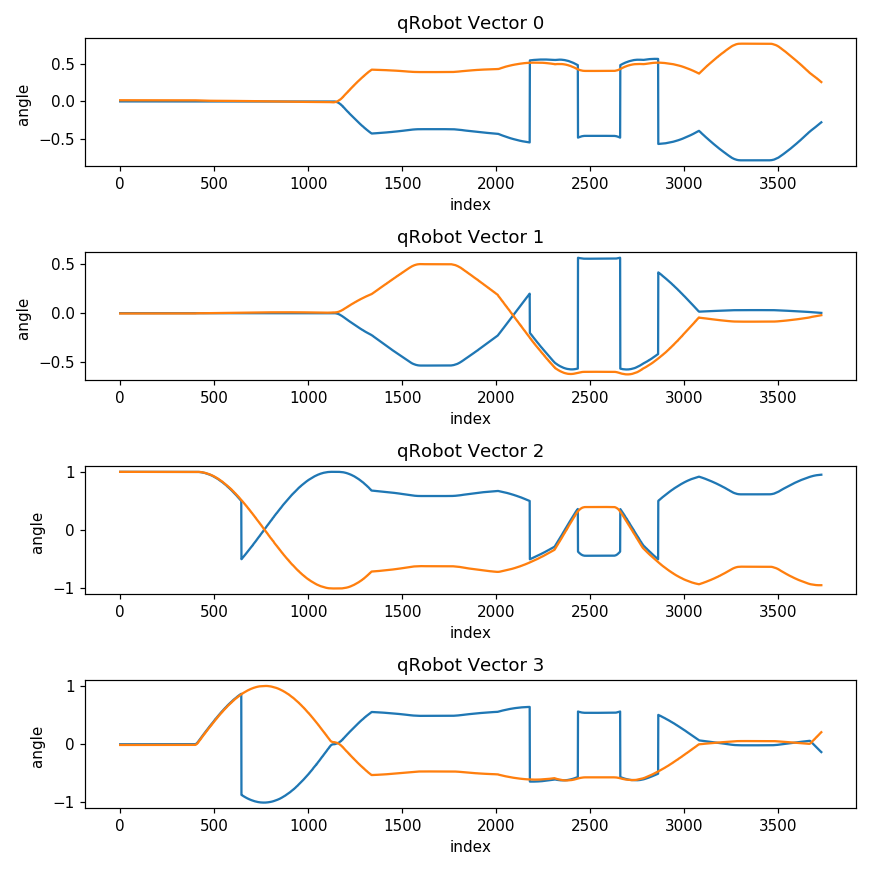

In [528]:

import matplotlib.pyplot as plt
from scipy.spatial.transform import Rotation

%matplotlib notebook
%matplotlib notebook
offset1 = 49 #8
qRobot =  tool0_quaternions[offset1:3730+offset1]

offset2 = 50 #8
qIMU = imu_quaternions[offset2:3730+offset2]
print(qRobot[:][0])


fig, axes = plt.subplots(4, 1, figsize=(8, 8))
for i in range(4):
    ax = axes[i]
    ax.plot([q[i] for q in qRobot]) #2: 1000:
    #ax.set_title(f"qRobot Vector {i}")
    ax.set_xlabel("index")
    ax.set_ylabel("angle ")
for i in range(4):
    ax = axes[i]
    ax.plot([q[i] for q in qIMU]) #2: 1000:
    ax.set_title(f"qRobot Vector {i}")
    
plt.tight_layout()
fig.show()

(3730,)
(3730,)


<IPython.core.display.Javascript object>


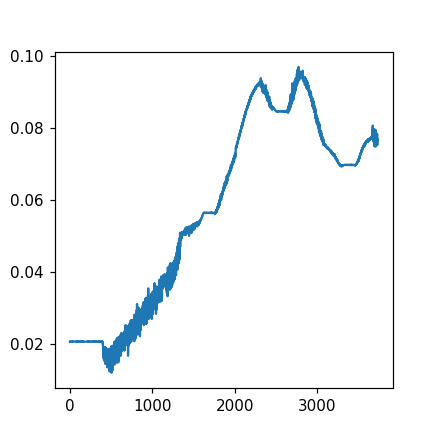

(3730,)
1.4142135623730951


In [529]:
qRobot = np.array(qRobot)
qIMU = np.array(qIMU)
print(np.shape(qRobot))
print(np.shape(qIMU))
qTemp1 = qRobot+qIMU 
qTemp2 = qRobot-qIMU 
norm2 = []
for i, (quat1, quat2) in enumerate(zip(qTemp1, qTemp2)):
#    print(quat1.norm, quat2.norm)
    norm2.append(np.min((quat1.norm, quat2.norm), axis = 0))

#(norm2)
fig, axes = plt.subplots(1, 1, figsize=(4, 4))
plt.plot(norm2) #slace is to 1.42
print(np.shape(norm2))

c1 = Quaternion(0.0,  0.0, 0.0,1.0) 
c2 = Quaternion(1.0, 0.0, 0.0, 0.0) 
            
print(np.min(((c1-c2).norm, (c1+c2).norm), axis = 0))
#print(np.min((qRobot-qIMU).norm,(qRobot+qIMU)))
#fig, ax = plt.subplots(1, 1, figsize=(3, 3))

#for i in range(1):
#    ax.plot([q[i] for q in np.min(qRobot-qIMU,qRobot+qIMU)])

In [542]:
from scipy.spatial.transform import Rotation
import numpy as np

quaternionR = qRobot
quaternionIMU = qIMU

euler_angles_list_Robot = []
# Iterate through the array of quaternions
for quat_object in quaternionR:
    # Extract quaternion values
    quaternion = quat_object.elements
    
    # Create a Rotation object from the extracted quaternion
    r = Rotation.from_quat(quaternion)
    
    # Convert quaternion to Euler angles and append to the list
    euler_angles = r.as_euler('zyx', degrees=True) # Convert to Euler angles in degrees
    print(euler_angles)
    
    euler_angles_list_Robot.append(euler_angles)
# Convert the list of Euler angles to a NumPy array

euler_angles_array_Robot = np.array(euler_angles_list_Robot)

yaw_indices_to_adjust = np.where((euler_angles_array_Robot[:500, 0] > 179.9))[0]

# Adjust yaw angles by subtracting 180 degrees from those angles
euler_angles_array_Robot[yaw_indices_to_adjust, 0] -= 360.0



#--- IMU
euler_angles_list_IMU = []    
for quat_object in quaternionIMU:
    # Extract quaternion values
    quaternion = quat_object.elements
    
    # Create a Rotation object from the extracted quaternion
    r = Rotation.from_quat(quaternion)
    
    # Convert quaternion to Euler angles and append to the list
    euler_angles = r.as_euler('zyx', degrees=True) # Convert to Euler angles in degrees
    euler_angles_list_IMU.append(euler_angles)
    
    
# Convert the list of Euler angles to a NumPy array
euler_angles_array_IMU = np.array(euler_angles_list_IMU)

print("Euler Angles for each quaternion (yaw, pitch, roll) in degrees:")
print(euler_angles_array)

[ 1.79999191e+02  2.99806368e-02 -4.05122191e-03]
[ 1.79999191e+02  2.99806368e-02 -4.05122191e-03]
[ 1.79999191e+02  2.99806368e-02 -4.05122191e-03]
[-1.79996757e+02  3.80832912e-02 -6.48337168e-03]
[ 1.79998380e+02  2.91701610e-02 -3.24071167e-03]
[ 1.79996761e+02  3.24114222e-02 -6.48133175e-03]
[ 1.79996760e+02  2.91702527e-02 -4.86086123e-03]
[-1.79999999e+02  2.91701152e-02 -4.86168629e-03]
[ 1.79997570e+02  2.67395474e-02 -4.05086661e-03]
[ 1.79995950e+02  3.32219552e-02 -5.67083297e-03]
[ 1.79994330e+02  3.56526432e-02 -5.67020281e-03]
[-1.79996758e+02  3.72728328e-02 -3.24217856e-03]
[ 1.7999757e+02  3.0790763e-02 -4.0507521e-03]
[ 1.79994329e+02  2.91703958e-02 -5.67052348e-03]
[ 1.79998381e+02  3.07907458e-02 -4.86125088e-03]
[ 1.79997571e+02  2.99807284e-02 -5.67137147e-03]
[-1.79999999e+02  2.67394614e-02 -4.86172062e-03]
[ 1.79998381e+02  2.83601493e-02 -8.10246667e-03]
[ 1.79997570e+02  2.59291117e-02 -5.67141722e-03]
[ 1.79999192e+02  2.91701667e-02 -7.29232316e-03]
[-1

[ 2.57622198e+01  3.75748906e-02 -2.10607438e-02]
[ 2.50694867e+01  3.22523016e-02 -2.29419547e-02]
[ 2.46208163e+01  3.28604217e-02 -2.04407113e-02]
[ 2.41713534e+01  3.13555048e-02 -1.99722438e-02]
[ 2.36868064e+01  3.44455060e-02 -2.12977120e-02]
[ 2.30505176e+01  3.55190816e-02 -2.04740739e-02]
[22.61335788  0.03798105 -0.02494681]
[ 2.23446405e+01  3.56443783e-02 -2.02548075e-02]
[21.67863672  0.0353046  -0.02243492]
[21.05534607  0.03383296 -0.02194656]
[20.72145503  0.036939   -0.02322765]
[ 2.02414580e+01  3.34748323e-02 -1.99678197e-02]
[19.79225759  0.03806379 -0.0222685 ]
[19.3721049   0.03348915 -0.0205121 ]
[18.65077159  0.0370903  -0.0241557 ]
[18.20331623  0.03651228 -0.02308233]
[17.71934493  0.0379093  -0.01985028]
[17.03244884  0.03137683 -0.02026544]
[16.58026395  0.03145645 -0.0201414 ]
[16.10310484  0.03062441 -0.02069915]
[15.52555761  0.03393981 -0.02098233]
[15.02191143  0.0364416  -0.02115065]
[14.7514533   0.03739908 -0.02036506]
[14.06461007  0.03561456 -0.02

[ 96.37422372 -61.25558233  -8.44394701]
[ 96.48623493 -61.35294284  -8.23856335]
[ 96.6465172  -61.49922439  -7.93689331]
[ 96.75063519 -61.57860634  -7.74085906]
[ 96.85839218 -61.67364995  -7.53064082]
[ 96.94534176 -61.73909952  -7.38014038]
[ 97.07738246 -61.85628862  -7.12737151]
[ 97.17466545 -61.94074119  -6.94069631]
[ 97.300068   -62.03306348  -6.7266623 ]
[ 97.5261391  -62.22865446  -6.29372886]
[ 97.59765264 -62.28338148  -6.17340883]
[ 97.6516333  -62.32367652  -6.07288905]
[ 97.81755836 -62.4511125   -5.77216634]
[ 97.94777741 -62.55304983  -5.54649922]
[ 98.02202495 -62.62337166  -5.40232592]
[ 98.31419807 -62.82610762  -4.88520474]
[ 98.37269694 -62.87169831  -4.78596938]
[ 98.4460523  -62.91927002  -4.66268237]
[ 98.55512531 -63.00852454  -4.45377494]
[ 98.79842993 -63.19637136  -4.0285794 ]
[ 98.92618679 -63.27847798  -3.80146968]
[ 99.10571944 -63.40012355  -3.49963553]
[ 99.25149983 -63.50348801  -3.24153487]
[ 99.4078691  -63.59171187  -2.98740694]
[ 99.52865833 -6

[ 81.37091007 -51.56836936 -31.61077144]
[ 81.08999311 -51.38529706 -32.01851142]
[ 80.84085205 -51.2228304  -32.37402933]
[ 80.55058594 -51.03157928 -32.80455632]
[ 80.21109731 -50.77586961 -33.30421738]
[ 79.98172983 -50.60540996 -33.64749427]
[ 79.76495083 -50.44875439 -33.97081217]
[ 79.55275722 -50.29892085 -34.2886262 ]
[ 79.14766356 -49.97218933 -34.90133354]
[ 78.938598   -49.79988473 -35.21813305]
[ 78.64574311 -49.56913379 -35.65811458]
[ 78.46285371 -49.4171448  -35.93874556]
[ 78.15330514 -49.17244166 -36.40944847]
[ 77.91472991 -48.96759486 -36.76743281]
[ 77.65341446 -48.73976211 -37.17703213]
[ 77.4303826  -48.54779997 -37.51700719]
[ 77.17811906 -48.32360557 -37.920309  ]
[ 77.01604357 -48.18490056 -38.16999495]
[ 76.76170806 -47.93785543 -38.58516903]
[ 76.56061823 -47.74694517 -38.90148652]
[ 76.26665859 -47.47145793 -39.35879224]
[ 76.08734415 -47.28915457 -39.6533051 ]
[ 75.7997406  -46.99682937 -40.11625328]
[ 75.63497662 -46.82390069 -40.3862614 ]
[ 75.41181716 -4

[  67.25538847   86.77490174 -145.48002952]
[  66.12122003   86.63203101 -144.25905625]
[  64.9363556    86.41611197 -142.9317101 ]
[  64.32329359   86.30931127 -142.24740141]
[  62.93194757   86.00263411 -140.66092023]
[  61.89443464   85.79382796 -139.4944957 ]
[  61.08511806   85.57623621 -138.5472945 ]
[  59.97324798   85.28508056 -137.25220575]
[  59.32794151   85.01934365 -136.43994472]
[  58.41319429   84.73830142 -135.35068031]
[  57.75059527   84.46575926 -134.52087141]
[  57.30736847   84.21157634 -133.92186854]
[  56.72169408   83.86788584 -133.12406146]
[  56.13390809   83.54462029 -132.34038497]
[  55.74131188   83.27119681 -131.78163049]
[  55.24326532   82.81806744 -130.99867051]
[  54.77002812   82.43785081 -130.28833282]
[  54.31236935   81.98349816 -129.55727386]
[  54.00372778   81.59114875 -129.01319959]
[  53.67548911   81.15817714 -128.42073607]
[  53.48506568   80.73592392 -127.97651828]
[  53.26616228   80.44203025 -127.57286787]
[  52.98648666   79.8672036  -12

[   6.30557849  -75.98399716 -177.64719406]
[   6.29129316  -75.96221543 -177.6650605 ]
[   6.26479976  -75.92926629 -177.69628915]
[   6.24880606  -75.89375095 -177.72052018]
[   6.24026904  -75.87881569 -177.73029116]
[   6.21556076  -75.85265989 -177.75858149]
[   6.20738923  -75.8446541  -177.76448501]
[   6.21196645  -75.85049017 -177.76563784]
[   6.22054423  -75.85371009 -177.75359802]
[   6.22261877  -75.85485887 -177.75498552]
[   6.22135478  -75.85258578 -177.7550955 ]
[   6.22642938  -75.85604016 -177.74882683]
[   6.23247712  -75.85469567 -177.74628118]
[   6.21406371  -75.851516   -177.75777051]
[   6.22644941  -75.85589917 -177.74884686]
[   6.22121131  -75.85611928 -177.75289091]
[   6.22725947  -75.85477486 -177.75034482]
[   6.22642938  -75.85604016 -177.74882683]
[   6.22668246  -75.85476997 -177.74976781]
[   6.20675007  -75.85056897 -177.76970021]
[   6.22449694  -75.85135792 -177.74964531]
[   6.21568583  -75.84926739 -177.76076444]
[   6.22112124  -75.85371498 -17

Euler Angles for each quaternion (yaw, pitch, roll) in degrees:
[[   1.54613198   89.97000844  178.44981658]
 [   1.54613198   89.97000844  178.44981658]
 [   1.54613198   89.97000844  178.44981658]
 ...
 [-155.7110441    53.76661466  -24.62742071]
 [-154.9635496    53.84078232  -25.35523537]
 [-154.51090448   53.88815592  -25.80187208]]


<IPython.core.display.Javascript object>


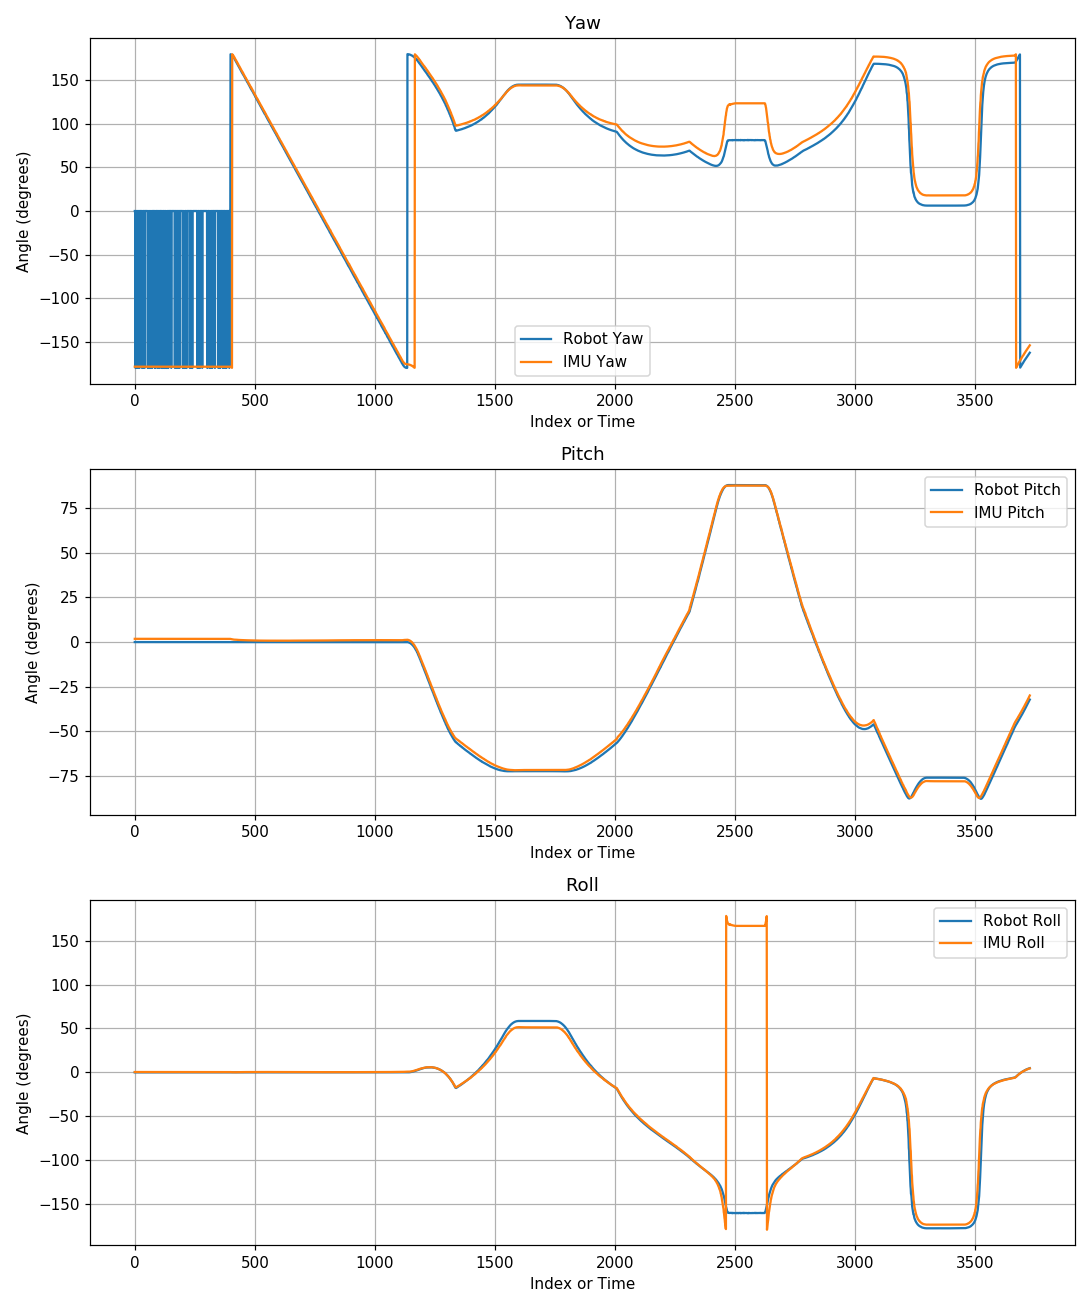

In [543]:
import matplotlib.pyplot as plt
import numpy as np

# Assuming you have obtained euler_angles_array from the previous code

# Create an array of indices or time (replace this with your data)
indices = np.arange(len(euler_angles_array))

# Create subplots for each Euler angle
fig, axs = plt.subplots(3, 1, figsize=(10, 12))

# Plotting Euler angles (yaw, pitch, roll) against indices or time in separate subplots
for i, angle in enumerate(['Yaw', 'Pitch', 'Roll']):
    axs[i].plot(indices, euler_angles_array_Robot[:, i], label="Robot " +angle)
    axs[i].plot(indices, euler_angles_array_IMU[:, i], label= "IMU "+ angle)
    axs[i].set_xlabel('Index or Time')
    axs[i].set_ylabel('Angle (degrees)')
    axs[i].set_title(f'{angle}')
    axs[i].legend()
    axs[i].grid(True)
plt.tight_layout()

plt.show()

In [504]:
import csv
import numpy as np
from pyquaternion import Quaternion

# Create an empty list to store quaternions
quaternions = []

# Open the CSV file for reading
with open('/home/kuli/Desktop/WeAreVR/Jupyter/imuTestData/eulUniRobot1.csv', 'r') as csvfile:
    # Create a CSV reader
    csvreader = csv.reader(csvfile)
    
    # Skip the header row if it exists
    next(csvreader, None)
    
    # Read quaternions from the file
    for row in csvreader:
        if len(row) == 4:
            # Convert the values to floats and store as a list
            eul = [float(value) for value in row]
            x = np.array(eul[1:]) 
            if(x[0] > 200): x[0] = x[0] - 360.0
            if(x[1] > 200): x[1] = x[1] - 360.0
            if(x[2] > 100): x[2] = x[2] - 360.0
            x += np.array([0.0, 90.0, 0.0])
            quaternions.append(x)

# Convert the list of quaternions to a NumPy array
quatRobot = np.array(quaternions)
print(quatRobot)
print(quatRobot.shape)

# Create an empty list to store quaternions
quaternions = []

# Open the CSV file for reading
with open('/home/kuli/Desktop/WeAreVR/Jupyter/imuTestData/eulUniIMU1.csv', 'r') as csvfile:
    # Create a CSV reader
    csvreader = csv.reader(csvfile)
    
    # Skip the header row if it exists
    next(csvreader, None)
    
    # Read quaternions from the file
    for row in csvreader:
        if len(row) == 4:
            # Convert the values to floats and store as a list
            eul = [float(value) for value in row]
            x = np.array(eul[1:]) 
            if(x[0] > 200): x[0] = x[0] - 360.0
            if(x[1] > 200): x[1] = x[1] - 360.0
            if(x[2] > 100): x[2] = x[2] - 360.0
            x += np.array([0.0, 0.0, 0.0])
            quaternions.append(x)

# Convert the list of quaternions to a NumPy array
quatIMU = np.array(quaternions)
print(quatIMU)
print(quatIMU.shape)

FileNotFoundError: [Errno 2] No such file or directory: '/home/kuli/Desktop/WeAreVR/Jupyter/imuTestData/eulUniRobot1.csv'

## Compare plot - euler from Unity

<IPython.core.display.Javascript object>


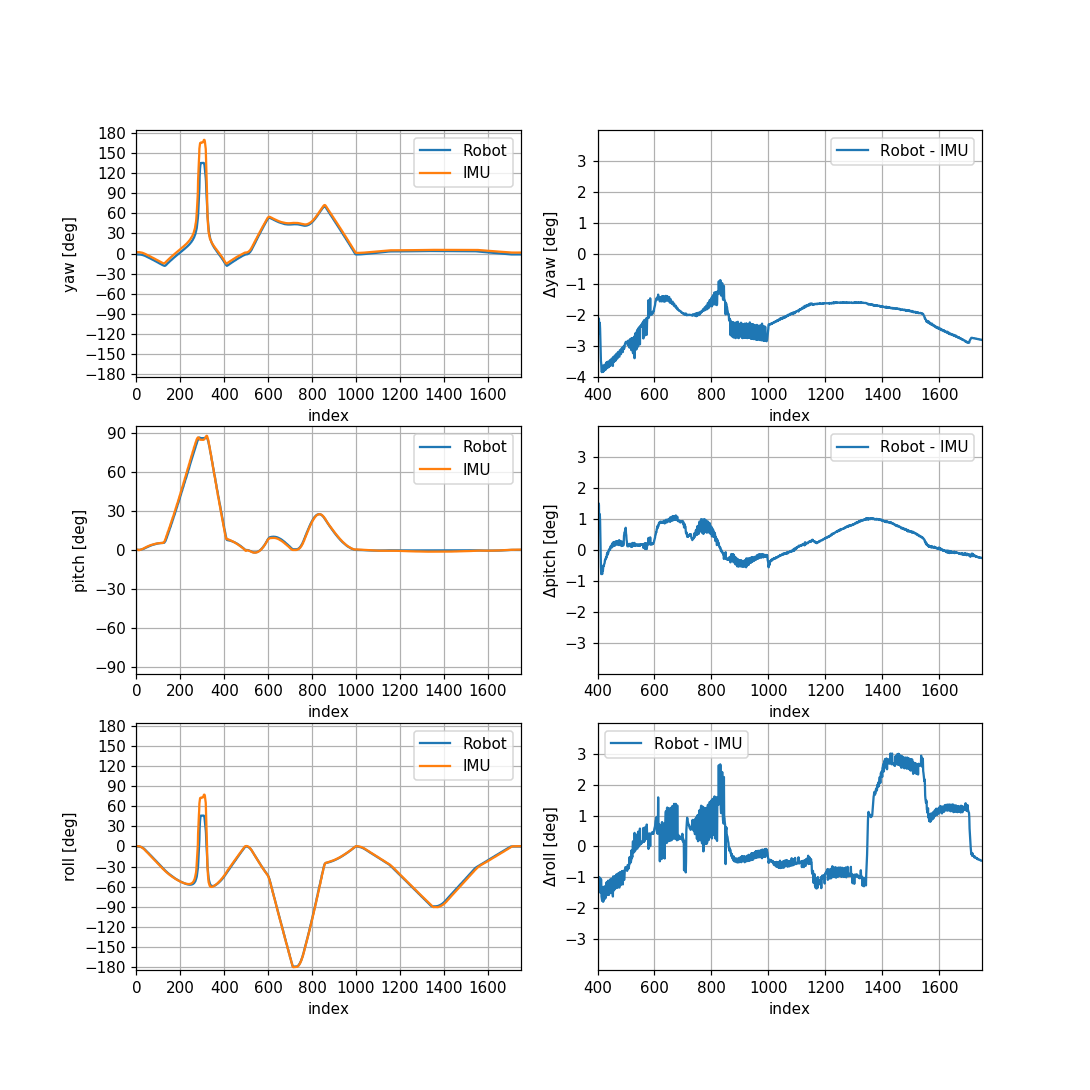

In [575]:
#Comparing Ground-Truth and IMU orientation vectors - plot

import matplotlib.pyplot as plt
from scipy.spatial.transform import Rotation

%matplotlib notebook
%matplotlib notebook
offset = 72
qRobot =  quatRobot[offset:1760+offset]
qIMU = quatIMU[:1760]


fig, axes = plt.subplots(3, 2, figsize=(10, 10))
ax = axes[1, 0]
ax.plot(qRobot[:, 0], label= "Robot")
ax.plot(qIMU[:, 0], label= "IMU")
ax.set_xlabel("index")
ax.set_ylabel("pitch [deg]") # pitch, yaw, roll
ax.set_yticks(np.arange(-90, 91, 30))
ax.set_xticks(np.arange(0, 1801, 200))
ax.set_ylim(-95, 95)
ax.set_xlim(0, 1750)
ax.grid()
ax.legend()

ax = axes[0, 0]
ax.plot(qRobot[:, 1], label= "Robot")
ax.plot(qIMU[:, 1], label= "IMU")
ax.set_xlabel("index")
ax.set_ylabel("yaw [deg]") # pitch, yaw, roll
ax.set_yticks(np.arange(-180, 181, 30))
ax.set_xticks(np.arange(0, 1801, 200))
ax.set_ylim(-185, 185)
ax.set_xlim(0, 1750)
ax.grid()
ax.legend()

ax = axes[2, 0]
ax.plot(qRobot[:, 2], label= "Robot")
ax.plot(qIMU[:, 2], label= "IMU")
ax.set_xlabel("index")
ax.set_ylabel("roll [deg]") # pitch, yaw, roll
ax.set_yticks(np.arange(-180, 181, 30))
ax.set_xticks(np.arange(0, 1801, 200))
ax.set_ylim(-185, 185)
ax.set_xlim(0, 1750)
ax.grid()
ax.legend()

ax = axes[1, 1]
ax.plot(qRobot[:, 0] - qIMU[:, 0], label= "Robot - IMU")
ax.plot()
ax.set_xlabel("index")
ax.set_ylabel("Δpitch [deg]") # pitch, yaw, roll
ax.set_yticks(np.arange(-3, 4, 1))
ax.set_xticks(np.arange(0, 1801, 200))
ax.set_ylim(-4, 4)
ax.set_xlim(400, 1750)
ax.grid()
ax.legend()

ax = axes[0, 1]
ax.plot(qRobot[:, 1] - qIMU[:, 1], label= "Robot - IMU")
ax.set_xlabel("index")
ax.set_ylabel("Δyaw [deg]") # pitch, yaw, roll
ax.set_yticks(np.arange(-4, 4, 1))
ax.set_xticks(np.arange(0, 1801, 200))
ax.set_ylim(-4, 4)
ax.set_xlim(400, 1750)
ax.grid()
ax.legend()

ax = axes[2, 1]
ax.plot(qRobot[:, 2] - qIMU[:, 2], label= "Robot - IMU")
ax.set_xlabel("index")
ax.set_ylabel("Δroll [deg]") # pitch, yaw, roll
ax.set_yticks(np.arange(-3, 4, 1))
ax.set_ylim(-4, 4)
ax.set_xlim(400, 1750)
ax.grid()
ax.legend()

fig.show()

In [378]:
import csv
import numpy as np

# Create an empty list to store 3D vectors
vectors = []

# Open the CSV file for reading
with open('/home/kuli/Desktop/WeAreVR/Jupyter/imuTestData/fullCSVXX.csv', 'r') as csvfile:
    # Create a CSV reader
    csvreader = csv.reader(csvfile)
    
    # Skip the header row if it exists
    next(csvreader, None)
    
    # Read 3D vectors from the file
    for row in csvreader:
        if len(row) == 11:
            # Convert the values to floats and store as a list
            vector = [float(value) for value in row[4:7]]  # Assuming columns 2, 3, 4 represent x, y, z components
            vectors.append(vector)

# Convert the list of 3D vectors to a NumPy array
data1 = np.array(vectors)
print(data1)
print(np.shape(data1))


[[-0.1741624   0.3466891  -0.33584088]
 [-0.17416178  0.34668998 -0.33583885]
 [-0.17417358  0.34667901 -0.33585328]
 ...
 [-0.19423903  0.34969242 -0.3464081 ]
 [-0.19423903  0.34969242 -0.3464081 ]
 [-0.19423903  0.34969242 -0.3464081 ]]
(86086, 3)


In [395]:
import pandas as pd
import numpy as np

# Read the CSV file using pandas
data_frame = pd.read_csv('/home/kuli/Desktop/WeAreVR/Jupyter/imuTestData/fullCSVXX2.csv', header=None)

# Extract 3D vectors from specific columns
# Assuming columns 2, 3, and 4 represent x, y, and z components respectively
data1 = data_frame.iloc[:, 4:7].values.astype(float)  # Adjust columns accordingly
print(data1)
print(np.shape(data1))

[[ 0.17413199 -0.34649128  0.33604446]
 [ 0.17413199 -0.34649128  0.33604446]
 [ 0.17413975 -0.34648538  0.33603663]
 ...
 [ 0.58346782 -0.24311061  0.10716968]
 [ 0.58346782 -0.24311061  0.10716968]
 [ 0.58346782 -0.24311061  0.10716968]]
(15803, 3)


<IPython.core.display.Javascript object>


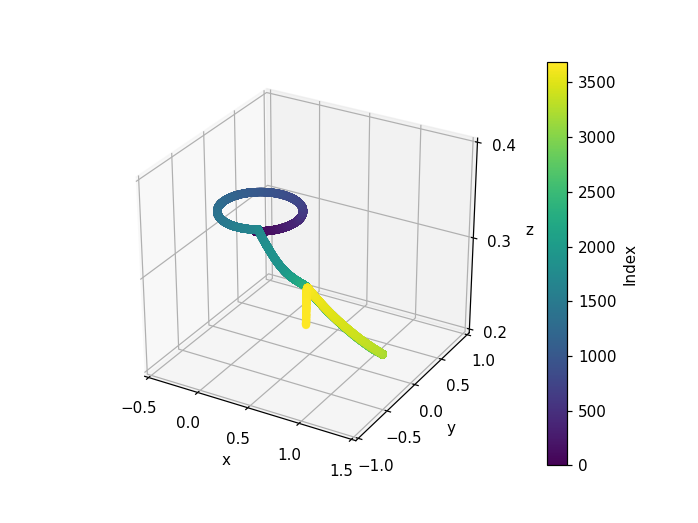

In [438]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Assuming your data is stored as a NumPy array
data = data1[0:14000] 
# Generate colors based on the index
colors = np.arange(len(data))

# Plotting the 3D graph with colors
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Scatter plot with colormap for colors
scatter = ax.scatter(data[:, 0], data[:, 1], data[:, 2], c=colors, cmap='viridis')

# Adding a color bar to show the correspondence between colors and indices
cbar = plt.colorbar(scatter, label='Index')

cbar.set_ticks([0, 1900, 3800, 5700, 7600, 9500, 11400, 13300])  # Setting ticks at desired positions
cbar.set_ticklabels(['0', '500', '1000', '1500', '2000', '2500', '3000', '3500'])  # Corresponding labels for the ticks



# Labeling axes
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')
ax.set_xlim(-0.5,1.5)
ax.set_ylim(-1,1)
ax.set_zlim(0.2, 0.4)

ax.set_xticks(np.arange(-0.5, 1.6, 0.5))
ax.set_yticks(np.arange(-1, 1.1, 0.5))
ax.set_zticks(np.arange(0.2, 0.5, 0.1))

plt.show()

#### Notes for myself

## Start the IMU (FSM-9) measurement 
- edit src code (e.g. off the energy-safe mode)
- cmake genarate with cmake-gui (on the python2.7 env)
- make the generated files (on the python2.7 env)
- run the .bin file with 'sudo' (!): sudo /home/kuli/Desktop/WeAreVR/fsm9/build/libfree-examples/game3d_example > ~/Desktop/WeAreVR/Measurements/imu_position_test.csv
(un-plug and plug is the best debug)

## Start the IMU (WT931) measurement 
- sudo chmod a+rw ~/../../dev/ttyUSB0 
- python3 ~/Desktop/WeAreVR/wt931/Python-WitProtocol/chs/JY901S.py 

## UniversalRobot setup (ur10e)
- safety password = easybot
- Ros2 (galactic)
- UrDriver (for galactic)
- Ros Controller
- setup Robot (e.g. 192.168.20.129 /255.255.255.0)
- setup LAN (e.g. 192.168.20.128 /255.255.255.0)
- set: /opt/ros/galactic/share/ur_bringup/launch/ur_control.launch.py - publish_frequency to 500 and rebuild ur_bringup (parameters=[robot_description, {'publish_frequency' : 500.0}],) 
- suggestion: increase update rates: /opt/ros/galactic/share/ur_bringup/config/ur_controllers.yaml


### Robot Setup 
- conda activate py38
- source ~/ros2_ur_driver/install/setup.bash
- ros2 launch ur_bringup ur_control.launch.py ur_type:=ur10e robot_ip:=192.168.20.129 launch_rviz:=true tool_tcp_port:=50002 
<br> or <br> 
- ros2 launch ur_bringup ur_control.launch.py ur_type:=ur10e robot_ip:=192.168.20.129 launch_rviz:=false tool_tcp_port:=50002 

##### Robot data gathering test - LEGACY
- ros2 launch ur_bringup test_scaled_joint_trajectory_controller.launch.py
- *ros2 topic echo /joint_states --field position --csv > ~/Desktop/WeAreVR/Measurements/robot_position_test.csv
Better (absolute angle) 500Hz:
- ros2 run tf2_ros tf2_echo base_link wrist_3_link 500 > ~/Desktop/WeAreVR/Measurements/robot_position_test.csv 

### Unity - ROS connection setup
- ROS tcp Connector
- ROS tcp Endpoint
source /opt/ros/galactic/setup.bash <br>
source ~/ros2_ws_base/install/setup.bash  <br>
ros2 run ros_tcp_endpoint default_server_endpoint --ros-args -p ROS_IP:=192.168.68.132      ####130 

#### Publish efector to new ROS Topic
in ros_workspace: (build pachage first)
- sudo colcon build --packages-select tf2_workshop
- source ~/ros2_ws_base/install/setup.bash
- ros2 run tf2_workshop publisher tool0 base_link       #### moody (change env)
- *(Test) ros2 topic echo tool0

###  IMU and Robot parralel test data gathering (To be improved)
##### pre test check
source /opt/ros/galactic/setup.bash  <br>
sudo /home/kuli/Desktop/WeAreVR/fsm9/build_dev/game3d_example  <br>
ros2 run tf2_ros tf2_echo base_link wrist_3_link 500
##### test:
sudo /home/kuli/Desktop/WeAreVR/fsm9/build_dev/game3d_example > ~/Desktop/WeAreVR/Measurements/imu_position_dev.csv & ros2 run tf2_ros tf2_echo base_link wrist_3_link 500  > ~/Desktop/WeAreVR/Measurements/robot_position_dev.csv  <br>
sudo kill -SIGINT nr

## IMU to ROS data push
- source ~/ros2_ws_base/install/setup.bash
- sudo /home/kuli/Desktop/WeAreVR/fsm9/build_dev/game3d_example | ros2 run tf2_workshop IMU
<br> or 
- ls ~/../../dev/ttyUSB*
- source ~/ros2_ws_base/install/setup.bash
- sudo chmod a+rw ~/../../dev/ttyUSB1                      #ttyUSB0/1/2
- python3 ~/Desktop/WeAreVR/wt931/Python-WitProtocol/chs/JY901S.py /dev/ttyUSB1 | ros2 run tf2_workshop IMU

### ROS conroller fo UR robot (really moody)
- ros2 launch ur_bringup ur_control.launch.py ur_type:=ur10e robot_ip:=192.168.20.129 launch_rviz:=false tool_tcp_port:=50002 initial_joint_controller:=joint_trajectory_controller 
- ros2 launch ur_bringup test_joint_trajectory_controller.launch.py
- Turn on the remote controll program on teach panel

## MoveIt
#### edit robot model (ground + safety):
- /opt/ros/galactic/share/ur_description/urdf/ur_macro.xacro
##### Setup Robot or Fake Hardwere setup:
- (Fake) ros2 launch ur_bringup ur_control.launch.py ur_type:=ur5e robot_ip:=yyy.yyy.yyy.yyy use_fake_hardware:=true launch_rviz:=false  
<br>
##### Start Moveit Config
- ros2 launch ur_moveit_config ur_moveit.launch.py ur_type:=ur10e launch_rviz:=true <br>
##### Start movement request script
- colcon build --mixin debug
- ros2 run hello_moveit controlUR

##### Bug 'Could not find parameter robot_description_semantic':
- add in /home/kuli/ros2_ur_driver/src/Universal_Robots_ROS2_Driver/ur_moveit_config/launch/ur_moveit.launch.py <br>
planning_scene_monitor_parameters = { [...] <br>
"publish_robot_description":True,  <br>
"publish_robot_description_semantic":True,
 
 #### Servo (WIP)
- ros2 launch ur_bringup ur_control.launch.py ur_type:=ur10e robot_ip:=192.168.20.129 launch_rviz:=false tool_tcp_port:=50002 initial_joint_controller:=joint_trajectory_controller
- ros2 control switch_controllers --start forward_position_controller --stop scaled_joint_trajectory_controller 

##### Frequency:
- UR10e (robot) freq = 500 in theory but -> /opt/ros/galactic/share/ur_bringup/launch/ur_launch.launch.py publishes on tf (ros2 topic hz tf) with 'average rate: ~330Hz'
- IMU FSM-9 freq = 480-500Hz -> receiving(real) 380-408Hz


In [380]:
### Jupyter Notebook struggles - install lib's using:
import sys
!{sys.executable} -m pip install pandas 
!{sys.executable} -m pip install --upgrade --force-reinstall numpy-quaternion


     |████████████████████████████████| 12.4 MB 7.5 MB/s eta 0:00:01
     |████████████████████████████████| 341 kB 2.2 MB/s eta 0:00:01
  Using cached python_dateutil-2.8.2-py2.py3-none-any.whl (247 kB)
     |████████████████████████████████| 502 kB 2.9 MB/s eta 0:00:01
     |████████████████████████████████| 201 kB 4.1 MB/s eta 0:00:01
  Using cached numpy-1.24.4-cp38-cp38-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (17.3 MB)
  Attempting uninstall: numpy
    Found existing installation: numpy 1.24.4
    Uninstalling numpy-1.24.4:
      Successfully uninstalled numpy-1.24.4
  Attempting uninstall: numpy-quaternion
    Found existing installation: numpy-quaternion 2022.4.3
    Uninstalling numpy-quaternion-2022.4.3:
      Successfully uninstalled numpy-quaternion-2022.4.3


## Building from source
### ros
colcon build --symlink-install --packages-skip qt_gui_cpp --packages-skip-by-dep qt_gui_cpp --cmake-args -DCMAKE_CXX_FLAGS="--param ggc-min-expand=20" --continue-on-error --parallel-workers 3
<br>
source ~/ros2_galactic/install/setup.bash
#### UR--include-eol-distros
git clone -b foxy-devel https://github.com/ros-industrial/ur_msgs.git
cd ~/workspace/ros_ur_driver
rosdep update --include-eol-distros
(?) colcon build --continue-on-error --packages-skip ur_msgs --cmake-args -DCMAKE_BUILD_TYPE=Release
colcon build --continue-on-error --cmake-args -DCMAKE_BUILD_TYPE=Release
source install/setup.bash